# Isolated Sea Ice and CO2 influence

## Compute paper figures

1. Schematic (a,b), and quadrilateral (c)
2. SAT for ICE, CO2, SUM, FULL (and % var explained by sum) (a,b,c,d)
   SLP for ICE, CO2, SUM, FULL (and % var explained by sum) (e,f,g,h)
3. Seasonal cycle of measure of linearity (pattern corr and/or RMSE) for SAT, SLP, dTzonal
4. dTzonal for ICE, CO2 (a,b)<br>
   dUzonal for ICE, CO2 (c,d)<br>
   dZzonal (or Z500?) for ICE, CO2 (e,f)<br>
   U850?<br>
   PHT?<br>
   
   
Also compute pattern corr and/or RMSE for fourier filtered data (waves 1-10 or whatever)

Note to get dot hatching density to be ok in a pdf, have to convert png output to pdf:
>> convert -density 400 figurefilename.png figurefilename.pdf

In [1]:
import cccmautils as cutl
import constants as con
import pandas as pd
import numpy.ma as ma
import scipy.io as sio
import matplotlib.lines as mlines

import loadCanESM2rlxdata as lrlx

%matplotlib inline

domonth=False
sea='DJF' #'DJF'
mo=1 # mo is 1-based
last='last200' # else 'last100', 'first100'
includeyr1=False # only used when first100

suff = last+'yr'
if domonth:
    seasonalizedt={'mo':mo}
else:
    seasonalizedt={'season':sea}

if last=='last200': fldsfx='NH'

zconv = 1/con.get_g()


casenames = ('preipreiice', 'prei2xco2iceb','2xco22xco2ice','2xco2preiice')#'pi2xco2ipulse', 
shortnames = {'preipreiice': '1C_1I',
             'prei2xco2iceb': '1C_2I',
             'pi2xco2ipulse': '1C_2Ipulse',
             '2xco22xco2ice': '2C_2I',
             '2xco2preiice': '2C_1I'}

colors = {'preipreiice': 'k', 'prei2xco2iceb': 'b', 
            'pi2xco2ipulse': 'cyan', '2xco22xco2ice': 'r',
            '2xco2preiice': 'pink'}

verb=True

lat,lon = lrlx.load_nclatlon('st'+fldsfx,last=last,includeyr1=includeyr1,verb=verb)


/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)


### load lat x lon data

In [2]:
lrlx = reload(lrlx)

verb=True

nctmpdt, nctmpzmdt = lrlx.load_ncfield('st'+fldsfx,'ST',
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,**seasonalizedt)

ncslpdt, ncslpzmdt = lrlx.load_ncfield('pmsl'+fldsfx,'PMSL',
                                  last=last,includeyr1=includeyr1,
                                  verb=verb,**seasonalizedt)

ncz500dt, ncz500zmdt = lrlx.load_ncfield('gz50000'+fldsfx,'PHI',
                                  last=last,includeyr1=includeyr1,conv=zconv,
                                  verb=verb,**seasonalizedt)

#ncu850dt, ncu850zmdt = lrlx.load_ncfield('u85000'+fldsfx,'U',
#                                  last=last,includeyr1=includeyr1,
#                                  verb=verb,**seasonalizedt) # @@@@@
ncu850dt, ncu850zmdt = lrlx.load_ncfield('u70000'+fldsfx,'U',
                                  last=last,includeyr1=includeyr1,
                                  verb=verb,**seasonalizedt)

ncsicdt, ncsiczmdt = lrlx.load_ncfield('sicn'+fldsfx,'SICN',
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,conv=100,**seasonalizedt)

#ncsitdt, ncsitzmdt = lrlx.load_ncfield('sic'+fldsfx,'SIC',
#                                        conv=1/deni,**seasonalizedt)
# # total precip rate. conv from kg/m2/sec to mm/day
#ncpcpdt, ncpcpzmdt = lrlx.load_ncfield('pcp'+fldsfx,'PCP',
#                                        conv=86400,**seasonalizedt) 

if last=='last200': # area averaged
    nctmpgmdt, nctmpgmzmdt = lrlx.load_ncfield('stgm','ST', zonal=False,
                                      last=last,includeyr1=includeyr1,
                                      verb=verb,**seasonalizedt) 
    ncsianhdt, ncsianhzmdt = lrlx.load_ncfield('sianh','sianh', zonal=False,
                                          last=last,includeyr1=includeyr1,
                                          verb=verb,**seasonalizedt) 



/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (199, 32, 129)
fldzm.shape: (199, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_stNH_3022-3221_ts.nc


/Users/kelly/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3919: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__ne__(other)


/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_stNH_3022-3221_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (199, 32, 129)
fldzm.shape: (199, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco22xco2ice/ts/2xco22xco2ice_stNH_2452-2651_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco22xco2ice/ts/2xco22xco2ice_stNH_2452-2651_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (199, 32, 129)
fldzm.shape: (199, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco2preiice/ts/2xco2preiice_stNH_2552-2751_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco2preiice/ts/2xco2preiice_stNH_2552-2751_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (199, 32, 129)
fldzm.sha

### load lev x lat data

In [3]:
# Zonal mean w/ height data
lev = lrlx.load_nclev('tZM',verb=True)

nctZMdt, _ = lrlx.load_ncfield('tZM'+fldsfx,'TEMP', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb,**seasonalizedt)
ncuZMdt, _ = lrlx.load_ncfield('uZM'+fldsfx,'U', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb,**seasonalizedt)
nczZMdt, _ = lrlx.load_ncfield('gzZM'+fldsfx,'PHI', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb,conv=1/con.get_g(),**seasonalizedt)
    

/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_tZM_3022-3121_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_tZMNH_2922-3121_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_tZMNH_2922-3121_ts.nc, fld.shape (2400, 22, 32)
fld.shape: (199, 22, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_tZMNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape ()
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_tZMNH_3022-3221_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_tZMNH_3022-3221_ts.nc, fld.shape (2400, 22, 32)
fld.shape: (199, 22, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_tZMNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape ()
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco22xco2ice/ts/2xco22xco2ice_tZMNH_2452-2651_ts.nc
/Volumes/KellyDataDisk/h

In [4]:
#  zonal mean of subset of lons
zregions=('nthatlthnnh','nthpacnh')
nctregZMdt={}; ncuregZMdt={}; nczregZMdt={}

lrlx=reload(lrlx)

glat,_ = lrlx.load_nclatlon('t',verb=True,local=True)
print glat.shape

for zreg in zregions:

    nctregZMdt[zreg], _ = lrlx.load_ncfield('t'+zreg+'ZM','TEMP', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb,**seasonalizedt)
    
    ncuregZMdt[zreg], _ = lrlx.load_ncfield('u'+zreg+'ZM','U', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb,**seasonalizedt)
    nczregZMdt[zreg], _ = lrlx.load_ncfield('gz'+zreg+'ZM','PHI', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb,conv=1/con.get_g(),**seasonalizedt)


/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_st_2922-3121_DJF_mean.nc
lat.shape (64,)
lon.shape (129,)
(64,)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_tnthatlthnnhZM_2922-3121_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_tnthatlthnnhZM_2922-3121_ts.nc, fld.shape (2400, 22, 64)
fld.shape: (199, 22, 64)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_tnthatlthnnhZM_2922-3121_ts.nc
lat.shape (64,)
lon.shape ()
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_tnthatlthnnhZM_3022-3221_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_tnthatlthnnhZM_3022-3221_ts.nc, fld.shape (2400, 22, 64)
fld.shape: (199, 22, 64)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_tnthatlthnnhZM_2922-3121_ts.nc
lat.shape (64,)
lon.shape ()
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2

In [5]:
print seasonalizedt

{'season': 'DJF'}


### Utility functions

In [6]:
cutl=reload(cutl)
# @@@@@ THIS func was moved to utility class. @@@@@
def rlx_diffs(ncdt,dotimmean=False):
    """ Take a dictionary of all the simulation data and return
        a dictionary of the differences as analyzed in paper (e.g. ICEcold, ICEwarm, etc)
    """
    keys=('ICEcold','CO2hi','Full','ICEwarm','CO2lo')
    diffcases={'ICEcold':('prei2xco2iceb','preipreiice'),
              'CO2hi': ('2xco2preiice','preipreiice'),
              'Full': ('2xco22xco2ice','preipreiice'),
              'ICEwarm':('2xco22xco2ice','2xco2preiice'),
              'CO2lo': ('2xco22xco2ice','prei2xco2iceb')}
    retdt={}
    for dkey in keys:
        sims = diffcases[dkey]
        if dotimmean:
            retdt[dkey] = ncdt[sims[0]].mean(axis=0) - ncdt[sims[1]].mean(axis=0)
        else:
            retdt[dkey]=ncdt[sims[0]]-ncdt[sims[1]]
        
    return retdt

def calc_linpatterncorr(ncdt,lin='one',northof=0,conv=1,vert=False,comp='Sum'):
    
    """ Computes the pattern correlation b/w the 'SUM' and 'FULL'
           for given 'lin'. Input data is seasonal avg timeseries of spatial data.
           
           computes the correlation for area north of 'northof' value.
           
           returns rval,pval
           
    """
    
    wgts = cutl.calc_areawgts(lat[lat>northof],lon)

    
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']

    if lin=='one':
        ice = (np.mean(pico,axis=0) - np.mean(pipi,axis=0))*conv
        co2 = (np.mean(copi,axis=0) - np.mean(pipi,axis=0))*conv
        ctl = np.mean(pipi,axis=0)*conv        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        ice = (np.mean(coco,axis=0) - np.mean(copi,axis=0))*conv
        co2 = (np.mean(coco,axis=0) - np.mean(pico,axis=0))*conv
        ctl = np.mean(coco,axis=0)*conv
        suff='2'
        suff1='warm'; suff2='lo'

    combo = ice+co2
    full = (np.mean(coco,axis=0) - np.mean(pipi,axis=0))*conv
    
    if comp=='Sum':
        indat=combo
    elif comp=='ICE':
        indat=ice
    elif comp=='CO2':
        indat=co2
        
    if vert: # lat in 2nd dim
        # NOTE vert pattern corr is not pressure weighted @@@@
        print 'NOTE vert pattern corr is not pressure weighted'
        rval,pval = cutl.pattcorr_pearson(indat[:,lat>northof].flatten(),
                                          full[:,lat>northof].flatten())
        
    else: # lat in 1st dim
        rval = cutl.pattcorr(indat[lat>northof,:-1].flatten(),
                             full[lat>northof,:-1].flatten(),weights=wgts.flatten())
        pval=np.nan #@@@@ no pvalue
        #rval,pval = cutl.pattcorr_pearson(combo[lat>northof,:].flatten(),
        #                                  full[lat>northof,:].flatten())
    #print cutl.pattcorr(combo[lat>northof,:].flatten(),full[lat>northof,:].flatten())
    
    return rval,pval

def calc_monthly_linpatterncorr(ncdt,lin='one',northof=0,conv=1,vert=False,comp='Sum'):
    
    """ Computes the pattern correlation b/w the 'SUM' and 'FULL'
           for given 'lin'. Input data is climatology of spatial data.
           
           computes the correlation for area north of 'northof' value for e/ month.
           
           returns rval,pval
           
    """
    
    wgts = cutl.calc_areawgts(lat[lat>northof],lon)
    
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']

    if lin=='one':
        ice = (pico - pipi)*conv
        co2 = (copi - pipi)*conv
        ctl = pipi*conv        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        ice = (coco - copi)*conv
        co2 = (coco - pico)*conv
        ctl = coco*conv
        suff='2'
        suff1='warm'; suff2='lo'

    combo = ice+co2
    full = (coco - pipi)*conv
    
    #print lat>northof
    rvals=np.zeros((12,))
    pvals=np.zeros_like(rvals)
    
    if comp=='Sum':
        indat=combo
    elif comp=='ICE':
        indat=ice
    elif comp=='CO2':
        indat=co2
        
    for moii in range(0,12):
        if vert: # lat in 2nd dim
            print 'NOTE vert pattcorr not pressure weighted @@@'
            rvals[moii],pvals[moii] = cutl.pattcorr_pearson(indat[moii,:,lat>northof].flatten(),
                                                            full[moii,:,lat>northof].flatten())
        else: # lat in 1st dim
            #rvals[moii],pvals[moii] = cutl.pattcorr_pearson(combo[moii,lat>northof,:].flatten(),
            #                                                full[moii,lat>northof,:].flatten())
            #print '@@@@@@@@@@@'
            #print combo[moii,lat>northof,:-1].flatten().shape, wgts.flatten().shape
            
            rvals[moii] = cutl.pattcorr(indat[moii,lat>northof,:-1].flatten(),
                                        full[moii,lat>northof,:-1].flatten(),weights=wgts.flatten())
            pvals[moii]=np.nan #@@@@ no pvalue
    
    return rvals,pvals
    
def calc_rmse(ncdt,lin='one',norm=True,northof=0,conv=1,vert=False,comp='Sum'):
    """ Computes the average RMSE b/w the 'SUM' and 'FULL'
           for given 'lin'. Input data is climatology of spatial data.
           
           computes the RMSE for area north of 'northof' value.
           
           if norm=True: normalize by spatial std dev
           
           returns rmse
           
    """
    
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']

    if lin=='one':
        ice = (np.mean(pico,axis=0) - np.mean(pipi,axis=0))*conv
        co2 = (np.mean(copi,axis=0) - np.mean(pipi,axis=0))*conv
        ctl = np.mean(pipi,axis=0)*conv        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        ice = (np.mean(coco,axis=0) - np.mean(copi,axis=0))*conv
        co2 = (np.mean(coco,axis=0) - np.mean(pico,axis=0))*conv
        ctl = np.mean(coco,axis=0)*conv
        suff='2'
        suff1='warm'; suff2='lo'

    combo = ice+co2
    full = (np.mean(coco,axis=0) - np.mean(pipi,axis=0))*conv

    if comp=='Sum':
        indat=combo
    elif comp=='ICE':
        indat=ice
    elif comp=='CO2':
        indat=co2
        
    if vert:
        print 'vert not implemented yet @@@'
        return ''
    else:
        #spvar = cutl.calc_areawgted_var(full[lat>northof,:-1],
        #                                lat[lat>northof],lon[:-1],model='CanESM2',
        #                                weights=wgts.flatten())
        # should be normed by sigma
        spvar = cutl.calc_areawgted_std(full[lat>northof,:-1],
                                        lat[lat>northof],lon[:-1],model='CanESM2')

        rmse = cutl.calc_areawgted_rmse(full[lat>northof,:-1],
                                        indat[lat>northof,:-1],
                                        lat[lat>northof],lon[:-1],model='CanESM2')
        #print spvar, rmse, rmse/spvar
        #print '----------' # @@@@
        
    if norm:
        return rmse/spvar
    else:
        return rmse
    
    
def calc_monthly_rmse(ncdt,lin='one',norm=True,northof=0,conv=1,vert=False,comp='Sum'):
    
    """ Computes the average RMSE b/w the 'SUM' and 'FULL'
           for given 'lin'. Input data is climatology of spatial data.
           
           computes the RMSE for area north of 'northof' value for e/ month.
           
           if norm=True: normalize by spatial std dev
           
           returns rmse
           
    """
    
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']

    if lin=='one':
        ice = (pico - pipi)*conv
        co2 = (copi - pipi)*conv
        ctl = pipi*conv        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        ice = (coco - copi)*conv
        co2 = (coco - pico)*conv
        ctl = coco*conv
        suff='2'
        suff1='warm'; suff2='lo'

    combo = ice+co2
    full = (coco - pipi)*conv
    
    if comp=='Sum':
        indat=combo
    elif comp=='ICE':
        indat=ice
    elif comp=='CO2':
        indat=co2
        
    rmse=np.zeros((12,))
    spvar = np.zeros_like(rmse)
    for moii in range(0,12):
        if vert: # lat in 2nd dim
            print 'how to weight vertical coord? dp?'
            #rmse[moii] = cutl.calc_areawgted_rmse(combo[moii,:,lat>northof].flatten(),
            #                                                full[moii,:,lat>northof].flatten())
        else: # lat in 1st dim
            #spvar[moii] = cutl.calc_areawgted_var(full[moii,lat>northof,:-1],
            #                                lat[lat>northof],lon[:-1],model='CanESM2')
            # should actually normalize by sigma to make unitless!
            spvar[moii] = cutl.calc_areawgted_std(full[moii,lat>northof,:-1],
                                            lat[lat>northof],lon[:-1],model='CanESM2')
            
            rmse[moii] = cutl.calc_areawgted_rmse(full[moii,lat>northof,:-1],
                                                  indat[moii,lat>northof,:-1],
                                                  lat[lat>northof],lon[:-1],model='CanESM2')
            if norm:
                rmse[moii] = rmse[moii]/spvar[moii]
            
    #if norm:
    #    rmse = rmse / np.mean(spvar) # this would normalize by annual mean std dev
        
    #print 'spvar ' +str(spvar) # @@
            
    return rmse
            
def climatologize_ncdt(ncdt):
    
    climdt={}
    for ckey in ncdt.keys():
        if ckey in ('lat','lon','lev'): pass
        else:
            dat = ncdt[ckey]
        
            cdat,_ = cutl.climatologize(dat)
            climdt[ckey] = cdat
        
    return climdt

In [7]:
np.std?

### load monthly data

In [8]:
lrlx =reload(lrlx)

nctmpmodt, nctmpmozmdt = lrlx.load_ncfield('st'+fldsfx,'ST',
                                       last=last,includeyr1=includeyr1,
                                       verb=verb)

ncslpmodt, ncslpmozmdt = lrlx.load_ncfield('pmsl'+fldsfx,'PMSL',
                                  last=last,includeyr1=includeyr1,
                                  verb=verb)

ncz500modt, ncz500mozmdt = lrlx.load_ncfield('gz50000'+fldsfx,'PHI',
                                  last=last,includeyr1=includeyr1,conv=zconv,
                                  verb=verb)

#ncu850modt, ncu850mozmdt = lrlx.load_ncfield('u85000'+fldsfx,'U',
#                                  last=last,includeyr1=includeyr1,
#                                  verb=verb); mondatukey='U850' # @@@@
ncu850modt, ncu850mozmdt = lrlx.load_ncfield('u70000'+fldsfx,'U',
                                  last=last,includeyr1=includeyr1,
                                  verb=verb); mondatukey='U700'
ncsicmodt, ncsicmozmdt = lrlx.load_ncfield('sicn'+fldsfx,'SICN',
                                       last=last,includeyr1=includeyr1,
                                       verb=verb,conv=100)


nctZMmodt, _ = lrlx.load_ncfield('tZM'+fldsfx,'TEMP', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb)
ncuZMmodt, _ = lrlx.load_ncfield('uZM'+fldsfx,'U', zonal=False,
                              last=last,includeyr1=includeyr1,
                              verb=verb)



/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_stNH_3022-3221_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/prei2xco2iceb/ts/prei2xco2iceb_stNH_3022-3221_ts.nc, fld.shape (2400, 32, 129)
fld.shape: (2400, 32, 129)
fldzm.shape: (2400, 32)
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/preipreiice/ts/preipreiice_stNH_2922-3121_ts.nc
lat.shape (32,)
lon.shape (129,)
No lev coord. Leave it
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco22xco2ice/ts/2xco22xco2ice_stNH_2452-2651_ts.nc
/Volumes/KellyDataDisk/home/work/DATA/CanESM2/2xco22xco2ice/ts

In [9]:
mondat={}
mondat['SAT'] = nctmpmodt
mondat['SLP'] = ncslpmodt
mondat['Z500'] = ncz500modt
mondat[mondatukey] = ncu850modt
mondat['tZM'] = nctZMmodt
mondat['uZM'] = ncuZMmodt
mondat['SIC'] = ncsicmodt

In [10]:
print ncsicmodt['preipreiice'].shape

(2400, 32, 129)


### compute variance explained in Full by the sum of ICE and CO2

In [11]:
# Seasonal avg pattern corr b/w Sum and Full
print calc_linpatterncorr(nctmpdt)
print calc_linpatterncorr(ncslpdt)
print calc_linpatterncorr(ncsicdt)


(64, 128)
(4096,)
(0.99170058121557425, nan)
(64, 128)
(4096,)
(0.95121121265948927, nan)
(64, 128)
(4096,)
(0.99187745972439012, nan)


In [12]:
# Compute monthly variance explained and RMSE
nof = 0 #60 # compute these stats north of this lat

cnc=reload(cnc)
cutl=reload(cutl)
con=reload(con)

con.test_envvar()

rmsenorm=True

# Monthly climatology of spatial data
ncclimdt={}
morvals1={}; mopvals1={};morvals2={}; mopvals2={};
morvalsice1={}; mopvalsice1={};morvalsice2={}; mopvalsice2={};
morvalsco1={}; mopvalsco1={};morvalsco2={}; mopvalsco2={};
mormse1={}; mormse2={}
mormseice1={}; mormseice2={}
mormseco1={}; mormseco2={}
vert=False
for mkey in mondat.keys():
    print '------' + mkey
    ncclimdt[mkey] = climatologize_ncdt(mondat[mkey])
    
    if 'ZM' in mkey: vert=True
    else: vert=False
        
    # Var Explained between SUM and FULL    
    morvals1[mkey],mopvals1[mkey] = calc_monthly_linpatterncorr(ncclimdt[mkey],
                                                                northof=nof,lin='one',vert=vert)
    morvals2[mkey],mopvals2[mkey] = calc_monthly_linpatterncorr(ncclimdt[mkey],
                                                                northof=nof,lin='two',vert=vert)
    # Var Explained between ICE and FULL    
    morvalsice1[mkey],mopvalsice1[mkey] = calc_monthly_linpatterncorr(ncclimdt[mkey],comp='ICE',
                                                                northof=nof,lin='one',vert=vert)
    morvalsice2[mkey],mopvalsice2[mkey] = calc_monthly_linpatterncorr(ncclimdt[mkey],comp='ICE',
                                                                northof=nof,lin='two',vert=vert)
    # Var Explained between ICE and FULL    
    morvalsco1[mkey],mopvalsco1[mkey] = calc_monthly_linpatterncorr(ncclimdt[mkey],comp='CO2',
                                                                northof=nof,lin='one',vert=vert)
    morvalsco2[mkey],mopvalsco2[mkey] = calc_monthly_linpatterncorr(ncclimdt[mkey],comp='CO2',
                                                                northof=nof,lin='two',vert=vert)
    
    
    if 'ZM' in mkey: pass
    else:
        # RMSE between SUM and FULL
        mormse1[mkey] = calc_monthly_rmse(ncclimdt[mkey],lin='one',vert=False,
                                          northof=nof,norm=rmsenorm)
        mormse2[mkey] = calc_monthly_rmse(ncclimdt[mkey],lin='two',vert=False,
                                          northof=nof,norm=rmsenorm)
        # RMSE between ICE and FULL
        mormseice1[mkey] = calc_monthly_rmse(ncclimdt[mkey],lin='one',vert=False,
                                          northof=nof,norm=rmsenorm,comp='ICE')
        mormseice2[mkey] = calc_monthly_rmse(ncclimdt[mkey],lin='two',vert=False,
                                          northof=nof,norm=rmsenorm,comp='ICE')
        # RMSE between CO2 and FULL
        mormseco1[mkey] = calc_monthly_rmse(ncclimdt[mkey],lin='one',vert=False,
                                          northof=nof,norm=rmsenorm,comp='CO2')
        mormseco2[mkey] = calc_monthly_rmse(ncclimdt[mkey],lin='two',vert=False,
                                          northof=nof,norm=rmsenorm,comp='CO2')
    

### FIX THIS BY ACTUALLY USING GRID AREA TO GET WEIGHTS.

This machine is specified by $PYMACH, whose value is macbookprowork
------uZM
(64, 128)
(4096,)
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
(64, 128)
(4096,)
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure weighted @@@
NOTE vert pattcorr not pressure

### Plot functions

In [23]:
def plot_nc_linearity_maps(ncdt, axs, lin='one',cmin='',cmax='',cmind='',cmaxd='',cmin2='',cmax2='',
                           conv=1, ptype='nh',suppcb=False,cmap='blue2red_w20',subtime=None,
                           screen=False,vert=False,levlim=None,suppttl=False,addsig=False,sigtype='cont',
                           latlim=None,vertptype=None,addclimcont=False,ctlconts=None,
                           nosum=False,nofull=False,nolin=False,scaledlin=False,ncicedt=None,sigreverse=False,
                           northof=0,fsz=None,rmsenorm=True,latcoord=None):
    """ 
        cmin/cmax:  for ice
        cmin2/cmax2: for co2 & sum & full, if given. otherwise same as ice
        cmind/cmaxd: for lin combo subtraction from full
        
        lin = 'one' is ice and co2 (ICEcold, CO2hi)
            = 'two' is ice2 and co22 (ICEwarm, CO2lo)
            = 'sub' subtract lin 'one' from lin 'two' (shows how warm clim/low ice different from cold/high)
            
        nosum: include ice+co2 panel or not?
        nofull: include Full panel or not?
        nolin: include non-linearity panel or not?
        scaledlin: is the non-linearity panel to be scaled or not?
        ncicedt: must be set if scaledlin=True!
        
        sigreverse: if True, plot hatching/contours where NOT significant on
                    every map but non-lin. (only if addsig=True)
        northof: compute pattern correlation b/w SUM and FULL north of this latitude.
        fsz: fontsize for title
        rmsenorm: normalize RMSE by spatial std?
        
        returns: plot handles (ph,ph2[,phd]) (ice,co2|sum|full[,difference/nonlin])
    """
    
    from matplotlib.ticker import NullFormatter

    # @@ subtime not implemented yet. assume average over full time 
    #tmplen = ncdt['2xco2preiice'].shape[0]-1
    fmt='%2.0f' # clabel format
    #if ctlconts!=None:
    #    if (ctlconts < 1.).any() and (ctlconts > -1.).any():
    #    #if np.logical_and((ctlconts<1).any(),(ctlconts>-1).any()):
    #        print ctlconts
    #        fmt='%2.1f'
    
    if latcoord==None: latcoord=lat
        
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']
    
    if lin=='one':
        _,icepv = cutl.ttest_ind(pico, pipi,axis=0,effdof=False)        
        ice = (np.mean(pico,axis=0) - np.mean(pipi,axis=0))*conv
        #icep = ncfldzmdt['pi2xco2ipulse'] - ncfldzmdt['preipreiice']    
        _,co2pv = cutl.ttest_ind(copi, pipi,axis=0,effdof=False)   
        co2 = (np.mean(copi,axis=0) - np.mean(pipi,axis=0))*conv
        _,combopv = cutl.ttest_ind(pico-pipi+(copi-pipi),
                                   coco-pipi)
        ctl = np.mean(pipi,axis=0)*conv
        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        _,icepv = cutl.ttest_ind(coco, copi,axis=0,effdof=False)
        ice = (np.mean(coco,axis=0) - np.mean(copi,axis=0))*conv
        _,co2pv = cutl.ttest_ind(coco, pico,axis=0,effdof=False)
        co2 = (np.mean(coco,axis=0) - np.mean(pico,axis=0))*conv
        _,combopv = cutl.ttest_ind(coco-copi+(coco-pico),
                                   coco-pipi)
        ctl = np.mean(coco,axis=0)*conv
        suff='2'
        suff1='warm'; suff2='lo'
    elif lin=='sub':
        #two - one: (coco-copi) - (pico-pipi)
        _,icepv = cutl.ttest_ind(coco-copi, pico-pipi,axis=0,effdof=False)
        ice = (np.mean(coco-copi,axis=0) - np.mean(pico-pipi,axis=0))*conv
        #two - one: (coco-pico) - (copi-pipi)
        _,co2pv = cutl.ttest_ind(coco-pico, copi-pipi,axis=0,effdof=False)
        co2 = (np.mean(coco-pico,axis=0) - np.mean(copi-pipi,axis=0))*conv
        suff='2-1'
        suff1='warm-cold'; suff2='lo-hi'
        
        
    _,fullpv = cutl.ttest_ind(coco, pipi,axis=0,effdof=False)
    full = (np.mean(coco,axis=0) - np.mean(pipi,axis=0))*conv
    
    # compute pattern correlation b/w SUM and FULL
    prval,ppval = calc_linpatterncorr(ncdt,lin=lin,northof=northof,vert=vert)
    pvarexp = (prval**2)*100
    # compute RMSE b/w SUM and FULL
    rmse = calc_rmse(ncdt,lin=lin,northof=northof,vert=vert,norm=rmsenorm)
    # compute pattern correlation b/w ICE and FULL
    iceprval,iceppval = calc_linpatterncorr(ncdt,lin=lin,northof=northof,vert=vert,comp='ICE')
    icepvarexp = (iceprval**2)*100
    # compute RMSE b/w SUM and FULL
    icermse = calc_rmse(ncdt,lin=lin,northof=northof,vert=vert,norm=rmsenorm,comp='ICE')
    # compute pattern correlation b/w CO2 and FULL
    coprval,coppval = calc_linpatterncorr(ncdt,lin=lin,northof=northof,vert=vert,comp='CO2')
    copvarexp = (coprval**2)*100
    # compute RMSE b/w SUM and FULL
    cormse = calc_rmse(ncdt,lin=lin,northof=northof,vert=vert,norm=rmsenorm,comp='CO2')
    
    # pparams for ice!
    # pparams2 for co2![sum|full]
    if vert:
        print 'printing pattern corrs for vertical zonal means'
        print 'Sum, ICE, CO2 (rval,pval)'
        print '(' + str(prval),str(ppval) + '), ('+ str(iceprval),str(iceppval) + '), '+\
              '(' + str(coprval),str(coppval) + ')'
        pparams = {'cmin': cmin, 'cmax': cmax,
                   'suppcb': suppcb, 'screen': screen, 'cmap':cmap,'levlim':levlim,
                   'latlim':latlim,'ptype':vertptype}
        if cmin2 != '':
            pparams2 = {'cmin': cmin2, 'cmax': cmax2,
                       'suppcb': suppcb, 'screen': screen, 'cmap':cmap,'levlim':levlim,
                       'latlim':latlim,'ptype':vertptype}
        else:
            pparams2 = {'cmin': cmin, 'cmax': cmax,
                       'suppcb': suppcb, 'screen': screen, 'cmap':cmap,'levlim':levlim,
                       'latlim':latlim,'ptype':vertptype}
    else:
        pparams = {'ptype': ptype, 'cmin': cmin, 'cmax': cmax,
                   'suppcb': suppcb, 'cmap':cmap}
        if cmin2 != '':
            pparams2 = {'ptype': ptype, 'cmin': cmin2, 'cmax': cmax2,
                       'suppcb': suppcb, 'cmap':cmap}
        else:
            pparams2 = {'ptype': ptype, 'cmin': cmin, 'cmax': cmax,
                       'suppcb': suppcb, 'cmap':cmap}
    
    aii=0
    ax=axs[aii]
    if suppttl: ttl=''
    else: ttl='ICE'+suff1
    if vert:
        ph = cplt.vert_plot(ice,lev,latcoord,axis=ax,title=ttl,**pparams)        
        if addsig:
            cplt.addtsig(ax,icepv,latcoord,lev/100.,sigtype=sigtype,reverse=sigreverse)
        if addclimcont:
            cplt.add_contoursvert(ax,ctl,latcoord,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
        ax.yaxis.set_minor_formatter(NullFormatter()) # fix bug where some minor ticks appear and w/ labels
    else:
        bm,ph = cplt.kemmap(ice,latcoord,lon,axis=ax,title=ttl,**pparams)
        if addsig:
            cplt.addtsigm(bm,icepv,latcoord,lon,sigtype=sigtype,reverse=sigreverse)
        if addclimcont:
            cplt.add_contours(bm,ctl,latcoord,lon,axis=ax,verb=True,clab=True,
                              levels=ctlconts,fmt=fmt)
        ax.annotate('$%.0f$'%(icepvarexp) + '%', xy=(0.8,1.03),xycoords='axes fraction',
                       fontsize=15)
        ax.annotate('$%.2f$'%(icermse), xy=(0.8,0.935),xycoords='axes fraction',
                       fontsize=15)
    if fsz!=None:
        ax.set_title(ttl,fontsize=fsz)
    aii+=1    
    
    ax=axs[aii]
    if suppttl: ttl=''
    else: ttl='CO2'+suff2
    if vert:
        ph2 = cplt.vert_plot(co2,lev,latcoord,axis=ax,title=ttl,suppylab=True,**pparams2)
        if addsig:
            cplt.addtsig(ax,co2pv,latcoord,lev/100.,sigtype=sigtype,reverse=sigreverse)
        if addclimcont:
            cplt.add_contoursvert(ax,ctl,latcoord,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
        ax.yaxis.set_minor_formatter(NullFormatter()) # fix bug where some minor ticks appear and w/ labels
    else:
        bm,ph2 = cplt.kemmap(co2,latcoord,lon,axis=ax,title=ttl,**pparams2)
        if addsig:
            cplt.addtsigm(bm,co2pv,latcoord,lon,sigtype=sigtype,reverse=sigreverse)
        if addclimcont:
            cplt.add_contours(bm,ctl,latcoord,lon,axis=ax,verb=True,clab=True,levels=ctlconts,fmt=fmt)
        ax.annotate('$%.0f$'%(copvarexp) + '%', xy=(0.8,1.03),xycoords='axes fraction',
                       fontsize=15)
        ax.annotate('$%.2f$'%(cormse), xy=(0.8,0.935),xycoords='axes fraction',
                       fontsize=15)
    if fsz!=None:
        ax.set_title(ttl,fontsize=fsz)
    aii+=1
    
    if not nosum:
        ax=axs[aii]
        if suppttl: ttl=''
        else: ttl='Sum' #ice'+suff1+'+co2'+suff2
        if vert:
            ph2 = cplt.vert_plot(ice+co2,lev,latcoord,axis=ax,title=ttl,suppylab=True,**pparams2)
            if addclimcont:
                cplt.add_contoursvert(ax,ctl,latcoord,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
            ax.yaxis.set_minor_formatter(NullFormatter()) # fix bug where some minor ticks appear and w/ labels
        else:
            bm,ph2 = cplt.kemmap(ice+co2,latcoord,lon,axis=ax,title=ttl,**pparams2)
            if addclimcont:
                cplt.add_contours(bm,ctl,latcoord,lon,axis=ax,verb=True,
                                  clab=True,levels=ctlconts,fmt=fmt)
            ax.annotate('$%.0f$'%(pvarexp) + '%', xy=(0.795,1.03),xycoords='axes fraction',
                       fontsize=15)
            ax.annotate('$%.2f$'%(rmse), xy=(0.795,0.935),xycoords='axes fraction',
                       fontsize=15) 
        if fsz!=None:
            ax.set_title(ttl,fontsize=fsz)            
        aii+=1

    if not nofull:
        ax=axs[aii]
        if suppttl: ttl=''
        else: ttl='Full'
        if vert:
            ph2 = cplt.vert_plot(full,lev,latcoord,axis=ax,title=ttl,suppylab=True,**pparams2)
            if addsig:
                cplt.addtsig(ax,fullpv,latcoord,lev/100.,sigtype=sigtype,reverse=sigreverse)
            if addclimcont:
                cplt.add_contoursvert(ax,ctl,latcoord,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
            ax.yaxis.set_minor_formatter(NullFormatter()) # fix bug where some minor ticks appear and w/ labels
        else:
            bm,ph2 = cplt.kemmap(full, latcoord,lon,axis=ax,title=ttl,**pparams2)
            if addsig:
                cplt.addtsigm(bm,fullpv,latcoord,lon,sigtype=sigtype,reverse=sigreverse)
            if addclimcont:
                cplt.add_contours(bm,ctl,latcoord,lon,axis=ax,verb=True,
                                  clab=True,levels=ctlconts,fmt=fmt)
            
        if fsz!=None:
            ax.set_title(ttl,fontsize=fsz)
        aii+=1    
    
    if not nolin:
        ax=axs[aii] # the linearity test
        # @@@ add scaledlin here @@@
        # e.g.  c1*ICEcold + c2*CO2hi - Full
        #       c1*(pico-pipi) + c2*(copi-pipi) - (coco-pipi)
        #       solve c1, c2 with sea ice s.t. above eqn would give 0
        # @@@ Question: how to scale? how to get c1,c2? Use difference from target sea ice?
        if scaledlin:
            # compute target offset
            offs = compute_targoffset(ncicedt,dosia=True)
            # want to be a fraction so div by 100.
            # and for ice comparisons, we don't reach target so we need to bump it up (add 1)
            c1 = offs['ice'+suff1]/100. + 1
            # for co2 comparison, not sure how to scale, b/c want to remove ice effect, which isn't a scaling?
            c2 = offs['co2'+suff2]/100.
    
        if suppttl: ttl=''
        else: ttl='Full-Sum' #ttl='(ice'+suff +'+co2'+suff+')-full'
        if cmind=='': # just divide the other clims by 2
            if vert:
                phd=cplt.vert_plot(full-(ice+co2),lev,latcoord,axis=ax,title=ttl,
                            cmin=cmin/2,cmax=cmax/2,suppcb=suppcb,screen=screen,cmap=cmap,
                            suppylab=True,levlim=levlim,latlim=latlim,ptype=vertptype)
                if addsig:
                    cplt.addtsig(ax,combopv,latcoord,lev,sigtype=sigtype)
                if addclimcont: # want in the linearity fig?? @@@@
                    cplt.add_contoursvert(ax,ctl,latcoord,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
                ax.yaxis.set_minor_formatter(NullFormatter()) # fix bug where some minor ticks appear and w/ labels
            else:
                bm,phd=cplt.kemmap(full-(ice+co2),latcoord,lon,axis=ax,title=ttl,ptype=ptype,
                            cmin=cmin/2,cmax=cmax/2,suppcb=suppcb,cmap=cmap)
                if addsig:
                    cplt.addtsigm(bm,combopv,latcoord,lon,sigtype=sigtype)
                if addclimcont:
                    cplt.add_contours(bm,ctl,latcoord,lon,axis=ax,verb=True,
                                      clab=True,levels=ctlconts,fmt=fmt)
        else:
            if vert:
                phd=cplt.vert_plot(full-(ice+co2),lev,latcoord,axis=ax,title=ttl,
                            cmin=cmind,cmax=cmaxd,suppcb=suppcb,screen=screen,cmap=cmap,
                            suppylab=True,levlim=levlim,latlim=latlim,ptype=vertptype)
                if addsig:
                    cplt.addtsig(ax,combopv,latcoord,lev,sigtype=sigtype)
                if addclimcont: # want in the linearity fig?? @@@@
                    cplt.add_contoursvert(ax,ctl,latcoord,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
                ax.yaxis.set_minor_formatter(NullFormatter()) # fix bug where some minor ticks appear and w/ labels
            else:
                bm,phd=cplt.kemmap(full-(ice+co2),latcoord,lon,axis=ax,title=ttl,ptype=ptype,
                            cmin=cmind,cmax=cmaxd,suppcb=suppcb,cmap=cmap)
                if addsig:
                    cplt.addtsigm(bm,combopv,latcoord,lon,sigtype=sigtype)
                if addclimcont:
                    cplt.add_contours(bm,ctl,latcoord,lon,axis=ax,verb=True,
                                      clab=True,levels=ctlconts,fmt=fmt)
        if fsz!=None:
            ax.set_title(ttl,fontsize=fsz)
    
        return ph,ph2,phd
    else:
        return ph,ph2
    
    
def plot_sims_quad(nhsies,gms,toffsets,coconc=False,fullann=True,printtofile=False):
    dosia=True
    fsz=20
    
    # Now make the plot
    fig,ax = plt.subplots(1,1,figsize=(10,8))

    #print nhsies # @@@
    #print gms # @@@
    
    
    for ii,case in enumerate(casenames):
        if case=='pi2xco2ipulse':
            pass
        else:
            ax.plot(nhsies[case]/1e12,gms[case], marker='s',color=colors[case])
            if fullann:
                ax.annotate(shortnames[case],(nhsies[case]/1e12,gms[case]),
                            xytext=(4,10),textcoords='offset points',fontweight='bold')

    # add ICEwarm+CO2lo point to fig
    sumvecx = (nhsies['prei2xco2iceb']-nhsies['2xco22xco2ice']) +\
              (nhsies['2xco2preiice']-nhsies['2xco22xco2ice']) # CO2lo + ICEwarm
    #targoffset1 = sumvecx / nhsies['2xco22xco2ice'] * 100
    sumvecy = (gms['prei2xco2iceb']-gms['2xco22xco2ice']) +\
              (gms['2xco2preiice']-gms['2xco22xco2ice']) # CO2lo + ICEwarm
    
    #print 'CO2lo + ICEwarm (ice,sat) ' + str(sumvecx/1e12), str(sumvecy)
    
    ax.plot((nhsies['2xco22xco2ice']+sumvecx)/1e12,
            gms['2xco22xco2ice']+sumvecy,
            marker='s',color='r',alpha=0.5)
    if fullann:
        ax.annotate('ICEwarm+CO2lo',((nhsies['2xco22xco2ice']+sumvecx)/1e12,gms['2xco22xco2ice']+sumvecy),
                    xytext=(-30,-15),textcoords='offset points')
    
    # add ICEcold+CO2hi point to fig
    sumvecx = (nhsies['prei2xco2iceb']-nhsies['preipreiice']) +\
              (nhsies['2xco2preiice']-nhsies['preipreiice']) # ICEcold + CO2hi
    sumvecy = (gms['prei2xco2iceb']-gms['preipreiice']) +\
              (gms['2xco2preiice']-gms['preipreiice'])
    #targoffset2 = sumvecx / nhsies['preipreiice'] * 100
    
    #print 'CO2hi + ICEcold (ice,sat) ' + str(sumvecx/1e12), str(sumvecy)
    
    ax.plot((nhsies['preipreiice']+sumvecx)/1e12,
            gms['preipreiice']+sumvecy,
            marker='s',color='b',alpha=0.5)
    if fullann:
        ax.annotate('ICEcold+CO2hi',((nhsies['preipreiice']+sumvecx)/1e12,gms['preipreiice']+sumvecy),
                    xytext=(-30,-15),textcoords='offset points')
            
    if dosia:
        print '---Doing SEA ICE AREA---'
        
    print sea
    print 'gms ' + str(gms)
    print 'nhsies' + str(np.array(nhsies.values())/1e12)
    
    # print GM SAT differences b/w ctl and perturbed:
    gmtsdiffs={}
    gmtsdiffs['icecold'] = gms['prei2xco2iceb'] - gms['preipreiice']
    gmtsdiffs['icewarm'] = gms['2xco22xco2ice'] - gms['2xco2preiice']
    gmtsdiffs['co2lo'] = gms['2xco22xco2ice'] - gms['prei2xco2iceb']
    gmtsdiffs['co2hi'] = gms['2xco2preiice'] - gms['preipreiice']
    gmtsdiffs['full'] = gms['2xco22xco2ice'] - gms['preipreiice']
    
    siediffs={}
    siediffs['icecold'] = nhsies['prei2xco2iceb'] - nhsies['preipreiice']
    siediffs['icewarm'] = nhsies['2xco22xco2ice'] - nhsies['2xco2preiice']
    siediffs['co2lo'] = nhsies['2xco22xco2ice'] - nhsies['prei2xco2iceb']
    siediffs['co2hi'] = nhsies['2xco2preiice'] - nhsies['preipreiice']
    siediffs['full'] = nhsies['2xco22xco2ice'] - nhsies['preipreiice']
    
    print 'prei2xco2iceb - preipreiice GM SAT : ' + str(gms['prei2xco2iceb'] - gms['preipreiice'])
    print '2xco22xco2ice - 2xco2preiice GM SAT : ' + str(gms['2xco22xco2ice'] - gms['2xco2preiice'])
    
    # ARROWS
    # Add Ice annotation: xy is head loc, xytext is tail loc  (go from ctl to pert)
    ax.annotate('',xy=(nhsies['prei2xco2iceb']/1e12,gms['prei2xco2iceb']), 
                xytext=(nhsies['preipreiice']/1e12,gms['preipreiice']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='b',edgecolor='b',shrink=.01,alpha=0.5))        
    ax.annotate('ICEcold',xy=((nhsies['preipreiice']/1e12 + nhsies['prei2xco2iceb']/1e12)/2.,
                          (gms['preipreiice']+gms['prei2xco2iceb'])/2.), xytext=(0,-30),
                textcoords='offset points', fontsize=fsz) # former Ice
    # Add CO2 annotation
    ax.annotate('',xy=(nhsies['2xco2preiice']/1e12,gms['2xco2preiice']), 
                xytext=(nhsies['preipreiice']/1e12,gms['preipreiice']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='b',edgecolor='b',shrink=.01,alpha=0.5))    
    ax.annotate('CO2hi',xy=((nhsies['preipreiice']/1e12 + nhsies['2xco2preiice']/1e12)/2.,
                          (gms['preipreiice']+gms['2xco2preiice'])/2.), xytext=(5,0),
                textcoords='offset points', fontsize=fsz) # former CO2
    # Add Ice2 annotation
    ax.annotate('',xy=(nhsies['2xco22xco2ice']/1e12,gms['2xco22xco2ice']), 
                xytext=(nhsies['2xco2preiice']/1e12,gms['2xco2preiice']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='r',edgecolor='r',shrink=.01,alpha=0.5))    
    ax.annotate('ICEwarm',xy=((nhsies['2xco2preiice']/1e12 + nhsies['2xco22xco2ice']/1e12)/2.,
                          (gms['2xco2preiice']+gms['2xco22xco2ice'])/2.), xytext=(0,5),
                textcoords='offset points', fontsize=fsz) # former Ice2
    # Add CO22 annotation
    ax.annotate('',xy=(nhsies['2xco22xco2ice']/1e12,gms['2xco22xco2ice']), 
                xytext=(nhsies['prei2xco2iceb']/1e12,gms['prei2xco2iceb']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='r',edgecolor='r',shrink=.01,alpha=0.5))    
    ax.annotate('CO2lo',xy=((nhsies['prei2xco2iceb']/1e12 + nhsies['2xco22xco2ice']/1e12)/2.,
                          (gms['prei2xco2iceb']+gms['2xco22xco2ice'])/2.), xytext=(-65,0),
                textcoords='offset points', fontsize=fsz) # former CO22
    # Add FULL annotation
    ax.annotate('',xy=(nhsies['2xco22xco2ice']/1e12,gms['2xco22xco2ice']), 
                xytext=(nhsies['preipreiice']/1e12,gms['preipreiice']),
                arrowprops=dict(width=1,headlength=12,headwidth=10,
                                facecolor='purple',edgecolor='purple',shrink=.01,alpha=0.5))    
    ax.annotate('Full',xy=((nhsies['preipreiice']/1e12 + nhsies['2xco22xco2ice']/1e12)/2.,
                          (gms['preipreiice']+gms['2xco22xco2ice'])/2.), xytext=(5,5),
                textcoords='offset points', fontsize=fsz)
    
    # Add x marker for values interpolated to 'target ice'
    icem = (gms['preipreiice']-gms['prei2xco2iceb']) / (nhsies['preipreiice']/1e12-nhsies['prei2xco2iceb']/1e12)
    iceb = gms['prei2xco2iceb'] - (icem*nhsies['prei2xco2iceb']/1e12)
    targx = nhsies['2xco22xco2ice']/1e12
    targy = icem*targx + iceb
    #print icem, iceb
    #print targx,targy

    ax.plot(targx,targy,color='0.5',marker='x')
    ax.axvline(x=targx, color='0.5',linewidth=.5)
    
    ice2m = (gms['2xco22xco2ice']-gms['2xco2preiice']) / (nhsies['2xco22xco2ice']/1e12-nhsies['2xco2preiice']/1e12)
    ice2b = gms['2xco2preiice'] - (ice2m*nhsies['2xco2preiice']/1e12)
    targ2x = nhsies['preipreiice']/1e12
    targ2y = ice2m*targ2x + ice2b
    #print ice2m, ice2b
    #print targ2x,targ2y
    
    ax.plot(targ2x,targ2y,color='0.5',marker='x')
    ax.axvline(x=targ2x, color='0.5',linewidth=.5)
    
    # ===========
    # Add actual target ice used in the model runs:
    targtx = nhsies['gregory_2xco2']/1e12
    targty = icem*targtx + iceb

    ax.plot(targtx,targty,color='k',marker='*')
    #ax.axvline(x=targx, color='k',linewidth=.5)
    
    targ2tx = nhsies['iga']/1e12
    targ2ty = ice2m*targ2tx + ice2b
    
    ax.plot(targ2tx,targ2ty,color='k',marker='*')
    #ax.axvline(x=targ2x, color='0.5',linewidth=.5)    
    # ===========
    
    # Add % offset information
    #   original just two values at the target ice markers
    mm1 = toffsets['icewarm']; pctmm1 = pcttoffsets['icewarm']
    mm2 = toffsets['icecold']; pctmm2 = pcttoffsets['icecold']
    if fullann:
        ax.annotate('%2.2f'%mm2+' (%2.1f'%pctmm2+'%)', xy=(targx,targy),
                    xytext=(-55,-15),textcoords='offset points')
        ax.annotate('%2.2f'%mm1+' (%2.1f'%pctmm1+'%)', xy=(targ2x,targ2y),
                    xytext=(10,-5),textcoords='offset points')
    
    #   try 4 values for each of the 'differences' e.g. ICEcold, etc
    # @@@@

    if dosia:
        ax.set_xlabel('Arctic Sea Ice Area (10$^6$ km$^2$)',fontsize=fsz)
        plab='sia'
    else:
        ax.set_xlabel('NH SIE (10$^6$ km$^2$)',fontsize=fsz)
        plab='sie'
    
    ax.set_ylabel('Global Mean Surface Air Temperature ($^\circ$C)',fontsize=fsz)
    ax.set_title(sea,fontsize=fsz)

    if sea=='ANN':
        ax.set_ylim((13,18))
        if dosia:
            ax.set_xlim((4,11))
        else:
            ax.set_xlim((10,15))
    elif sea=='JJA':
        ax.set_ylim((14.5,19.5))
        if dosia:
            ax.set_xlim((1.5,7))
        else:
            ax.set_xlim((6,11))
    elif sea=='DJF':
        ax.set_ylim((11,16))
        if dosia:
            ax.set_xlim((7,13.5))
        else:
            ax.set_xlim((10,16))
    elif sea=='SON':
        ax.set_ylim((13,18))
        if dosia:
            ax.set_xlim((-1,8))
        else:
            ax.set_xlim((-1,12))
    elif sea=='MAM':
        ax.set_ylim((13,17.5))
        if dosia:
            ax.set_xlim((9.5,13.5))
        else:
            pass

    if coconc:
        ax.set_ylabel('x CO$_2$ concentration',fontsize=16)
        cogmstr='coconc'
        ax.set_ylim((0.8,2.2))
    else:
        cogmstr='gmsat'
        
    ax.set_xticklabels(ax.get_xticks(), fontsize=fsz-2)
    ax.set_yticklabels(ax.get_yticks(), fontsize=fsz-2)
    
    if printtofile:
        if fullann: suffsuff=''
        else: suffsuff='noannot'
            
        fig.savefig('relaxruns_schematic_'+plab+'_' +cogmstr +'_' + sea + '_' + suff + suffsuff + '2.pdf')
        fig.savefig('relaxruns_schematic_'+plab+'_' +cogmstr +'_' + sea + '_' + suff + suffsuff + '2.jpg',dpi=300)

    return gmtsdiffs,siediffs


def compute_targoffset(ncicedt,dosia=True,dospatial=False,verb=True):
    """ dospatial supercedes dosia

    """
    sies={}
    for case in ncicedt.keys():
        if case in ('lat','lon','lev'): pass
        else:
            if verb:
                print case

            icetmp = np.mean(ncicedt[case],axis=0)#/100.


            if dospatial: # this is for spatial scaling
                verb=False
                sies[case] = icetmp/100.
            else:
                if dosia:
                    print 'icetmp.shape ' + str(icetmp.shape) # @@@@@@@@@@@@@@@22
                    if last=='last200':
                        sies[case] = icetmp #@@ test
                    else:
                        sies[case],_ = cutl.calc_totseaicearea(icetmp/100.,lat,lon,model=None,isarea=False)
                else:
                    if last=='last200':
                        print 'SIE for last200 not implemented! @@@'
                    else:
                        sies[case],_ = cutl.calc_seaiceextent(icetmp/100.,lat,lon,model=None)
            
    fullchange = sies['2xco22xco2ice'] - sies['preipreiice']
    
    pctoffsets={}; offsets={}
    offsets['icecold'] = (sies['2xco22xco2ice'] - sies['prei2xco2iceb'])/1e12
    pctoffsets['icecold'] = (sies['2xco22xco2ice'] - sies['prei2xco2iceb']) / fullchange * 100
    # for co2lo: how much deviation is the sea ice from climo (here an increase 
    #            --> except still means co2 isolation contaminated by sea ice loss)
    offsets['co2lo'] = (sies['2xco22xco2ice']-sies['prei2xco2iceb'])/1e12
    pctoffsets['co2lo'] = (sies['2xco22xco2ice']-sies['prei2xco2iceb'])/sies['2xco22xco2ice']*100
    #pctoffsets['co2lo'] = pctoffsets['icecold']
    offsets['icewarm'] = (sies['2xco2preiice'] - sies['preipreiice'])/1e12
    pctoffsets['icewarm'] = (sies['2xco2preiice'] - sies['preipreiice']) / fullchange * 100
    # for co2hi: how much deviation is the sea ice from climo (here a decrease)
    offsets['co2hi'] = (sies['2xco2preiice'] - sies['preipreiice'])/1e12
    pctoffsets['co2hi'] = (sies['2xco2preiice'] - sies['preipreiice'])/sies['preipreiice']*100
    #pctoffsets['co2hi'] = pctoffsets['icewarm']
    
    if verb:
        print '\n   CO2hi: CO2 isolation has a effect from ice melt (ice not grown enough): ' +\
            str(pctoffsets['co2hi']) + '% of climo'
        print '   CO2lo: CO2 isolation has a effect from ice melt (ice not melted enough): ' +\
            str(pctoffsets['co2lo']) + '% of climo'
        print '   ICEwarm: sea ice melt effect is underestimated (ice not grown enough): ' +\
            str(pctoffsets['icewarm']) + '% of full change'
        print '   ICEcold: sea ice melt effect is underestimated (ice not melted enough): ' +\
            str(pctoffsets['icecold']) + '% of full change\n'
         
    return offsets,pctoffsets



def calc_nc_agreement_map(ncdt, axs, lin='one',conv=1, subtime=None, magtype='abs'):
    """         
        lin = 'one' is ice and co2 (ICEcold, CO2hi)
            = 'two' is ice2 and co22 (ICEwarm, CO2lo)
            = 'sub' subtract lin 'one' from lin 'two' (shows how warm clim/low ice different from cold/high)
                                       
        magtype: if 'abs' then magnitude is np.abs(ice) + np.abs(co2)
                 else it is ice+co2
                 
        returns: mag=|ice|+|co2|, and agreement (mag with sign)
    """
       
    pico = ncdt['prei2xco2iceb']
    pipi = ncdt['preipreiice']
    copi = ncdt['2xco2preiice']
    coco = ncdt['2xco22xco2ice']
    
    if lin=='one':
        _,icepv = cutl.ttest_ind(pico, pipi,axis=0,effdof=False)        
        ice = (np.mean(pico,axis=0) - np.mean(pipi,axis=0))*conv
        #icep = ncfldzmdt['pi2xco2ipulse'] - ncfldzmdt['preipreiice']    
        _,co2pv = cutl.ttest_ind(copi, pipi,axis=0,effdof=False)   
        co2 = (np.mean(copi,axis=0) - np.mean(pipi,axis=0))*conv
        _,combopv = cutl.ttest_ind(pico-pipi+(copi-pipi),
                                   coco-pipi)
        ctl = np.mean(pipi,axis=0)*conv
        
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        _,icepv = cutl.ttest_ind(coco, copi,axis=0,effdof=False)
        ice = (np.mean(coco,axis=0) - np.mean(copi,axis=0))*conv
        _,co2pv = cutl.ttest_ind(coco, pico,axis=0,effdof=False)
        co2 = (np.mean(coco,axis=0) - np.mean(pico,axis=0))*conv
        _,combopv = cutl.ttest_ind(coco-copi+(coco-pico),
                                   coco-pipi)
        ctl = np.mean(coco,axis=0)*conv
        suff='2'
        suff1='warm'; suff2='lo'
    elif lin=='sub':
        #two - one: (coco-copi) - (pico-pipi)
        _,icepv = cutl.ttest_ind(coco-copi, pico-pipi,axis=0,effdof=False)
        ice = (np.mean(coco-copi,axis=0) - np.mean(pico-pipi,axis=0))*conv
        #two - one: (coco-pico) - (copi-pipi)
        _,co2pv = cutl.ttest_ind(coco-pico, copi-pipi,axis=0,effdof=False)
        co2 = (np.mean(coco-pico,axis=0) - np.mean(copi-pipi,axis=0))*conv
        suff='2-1'
        suff1='warm-cold'; suff2='lo-hi'
        
        
    _,fullpv = cutl.ttest_ind(coco, pipi,axis=0,effdof=False)
    full = (np.mean(coco,axis=0) - np.mean(pipi,axis=0))*conv

    
    if magtype == 'abs':
        mag = np.abs(ice) + np.abs(co2)
    else:
        mag = ice + co2 # could also try: ice + np.abs(co2)
    
    import copy as copy
    
    magsign=copy.copy(mag)
    
    magsign[np.sign(ice) != np.sign(co2)] = -1*mag[np.sign(ice) != np.sign(co2)] 
    
    return mag,magsign


def plot_nc_agreement_map(ncdt, ax, lin='one',magtype='abs',cmin='',cmax='',cmind='',cmaxd='',cmin2='',cmax2='',
                           conv=1, ptype='nh',suppcb=False,cmap='blue2red_w20',subtime=None,
                           screen=False,vert=False,levlim=None,suppttl=False,addsig=False,sigtype='cont',
                           latlim=None,vertptype=None, fsz=None,plab=None,latcoord=None):
    """ 
        cmin/cmax:  for ice
        
        lin = 'one' is ice and co2 (ICEcold, CO2hi)
            = 'two' is ice2 and co22 (ICEwarm, CO2lo)
            = 'sub' subtract lin 'one' from lin 'two' (shows how warm clim/low ice different from cold/high)
                    
        fsz: fontsize for title
                    
        returns: plot handle (ph) 
    """
    
    from matplotlib.ticker import NullFormatter

    mag,magsign = calc_nc_agreement_map(ncdt, axs, lin=lin,magtype=magtype,
                           conv=1, subtime=None)
    
    if latcoord==None: latcoord=lat
        
    # @@ subtime not implemented yet. assume average over full time 
    #tmplen = ncdt['2xco2preiice'].shape[0]-1
    fmt='%2.1f' # clabel format
    #if ctlconts!=None:
    #    if (ctlconts < 1.).any() and (ctlconts > -1.).any():
    #    #if np.logical_and((ctlconts<1).any(),(ctlconts>-1).any()):
    #        print ctlconts
    #        fmt='%2.1f'
    
    if lin=='one':
        suff=''
        suff1='cold'; suff2='hi'
    elif lin=='two':
        suff='2'
        suff1='warm'; suff2='lo'
    
        # pparams for ice!
    # pparams2 for co2![sum|full]
    if vert:
        pparams = {'cmin': cmin, 'cmax': cmax,
                   'suppcb': suppcb, 'screen': screen, 'cmap':cmap,'levlim':levlim,
                   'latlim':latlim,'ptype':vertptype}
    else:
        pparams = {'ptype': ptype, 'cmin': cmin, 'cmax': cmax,
                   'suppcb': suppcb, 'cmap':cmap}
    

    if suppttl: ttl=''
    else: ttl='ICE'+suff1 +' & CO2'+suff2
    if vert:
        ph = cplt.vert_plot(magsign,lev,latcoord,axis=ax,title=ttl,**pparams)
        #if addsig:
        #    cplt.addtsig(ax,icepv,lat,lev/100.,sigtype=sigtype,reverse=sigreverse)
        #if addclimcont:
        #    cplt.add_contoursvert(ax,ctl,lat,lev,verb=True,clab=True,conts=ctlconts,fmt=fmt)
        ax.yaxis.set_minor_formatter(NullFormatter()) # fix bug where some minor ticks appear and w/ labels
    else:
        bm,ph = cplt.kemmap(magsign,latcoord,lon,axis=ax,title=ttl,**pparams)
        #if addsig:
        #    cplt.addtsigm(bm,icepv,lat,lon,sigtype=sigtype,reverse=sigreverse)
    if fsz!=None:
        ax.set_title(ttl,fontsize=fsz)
        if plab!=None:
            ax.annotate(plab, xy=(0.02,1.02),xycoords='axes fraction',
                       fontsize=fsz-1,fontweight='bold')

    
    
    return ph

### Compute time mean global mean SAT and SIA (for Fig 1)

In [18]:
toffsets,pcttoffsets = compute_targoffset(ncsianhdt)



    
gms ={}; nhsias={}; 
gmts = {}; nhsiasts={};
for ii,case in enumerate(casenames):
        
    if last=='last200':
        gmts[case] = nctmpgmdt[case]
        gms[case] = nctmpgmdt[case].mean(axis=0)
    else:
        gmts[case] = cutl.global_mean_areawgted3d(nctmpdt[case][...,:-1],lat,lon,model='CanESM2')
        gms[case] = gmts[case].mean(axis=0)
                        
    if last=='last200':
        nhsiasts[case] = ncsianhdt[case] # @@@ test
        nhsias[case] = ncsianhdt[case].mean(axis=0) # @@@ test
    else:
        nhsiasts[case],_ = cutl.calc_totseaicearea(ncsicdt[case]/100.,
                                                    lat,lon,model=None,isarea=False)
        nhsias[case] = nhsiasts[case].mean(axis=0)
    
# Read in unconstrained SIA for target ice on Fig 1.
avgmos={'DJF':list([0,1,11]),
       'MAM':list([2,3,4]),
       'JJA':list([5,6,7]),
       'SON':list([8,9,10])}
avgwgts={'DJF':list([31,31,28]),
        'MAM':list([31,30,31]),
        'JJA':list([30,31,31]),
        'SON':list([30,31,30])}

DataRoot = '/Users/kelly/DATA/DataDisk/'
years = {'gregory_2xco2':'2451-2550','iga':'2921-3020'}
field='sianh'
cs='iga'
filename = DataRoot + cs+'/'+cs+'_'+field+'_'+years[cs]+'_seacycle.nc'
dat = cnc.getNCvar(filename,field) 
nhsias[cs] = np.average(dat[avgmos[sea]],weights=avgwgts[sea])
print nhsias[cs]
cs='gregory_2xco2'
filename = DataRoot + cs+'/'+cs+'_'+field+'_'+years[cs]+'_seacycle.nc'
dat = cnc.getNCvar(filename,field) 
nhsias[cs] = np.average(dat[avgmos[sea]],weights=avgwgts[sea])
print nhsias[cs]

        
        
# co2conc
co2conc={}
co2conc['preipreiice'] = 1
co2conc['prei2xco2iceb'] = 1
#co2conc['pi2xco2ipulse'] = 1
co2conc['2xco22xco2ice'] = 2
co2conc['2xco2preiice'] = 2


preipreiice
icetmp.shape ()
2xco2preiice
icetmp.shape ()
2xco22xco2ice
icetmp.shape ()
prei2xco2iceb
icetmp.shape ()

   CO2hi: CO2 isolation has a effect from ice melt (ice not grown enough): -2.89247209046% of climo
   CO2lo: CO2 isolation has a effect from ice melt (ice not melted enough): -4.51803453092% of climo
   ICEwarm: sea ice melt effect is underestimated (ice not grown enough): 8.1022176267% of full change
   ICEcold: sea ice melt effect is underestimated (ice not melted enough): 8.13761014589% of full change

1.27136471974e+13
8.16515751463e+12


### Plot Fig 1: (schematic and ) quadrilateral

---Doing SEA ICE AREA---
DJF
gms {'2xco22xco2ice': masked_array(data = 15.2725508863,
             mask = False,
       fill_value = 1e+20)
, '2xco2preiice': masked_array(data = 14.5316281451,
             mask = False,
       fill_value = 1e+20)
, 'prei2xco2iceb': masked_array(data = 12.5066467546,
             mask = False,
       fill_value = 1e+20)
, 'preipreiice': masked_array(data = 11.8709489392,
             mask = False,
       fill_value = 1e+20)
}
nhsies[ 12.16429845  12.52662766   8.16515751   8.05465189  12.7136472
   8.41856385]
prei2xco2iceb - preipreiice GM SAT : 0.63569781534
2xco22xco2ice - 2xco2preiice GM SAT : 0.740922741168
---Doing SEA ICE AREA---
DJF
gms {'2xco22xco2ice': 2, '2xco2preiice': 2, 'prei2xco2iceb': 1, 'preipreiice': 1}
nhsies[ 12.16429845  12.52662766   8.16515751   8.05465189  12.7136472
   8.41856385]
prei2xco2iceb - preipreiice GM SAT : 0
2xco22xco2ice - 2xco2preiice GM SAT : 0
DIFFS
{'icewarm': 0.74092274116843981, 'full': 3.4016019470794223, 'ice

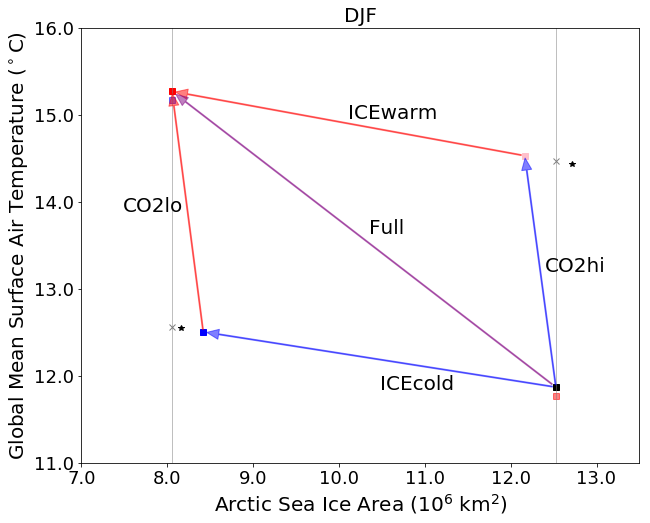

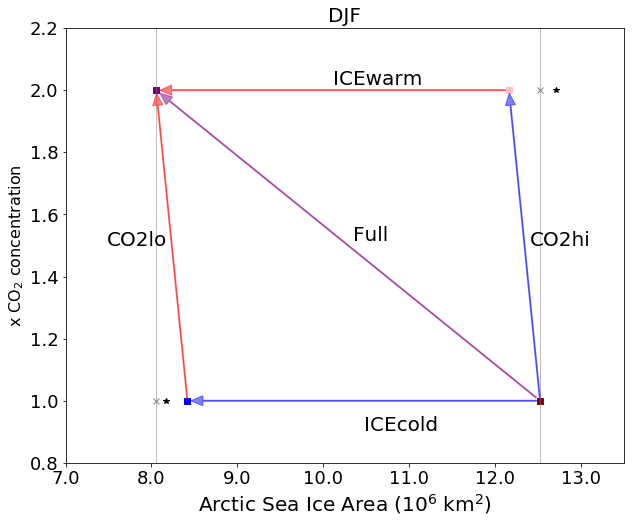

In [24]:
printtofile=True
fullann=False # full annotations

gmtsdiffs,siadiffs = plot_sims_quad(nhsias,gms,toffsets,fullann=fullann,printtofile=printtofile)
ret = plot_sims_quad(nhsias,co2conc,toffsets,coconc=True,fullann=fullann,printtofile=printtofile)

print 'DIFFS'
print gmtsdiffs

### Plot 2: SAT, SLP, Z500, U700 maps

In [132]:
import matplotlib
print matplotlib.__version__


2.0.0


(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]


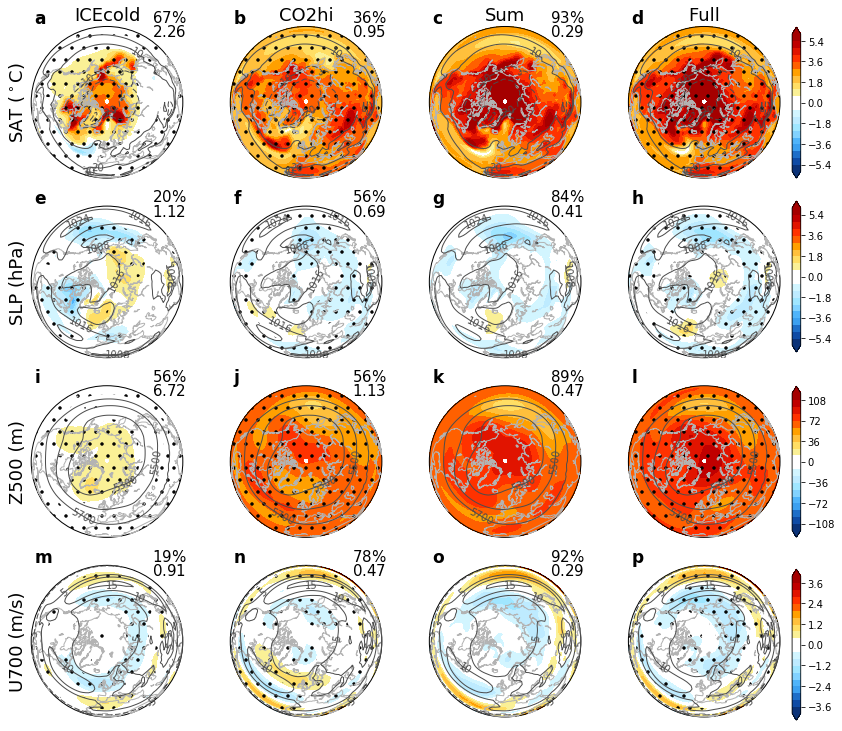

In [133]:
fsz=18


printtofile=True
sigtype='hatch'
addsig=True

cplt=reload(cplt)

if sea=='ANN':
    cmin=-6; cmax=6 # just ice
    cmin2=-6; cmax2=6
    cmind=-2; cmaxd=2

    cminp=-2; cmaxp=2 # just ice
    cmin2p=-2; cmax2p=2
    cmindp=-1.5; cmaxdp=1.5

    cminw=-1; cmaxw=1
    cmindw=-.5; cmaxdw=.5
    
    cminpr=-.6; cmaxpr=.6
    cmindpr=-.6; cmaxdpr=.6
    
    cminz=-20; cmaxz=20
    cminz2=-20; cmaxz2=20
    cminzd=-10; cmaxzd=10
    
elif sea=='DJF':
    cmin=-6; cmax=6 # just ice
    cmin2=-6; cmax2=6
    cmind=-2; cmaxd=2

    cminp=-4; cmaxp=4 # just ice
    cmin2p=-6; cmax2p=6
    cmindp=-2; cmaxdp=2

    cminw=-2; cmaxw=2
    cmindw=-1; cmaxdw=1
    
    cminpr=-1; cmaxpr=1
    cmindpr=-1; cmaxdpr=1
elif sea in ('JJA','SON','MAM'): # SAME AS ANN
    cmin=-6; cmax=6 # just ice
    cmin2=-6; cmax2=6
    cmind=-2; cmaxd=2

    cminp=-3; cmaxp=3 # just ice
    cmin2p=-6; cmax2p=6
    cmindp=-1.5; cmaxdp=1.5

    cminw=-1; cmaxw=1
    cmindw=-.5; cmaxdw=.5
    
    cminpr=-.6; cmaxpr=.6
    cmindpr=-.6; cmaxdpr=.6
    

ctlcontsslp = np.arange(992,1033,8)
ctlcontstmp = list(np.arange(-40,41,10))
ctlcontstmp.remove(0)
    
pparamstmp = {'cmin':cmin, 'cmax':cmax, 'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,'suppcb':True,'addsig':addsig,
            'sigtype':sigtype,'fsz':fsz,'addclimcont':True,'ctlconts':ctlcontstmp}
pparamsslp = {'cmin':cminp, 'cmax':cmaxp, 'cmin2':cmin2p,'cmax2':cmax2p,
            'cmind':cmindp,'cmaxd':cmaxdp,'suppcb':True,'addsig':addsig,
            'sigtype':sigtype,'fsz':fsz,'addclimcont':True,'ctlconts':ctlcontsslp}


cminz=-120; cmaxz=120
cminz2=cminz; cmaxz2=cmaxz
cminzd=-10; cmaxzd=10

#cminu8=-2; cmaxu8=2
#cminu82=-2; cmaxu82=2
#cminu8d=-1; cmaxu8d=1
#ctlcontsu=list(np.arange(-4,17,4)) # for U850

cminu8=-4; cmaxu8=4
cminu82=-4; cmaxu82=4
cminu8d=-2; cmaxu8d=2
ctlcontsu=list(np.arange(-10,26,5)) # for U700
ctlcontsu.remove(0)

ctlcontsz=list(np.arange(4900,6000,200)) 

pparamsz500 = {'cmin':cminz, 'cmax':cmaxz, 'cmin2':cminz2,'cmax2':cmaxz2,
            'cmind':cminzd,'cmaxd':cmaxzd,'suppcb':True,'addsig':addsig,
            'sigtype':sigtype,'fsz':fsz,'addclimcont':True,'ctlconts':ctlcontsz}
pparamsu850 = {'cmin':cminu8, 'cmax':cmaxu8, 'cmin2':cminu82,'cmax2':cmaxu82,
            'cmind':cminu8d,'cmaxd':cmaxu8d,'suppcb':True,'addsig':addsig,
            'sigtype':sigtype,'fsz':fsz,'addclimcont':True,'ctlconts':ctlcontsu}


cby1=.55; cby2=0.08
cbx2=0.775; cbx3=0.955
cbw=0.01; cbh=0.37




# Put all 4 variables in one fig (for paper)



fsz=18
    

cby1=0.745; cby2=.515; cby3=0.27; cby4=0.028; 
cbx2=0.775; cbx3=0.955
cbw=0.01; cbh=0.2

#fig,axs=plt.subplots(2,4,figsize=(12,5.5))
fig,axs=plt.subplots(4,4,figsize=(12,10.5))

ph,ph2 = plot_nc_linearity_maps(nctmpdt,axs[0,:],lin='one',nolin=True,**pparamstmp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('SAT ($^\circ$C)',fontsize=fsz)
axs[0,0].annotate('a', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[0,1].annotate('b', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[0,2].annotate('c', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[0,3].annotate('d', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')

ph,ph2 = plot_nc_linearity_maps(ncslpdt,axs[1,:],lin='one',
                                nolin=True,suppttl=True,**pparamsslp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('SLP (hPa)',fontsize=fsz)
axs[1,0].annotate('e', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[1,1].annotate('f', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[1,2].annotate('g', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[1,3].annotate('h', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')


pparamsz500['suppttl']=True
ph,ph2 = plot_nc_linearity_maps(ncz500dt,axs[2,:],lin='one',nolin=True,**pparamsz500)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].set_ylabel('Z500 (m)',fontsize=fsz)
axs[2,0].annotate('i', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[2,1].annotate('j', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[2,2].annotate('k', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[2,3].annotate('l', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')


ph,ph2 = plot_nc_linearity_maps(ncu850dt,axs[3,:],lin='one',
                                nolin=True,suppttl=True,**pparamsu850)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby4,cbw,cbh])
axs[3,0].set_ylabel('U850 (m/s)',fontsize=fsz)
axs[3,0].set_ylabel('U700 (m/s)',fontsize=fsz)
axs[3,0].annotate('m', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[3,1].annotate('n', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[3,2].annotate('o', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[3,3].annotate('p', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')


fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    #basename='stslpz500u850_nolinpattcorr1_maps_' # @@@@@
    basename='stslpz500u700_nolinpattcorr1_maps_'
    # @@ w stands for pattcorr are area-weighted now, May 16, 2017
    fig.savefig(basename + sea + '_nh3_' + sigtype + suff +'allcontsw.pdf',
                bbox_inches='tight')
    fig.savefig(basename + sea + '_nh3_' + sigtype+suff + 'allcontsw.png',
                bbox_inches='tight',dpi=400)
    fig.savefig(basename + sea + '_nh3_' + sigtype+ suff + 'allcontsw.jpg',
                bbox_inches='tight',dpi=400)

# add RMSE May 9, 2017
# add linearity measures for ICE and CO2 June 20, 2017

(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]


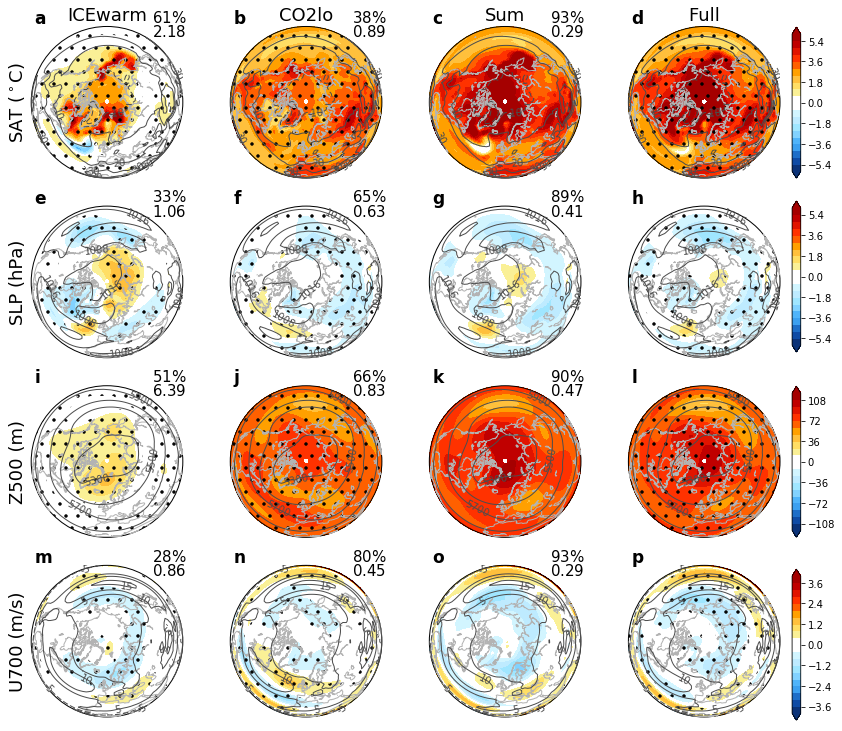

In [134]:
# Put all 4 variables in one fig (for paper)



fsz=18

printtofile=True
sigtype='hatch'
addsig=True

    

cby1=0.745; cby2=.515; cby3=0.27; cby4=0.028; 
cbx2=0.775; cbx3=0.955
cbw=0.01; cbh=0.2

#fig,axs=plt.subplots(2,4,figsize=(12,5.5))
fig,axs=plt.subplots(4,4,figsize=(12,10.5))

ph,ph2 = plot_nc_linearity_maps(nctmpdt,axs[0,:],lin='two',nolin=True,**pparamstmp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('SAT ($^\circ$C)',fontsize=fsz)
axs[0,0].annotate('a', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[0,1].annotate('b', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[0,2].annotate('c', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[0,3].annotate('d', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')

ph,ph2 = plot_nc_linearity_maps(ncslpdt,axs[1,:],lin='two',
                                nolin=True,suppttl=True,**pparamsslp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('SLP (hPa)',fontsize=fsz)
axs[1,0].annotate('e', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[1,1].annotate('f', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[1,2].annotate('g', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[1,3].annotate('h', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')


pparamsz500['suppttl']=True
ph,ph2 = plot_nc_linearity_maps(ncz500dt,axs[2,:],lin='two',nolin=True,**pparamsz500)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].set_ylabel('Z500 (m)',fontsize=fsz)
axs[2,0].annotate('i', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[2,1].annotate('j', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[2,2].annotate('k', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[2,3].annotate('l', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')


ph,ph2 = plot_nc_linearity_maps(ncu850dt,axs[3,:],lin='two',
                                nolin=True,suppttl=True,**pparamsu850)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby4,cbw,cbh])
#axs[3,0].set_ylabel('U850 (m/s)',fontsize=fsz) # @@@
axs[3,0].set_ylabel('U700 (m/s)',fontsize=fsz)
axs[3,0].annotate('m', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[3,1].annotate('n', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[3,2].annotate('o', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')
axs[3,3].annotate('p', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-1,fontweight='bold')


fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    #basename='stslpz500u850_nolinpattcorr2_maps_' # @@@
    basename='stslpz500u700_nolinpattcorr2_maps_'
    fig.savefig(basename + sea + '_nh3_' + sigtype + suff +'allcontsw.pdf',
                bbox_inches='tight')
    fig.savefig(basename + sea + '_nh3_' + sigtype+suff + 'allcontsw.png',
                bbox_inches='tight',dpi=400)
    fig.savefig(basename + sea + '_nh3_' + sigtype+ suff + 'allcontsw.jpg',
                bbox_inches='tight',dpi=400)
 



## compute pattern corrs b/w different mean states

In [135]:
northof=0

wgts = cutl.calc_areawgts(lat[lat>northof],lon)

wgtsf = wgts.flatten()



tmpdiffs = rlx_diffs(nctmpdt,dotimmean=True)

print tmpdiffs['ICEcold'].shape

# calc pattern corrs:
print sea
print '--SAT'
rval,pval = cutl.pattcorr_pearson(tmpdiffs['ICEcold'][lat>northof,:].flatten(),
                                  tmpdiffs['ICEwarm'][lat>northof,:].flatten())
print rval,pval
rval= cutl.pattcorr(tmpdiffs['ICEcold'][lat>northof,:-1].flatten(),
                    tmpdiffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'ICE weighted ' + str(rval)
rmse = cutl.calc_areawgted_rmse(tmpdiffs['ICEcold'][lat>northof,:-1].flatten(),
                    tmpdiffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'ICE rmse ' + str(rmse)
rval,pval = cutl.pattcorr_pearson(tmpdiffs['CO2hi'][lat>northof,:].flatten(),
                                  tmpdiffs['CO2lo'][lat>northof,:].flatten())
print rval,pval
rval = cutl.pattcorr(tmpdiffs['CO2hi'][lat>northof,:-1].flatten(),
                     tmpdiffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'CO2 weighted ' + str(rval)
rmse = cutl.calc_areawgted_rmse(tmpdiffs['CO2hi'][lat>northof,:-1].flatten(),
                    tmpdiffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'CO2 rmse ' + str(rmse)

slpdiffs = rlx_diffs(ncslpdt,dotimmean=True)

# calc pattern corrs:
print '--SLP'
rval,pval = cutl.pattcorr_pearson(slpdiffs['ICEcold'][lat>northof,:].flatten(),
                                  slpdiffs['ICEwarm'][lat>northof,:].flatten())
print rval,pval
rval= cutl.pattcorr(slpdiffs['ICEcold'][lat>northof,:-1].flatten(),
                    slpdiffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'weighted ' + str(rval)
rmse = cutl.calc_areawgted_rmse(slpdiffs['ICEcold'][lat>northof,:-1].flatten(),
                    slpdiffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'ICE rmse ' + str(rmse)
rval,pval = cutl.pattcorr_pearson(slpdiffs['CO2hi'][lat>northof,:].flatten(),
                                          slpdiffs['CO2lo'][lat>northof,:].flatten())
print rval,pval
rval = cutl.pattcorr(slpdiffs['CO2hi'][lat>northof,:-1].flatten(),
                     slpdiffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'weighted ' + str(rval)
rmse = cutl.calc_areawgted_rmse(slpdiffs['CO2hi'][lat>northof,:-1].flatten(),
                    slpdiffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'CO2 rmse ' + str(rmse)


z500diffs = rlx_diffs(ncz500dt,dotimmean=True)
print '--Z500'
rval,pval = cutl.pattcorr_pearson(z500diffs['ICEcold'][lat>northof,:].flatten(),
                                  z500diffs['ICEwarm'][lat>northof,:].flatten())
print rval,pval
rval= cutl.pattcorr(z500diffs['ICEcold'][lat>northof,:-1].flatten(),
                    z500diffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'weighted ' + str(rval)
rmse = cutl.calc_areawgted_rmse(z500diffs['ICEcold'][lat>northof,:-1].flatten(),
                    z500diffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'ICE rmse ' + str(rmse)
rval,pval = cutl.pattcorr_pearson(z500diffs['CO2hi'][lat>northof,:].flatten(),
                                  z500diffs['CO2lo'][lat>northof,:].flatten())
print rval,pval
rval = cutl.pattcorr(z500diffs['CO2hi'][lat>northof,:-1].flatten(),
                     z500diffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'weighted ' + str(rval)
rmse = cutl.calc_areawgted_rmse(z500diffs['CO2hi'][lat>northof,:-1].flatten(),
                    z500diffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'CO2 rmse ' + str(rmse)


u700diffs = rlx_diffs(ncu850dt,dotimmean=True)
print '--U700'
rval,pval = cutl.pattcorr_pearson(u700diffs['ICEcold'][lat>northof,:].flatten(),
                                          u700diffs['ICEwarm'][lat>northof,:].flatten())
print rval,pval
rval= cutl.pattcorr(u700diffs['ICEcold'][lat>northof,:-1].flatten(),
                    u700diffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'weighted ' + str(rval)
rmse = cutl.calc_areawgted_rmse(u700diffs['ICEcold'][lat>northof,:-1].flatten(),
                    u700diffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'ICE rmse ' + str(rmse)
rval,pval = cutl.pattcorr_pearson(u700diffs['CO2hi'][lat>northof,:].flatten(),
                                          u700diffs['CO2lo'][lat>northof,:].flatten())
print rval,pval
rval = cutl.pattcorr(u700diffs['CO2hi'][lat>northof,:-1].flatten(),
                     u700diffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'weighted ' + str(rval)
rmse = cutl.calc_areawgted_rmse(u700diffs['CO2hi'][lat>northof,:-1].flatten(),
                    u700diffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
print 'CO2 rmse ' + str(rmse)


(64, 128)
(4096,)
(32, 129)
MAM
--SAT
0.956629744249 0.0
ICE weighted 0.939249961037
ICE rmse 0.364855951594
0.863091114533 0.0
CO2 weighted 0.896502505417
CO2 rmse 0.364855951594
--SLP
0.802406693606 0.0
weighted 0.798395047805
ICE rmse 0.215928288469
0.832776212942 0.0
weighted 0.89411841235
CO2 rmse 0.215928288469
--Z500
0.918165129689 0.0
weighted 0.86468012063
ICE rmse 4.55950917371
0.887541367377 0.0
weighted 0.882801910667
CO2 rmse 4.55950917371
--U700
0.818077215349 0.0
weighted 0.798500023578
ICE rmse 0.209263823843
0.930190087015 0.0
weighted 0.945870264996
CO2 rmse 0.209263823843


In [136]:
# ### TEST area-weighting

cutl=reload(cutl)





print 'SAT .pattcorr()'
rval= cutl.pattcorr(tmpdiffs['ICEcold'][lat>northof,:-1].flatten(),
                          tmpdiffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print rval
rval = cutl.pattcorr(tmpdiffs['CO2hi'][lat>northof,:-1].flatten(),
                           tmpdiffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
print rval

SAT .pattcorr()
0.939249961037
0.896502505417


In [137]:
cutl=reload(cutl)

print 'this method does not appear to work. why? @@@'
    
    
print '----------SAT .pattcorr_wgted()--------------'
rval= cutl.pattcorr_wgted(tmpdiffs['ICEcold'][lat>northof,:-1].flatten(),
                          tmpdiffs['ICEwarm'][lat>northof,:-1].flatten(),weights=wgtsf)
print rval
#rval = cutl.pattcorr_wgted(tmpdiffs['CO2hi'][lat>northof,:-1].flatten(),
#                           tmpdiffs['CO2lo'][lat>northof,:-1].flatten(),weights=wgtsf)
#print rval


print '==============================='
x=tmpdiffs['ICEcold'][lat>northof,:-1].flatten()
y=tmpdiffs['ICEwarm'][lat>northof,:-1].flatten()


N = np.float(np.shape(x)[0])

stdx=ma.std(x)
stdy=ma.std(y)
stdxy=stdx*stdy

stdxw=cutl.calc_areawgted_std(x,weights=wgtsf)
stdyw=cutl.calc_areawgted_std(y,weights=wgtsf)
stdxyw=stdxw*stdyw

print 'stdxw,stdyw,stdx,stdy ' + str(stdxw),str(stdyw),str(stdx),str(stdy)
print 'stdxyw,stdxy ' + str(stdxyw),str(stdxy)
    
xmean = ma.average(x,weights=wgtsf)
ymean = ma.average(y,weights=wgtsf)

print 'stdxyw,N,xmean,ymean ' + str(stdxyw),str(N),str(xmean),str(ymean)

r = (1/N) * ma.sum((x-xmean)*(y-ymean)*wgtsf) / stdxyw

print 'r, r(no weights) ' + str(r),str( (1/N) * ma.sum((x-xmean)*(y-ymean)) / stdxy)
 

this method does not appear to work. why? @@@
----------SAT .pattcorr_wgted()--------------
stdxy no weights 1.87925672604
stdxy,N,xmean,ymean 0.992168785747 4096.0 0.535087983507 0.645776593279
r, r(no weights) 0.000229240534895 2.05475579047
0.000229240534895
stdxw,stdyw,stdx,stdy 0.986694611973 1.00554799196 1.39768947833 1.34454523353
stdxyw,stdxy 0.992168785747 1.87925672604
stdxyw,N,xmean,ymean 0.992168785747 4096.0 0.535087983507 0.645776593279
r, r(no weights) 0.000229240534895 1.08482493605


MAM
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20, -10, 10, 20, 30, 40]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
[ 992 1000 1008 1016 1024 1032]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]
[-10, -5, 5, 10, 15, 20, 25]
(64, 128)
(4096,)
(64, 128)
(4096,)
(64, 128)
(4096,)
[-40, -30, -20, -10, 10, 20, 30, 40]
[-40, -30, -20

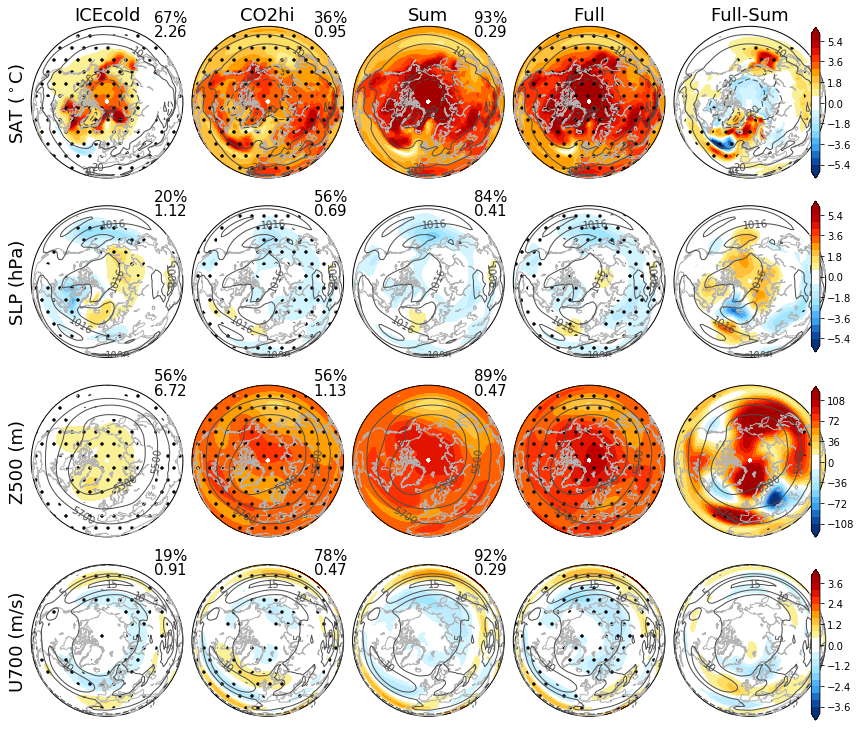

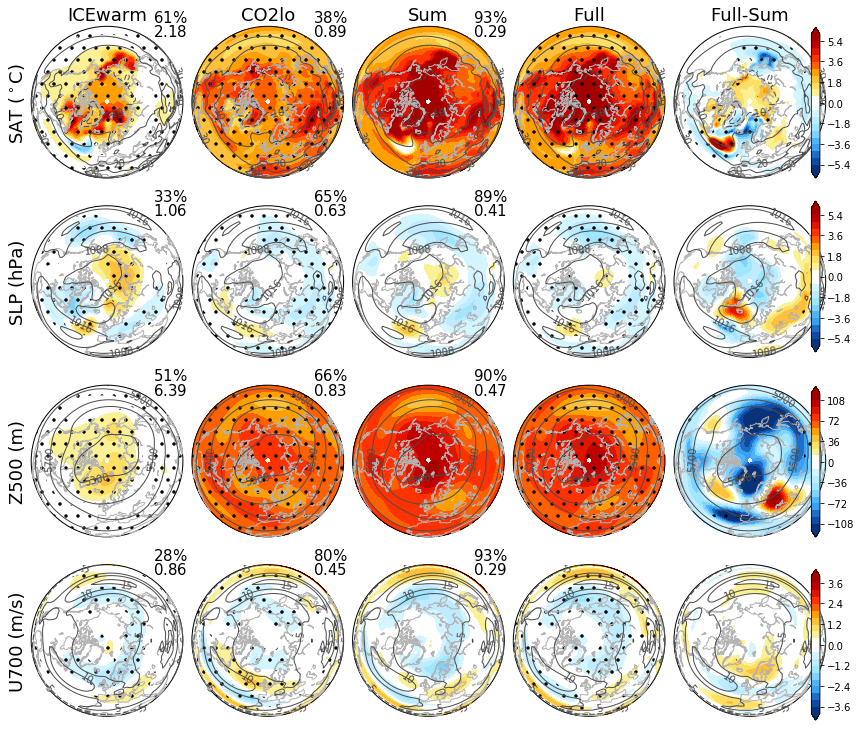

In [138]:
# INCLUDE NONLIN for reference
print sea

"""fig,axs=plt.subplots(2,5,figsize=(13,5.5))

ph,ph2, phd= plot_nc_linearity_maps(ncz500dt,axs[0,:],lin='one',nolin=False,**pparamsz500)
cplt.add_colorbar(fig,ph2,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,phd,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('Z500 (m)',fontsize=fsz)

ph,ph2,phd = plot_nc_linearity_maps(ncu850dt,axs[1,:],lin='one',
                                nolin=False,suppttl=True,**pparamsu850)
cplt.add_colorbar(fig,ph2,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,phd,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('U850 (m/s)',fontsize=fsz)

fig.tight_layout(pad=2.1,w_pad=.2)
"""
# @@@@@@@@@@@@@@@@@@@
printtofile=False

cby1=0.745; cby2=.515; cby3=0.27; cby4=0.028; 
cbx2=0.775; cbx3=0.955
cbw=0.01; cbh=0.2

fig,axs=plt.subplots(4,5,figsize=(12,10.5))

ph,ph2,phd = plot_nc_linearity_maps(nctmpdt,axs[0,:],lin='one',nolin=False,**pparamstmp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('SAT ($^\circ$C)',fontsize=fsz)

ph,ph2,phd = plot_nc_linearity_maps(ncslpdt,axs[1,:],lin='one',
                                nolin=False,suppttl=True,**pparamsslp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('SLP (hPa)',fontsize=fsz)

pparamsz500['suppttl']=True
ph,ph2,phd = plot_nc_linearity_maps(ncz500dt,axs[2,:],lin='one',nolin=False,**pparamsz500)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].set_ylabel('Z500 (m)',fontsize=fsz)

ph,ph2,phd = plot_nc_linearity_maps(ncu850dt,axs[3,:],lin='one',
                                nolin=False,suppttl=True,**pparamsu850)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby4,cbw,cbh])
#axs[3,0].set_ylabel('U850 (m/s)',fontsize=fsz) # @@@@@
axs[3,0].set_ylabel('U700 (m/s)',fontsize=fsz)

fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    #basename='ref_stslpz500u850_pattcorr1_maps_'  # @@@@
    basename='ref_stslpz500u700_pattcorr1_maps_'
    fig.savefig(basename + sea + '_nh3_' + sigtype + suff +'.pdf',
                bbox_inches='tight')
    fig.savefig(basename + sea + '_nh3_' + sigtype+suff + '.png',
                bbox_inches='tight',dpi=400)
    fig.savefig(basename + sea + '_nh3_' + sigtype+ suff + '.jpg',
                bbox_inches='tight',dpi=400)




fig,axs=plt.subplots(4,5,figsize=(12,10.5))

ph,ph2,phd = plot_nc_linearity_maps(nctmpdt,axs[0,:],lin='two',nolin=False,**pparamstmp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].set_ylabel('SAT ($^\circ$C)',fontsize=fsz)

ph,ph2,phd = plot_nc_linearity_maps(ncslpdt,axs[1,:],lin='two',
                                nolin=False,suppttl=True,**pparamsslp)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].set_ylabel('SLP (hPa)',fontsize=fsz)

pparamsz500['suppttl']=True
ph,ph2,phd = plot_nc_linearity_maps(ncz500dt,axs[2,:],lin='two',nolin=False,**pparamsz500)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].set_ylabel('Z500 (m)',fontsize=fsz)

ph,ph2,phd = plot_nc_linearity_maps(ncu850dt,axs[3,:],lin='two',
                                nolin=False,suppttl=True,**pparamsu850)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby4,cbw,cbh])
#axs[3,0].set_ylabel('U850 (m/s)',fontsize=fsz)
axs[3,0].set_ylabel('U700 (m/s)',fontsize=fsz)

fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    #basename = 'ref_stslpz500u850_pattcorr2_maps_' # @@@
    basename = 'ref_stslpz500u700_pattcorr2_maps_'
    fig.savefig(basename + sea + '_nh3_' + sigtype + suff +'.pdf',
                bbox_inches='tight')
    fig.savefig(basename + sea + '_nh3_' + sigtype+suff + '.png',
                bbox_inches='tight',dpi=400)
    fig.savefig(basename + sea + '_nh3_' + sigtype+ suff + '.jpg',
                bbox_inches='tight',dpi=400)

    


### Agreement maps, possibly for paper. 

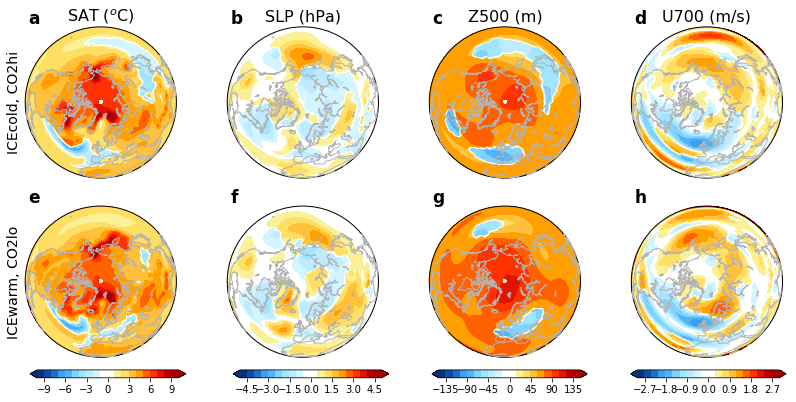

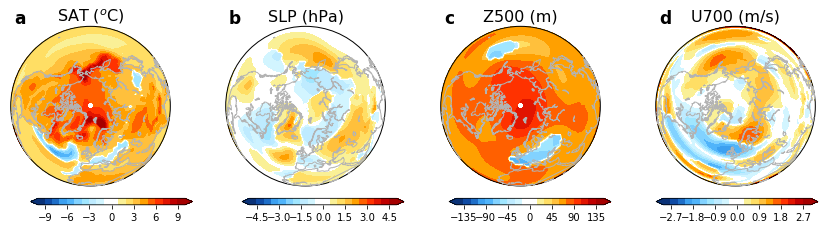

In [139]:
printtofile=False

magtype='abs'   #''  #'abs'
lin='one'

pparamstmp['suppcb']=True; pparamstmp['suppttl']=True; pparamstmp['cmin']=-10; pparamstmp['cmax']=10;
pparamstmp.pop('addclimcont',None); pparamstmp.pop('ctlconts',None)
pparamsslp['suppcb']=True; pparamsslp['suppttl']=True; pparamsslp['cmin']=-5; pparamsslp['cmax']=5;
pparamsslp.pop('addclimcont',None); pparamsslp.pop('ctlconts',None)
pparamsz500['suppcb']=True; pparamsz500['suppttl']=True; pparamsz500['cmin']=-150; pparamsz500['cmax']=150;
pparamsz500.pop('addclimcont',None); pparamsz500.pop('ctlconts',None)
pparamsu850['suppcb']=True; pparamsu850['suppttl']=True; pparamsu850['cmin']=-3; pparamsu850['cmax']=3;
pparamsu850.pop('addclimcont',None); pparamsu850.pop('ctlconts',None)

cbx1 = 0.075; cbx2=0.31; cbx3=0.54; cbx4=0.77
cby = 0.01
cbw=0.18; cbh=0.02

fig,axs=plt.subplots(2,4,figsize=(12,5.5))
ph = plot_nc_agreement_map(nctmpdt,axs[0,0],lin=lin,magtype=magtype,plab='a',**pparamstmp)
axs[0,0].set_title('SAT ($^o$C)',fontsize=fsz-2)
axs[0,0].set_ylabel('ICEcold, CO2hi',fontsize=fsz-4)
ph = plot_nc_agreement_map(ncslpdt,axs[0,1],lin=lin,magtype=magtype,plab='b',**pparamsslp)
axs[0,1].set_title('SLP (hPa)',fontsize=fsz-2)
ph = plot_nc_agreement_map(ncz500dt,axs[0,2],lin=lin,magtype=magtype,plab='c',**pparamsz500)
axs[0,2].set_title('Z500 (m)',fontsize=fsz-2)
ph = plot_nc_agreement_map(ncu850dt,axs[0,3],lin=lin,magtype=magtype,plab='d',**pparamsu850)
#axs[0,3].set_title('U850 (m/s)',fontsize=fsz-2) # @@@@
axs[0,3].set_title('U700 (m/s)',fontsize=fsz-2)


lin='two'
#fig,axs=plt.subplots(1,4,figsize=(12,5))
ph = plot_nc_agreement_map(nctmpdt,axs[1,0],lin=lin,magtype=magtype,plab='e',**pparamstmp)
axs[1,0].set_ylabel('ICEwarm, CO2lo',fontsize=fsz-4)
cplt.add_colorbar(fig,ph,pos=[cbx1,cby,cbw,cbh],orientation='horizontal')
ph = plot_nc_agreement_map(ncslpdt,axs[1,1],lin=lin,magtype=magtype,plab='f',**pparamsslp)
cplt.add_colorbar(fig,ph,pos=[cbx2,cby,cbw,cbh],orientation='horizontal')
ph = plot_nc_agreement_map(ncz500dt,axs[1,2],lin=lin,magtype=magtype,plab='g',**pparamsz500)
cplt.add_colorbar(fig,ph,pos=[cbx3,cby,cbw,cbh],orientation='horizontal')
ph = plot_nc_agreement_map(ncu850dt,axs[1,3],lin=lin,magtype=magtype,plab='h',**pparamsu850)
cplt.add_colorbar(fig,ph,pos=[cbx4,cby,cbw,cbh],orientation='horizontal')

fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    #basename='satslpz500u850_agreement_maps_' # @@@@
    basename='satslpz500u700_agreement_maps_'
    fig.savefig(basename + sea + '_lin12' + magtype + '.pdf',
                bbox_inches='tight')

    

printtofile=True
cbh=0.03

# JUST TOP ROW
lin='two'

if lin=='one': linstr='1'
else: linstr='2'
fig,axs=plt.subplots(1,4,figsize=(12.5,3))
ph = plot_nc_agreement_map(nctmpdt,axs[0],lin=lin,magtype=magtype,plab='a',**pparamstmp)
axs[0].set_title('SAT ($^o$C)',fontsize=fsz-2)
#axs[0].set_ylabel('ICEcold, CO2hi',fontsize=fsz-4)
cplt.add_colorbar(fig,ph,pos=[cbx1,cby,cbw,cbh],orientation='horizontal')
ph = plot_nc_agreement_map(ncslpdt,axs[1],lin=lin,magtype=magtype,plab='b',**pparamsslp)
axs[1].set_title('SLP (hPa)',fontsize=fsz-2)
cplt.add_colorbar(fig,ph,pos=[cbx2,cby,cbw,cbh],orientation='horizontal')
ph = plot_nc_agreement_map(ncz500dt,axs[2],lin=lin,magtype=magtype,plab='c',**pparamsz500)
axs[2].set_title('Z500 (m)',fontsize=fsz-2)
cplt.add_colorbar(fig,ph,pos=[cbx3,cby,cbw,cbh],orientation='horizontal')
ph = plot_nc_agreement_map(ncu850dt,axs[3],lin=lin,magtype=magtype,plab='d',**pparamsu850)
#axs[0,3].set_title('U850 (m/s)',fontsize=fsz-2) # @@@@
cplt.add_colorbar(fig,ph,pos=[cbx4,cby,cbw,cbh],orientation='horizontal')
axs[3].set_title('U700 (m/s)',fontsize=fsz-2)

fig.tight_layout(pad=2.1,w_pad=.2)

if printtofile:
    #basename='satslpz500u850_agreement_maps_' # @@@@
    basename='satslpz500u700_agreement_maps_'
    fig.savefig(basename + sea + '_lin'+linstr + magtype + '.pdf',
                bbox_inches='tight')




### Plot 3: monthly measure of linearity

northof 0
U700
SLP
SIC
Z500
SAT
U700
SLP
SIC
Z500
SAT
----
U700
SLP
SIC
Z500
SAT


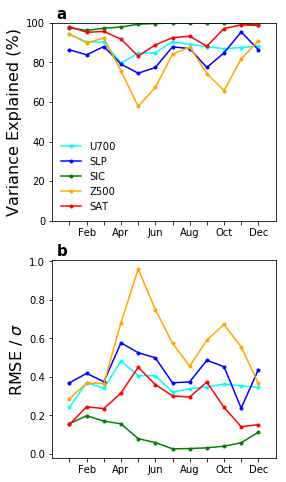

In [140]:
printtofile=False
print 'northof ' + str(nof)


mos=range(1,13)
clrdt = {'SAT':'red', 'SLP':'b', 'Z500':'orange',
         mondatukey:'cyan','tZM':'brown','uZM':'black',
        'SIC':'green'}
lgstrs=()
# JUST VAR EXPLAINED
fig,ax = plt.subplots(1,1,figsize=(4,4))

for mkey in morvals1.keys():
    if 'ZM' in mkey:
        pass
    else:
        lgstrs=lgstrs+(mkey,)
        print mkey
        val = 100*morvals1[mkey]**2
        ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5)
        #val = 100*morvals2[mkey]**2
        #ax.plot(mos,val,color=clrdt[mkey],linestyle='--',marker='s')
    
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
#ax.set_ylim((30,100))
ax.set_ylim((0,100))
ax.set_ylabel('Variance Explained (%)',fontsize=fsz)
#ax.legend(('SAT',
#           'SLP',
#           'U850','Z500'),frameon=False,loc='best')
ax.legend(lgstrs,frameon=False,loc='best')
if printtofile:
    #basename = 'Fig3_stslpu850z500_PattCorr_nof' # @@@@
    basename = 'Fig3_stslpu700z500_PattCorr_nof'
    fig.savefig(basename + str(nof) + '_monthly.pdf',
                bbox_inches='tight')
    fig.savefig(basename + str(nof) + '_monthly.jpg',
                bbox_inches='tight',dpi=300)


printtofile=False
# BOTH VAR EXPLAINED AND RMSE
fig,axs = plt.subplots(2,1,figsize=(4,8))
lgstrs=()

ax=axs[0]
for mkey in morvals1.keys():
    if 'ZM' in mkey:
        pass
    else:
        print mkey
        lgstrs=lgstrs+(mkey,)
        val = 100*morvals1[mkey]**2
        ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5)
        #val = 100*morvals2[mkey]**2
        #ax.plot(mos,val,color=clrdt[mkey],linestyle='--',marker='s')
    
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
ax.set_ylim((0,100))
ax.set_ylabel('Variance Explained (%)',fontsize=fsz-2)
ax.annotate('a', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')
ax.legend(lgstrs,frameon=False,loc='best')

print '----'
ax=axs[1]
for mkey in morvals1.keys():
    
    if 'ZM' in mkey:
        pass # no vertical vars 
    else:
        print mkey
        val = mormse1[mkey]
        ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5)
        #val = mormse2[mkey]
        #ax.plot(mos,val,color=clrdt[mkey],linestyle='--',marker='.')
    
# lin one and two RMSE the same

ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
ax.set_ylabel('RMSE / $\sigma$', fontsize=fsz-2)
#ax.set_ylabel('RMSE / $\overline{\sigma}$', fontsize=fsz-2)
#ax.set_ylabel('RMSE', fontsize=fsz-2)

ax.annotate('b', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')

if printtofile:
    basename= 'Fig3_stslpu700z500_PattCorr_RMSE_nof'
    fig.savefig(basename + str(nof) + '_monthly_sicw_normsigmamean.pdf'
                ,bbox_inches='tight')
    fig.savefig(basename + str(nof) + '_monthly_sicw_normsigmamean.jpg',
                bbox_inches='tight',dpi=300)
    

In [141]:
# ===========================================    
# Add linearity of ICE and CO2 separately too per reviewer request

printtofile=False

# BOTH VAR EXPLAINED AND RMSE
fig,axs = plt.subplots(2,3,figsize=(12,8))
#fig,axs = plt.subplots(2,2,figsize=(8,8))

rmylims=(0,3)
lgstrs=()

ax=axs[0,0]
for mkey in morvals1.keys():
    if 'ZM' in mkey: pass
    else:
        print mkey
        lgstrs=lgstrs+(mkey,)
        val = 100*morvals1[mkey]**2
        ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5)
        #val = 100*morvals2[mkey]**2
        #ax.plot(mos,val,color=clrdt[mkey],linestyle='--',marker='s')
    
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
ax.set_ylim((0,100))
ax.set_ylabel('Variance Explained (%)',fontsize=fsz-2)
ax.set_title('Sum',fontsize=fsz-3)
ax.annotate('a', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')
ax.legend(lgstrs,frameon=False,loc='best')

print '----'
ax=axs[1,0]
for mkey in morvals1.keys():
    if 'ZM' in mkey:
        pass # no vertical vars 
    else:
        print mkey
        val = mormse1[mkey]
        ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5)
    
# lin one and two RMSE the same
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
ax.set_ylim(rmylims)
ax.set_ylabel('RMSE / $\sigma$', fontsize=fsz-2)
#ax.set_ylabel('RMSE / $\overline{\sigma}$', fontsize=fsz-2)
#ax.set_ylabel('RMSE', fontsize=fsz-2)
ax.annotate('b', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')
# ------ ICE, CO2 versus Full
ax=axs[0,1]
for mkey in morvals1.keys():
    if 'ZM' in mkey:
        pass
    else:
        if mkey=='SIC': pass
        else:
            print mkey
            val = 100*morvalsice1[mkey]**2
            ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5)
    
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
ax.set_ylim((0,100))
ax.set_title('ICEcold',fontsize=fsz-3)
ax.annotate('c', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')

print '----'
ax=axs[1,1]
for mkey in morvals1.keys():
    if 'ZM' in mkey:
        pass # no vertical vars 
    else:
        if mkey=='SIC': pass
        else:
            print mkey
            val = mormseice1[mkey]
            ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5)
            #val = mormseco1[mkey]
            #ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5,linestyle='dashed')
    
# lin one and two RMSE the same

ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
ax.set_ylim(rmylims)
ax.annotate('d', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')

# ------ ICE, CO2 versus Full
ax=axs[0,2]
for mkey in morvals1.keys():
    if 'ZM' in mkey:
        pass
    else:
        if mkey=='SIC': pass
        else:
            val = 100*morvalsco1[mkey]**2
            ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5)
    
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
ax.set_ylim((0,100))
ax.set_title('CO2hi',fontsize=fsz-3)
ax.annotate('e', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')

print '----'
ax=axs[1,2]
for mkey in morvals1.keys():
    if 'ZM' in mkey:
        pass # no vertical vars 
    else:
        if mkey=='SIC': pass
        else:
            val = mormseco1[mkey]
            ax.plot(mos,val,color=clrdt[mkey],marker='.',linewidth=1.5)
    
# lin one and two RMSE the same

ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
ax.set_ylim(rmylims)
ax.annotate('f', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')


if printtofile:
    basename= 'Fig3_6panel_stslpu700z500_PattCorr_RMSE_nof'
    fig.savefig(basename + str(nof) + '_monthly_sicw_normsigmamean.pdf'
                ,bbox_inches='tight')
    fig.savefig(basename + str(nof) + '_monthly_sicw_normsigmamean.jpg',
                bbox_inches='tight',dpi=300)

U700
SLP
SIC
Z500
SAT
----
U700
SLP
SIC
Z500
SAT
U700
SLP
Z500
SAT
----
U700
SLP
Z500
SAT
----


### Figure 4: circulation response to sea ice and CO2

In [163]:

# Save these settings for 4x3 panel that is in paper Supp
sigtype='hatch'

addclimcont=True

cplt=reload(cplt)


levlim=100
ptype='nh'; latlim=0 # nh plot

# cmind/cmaxd : for the difference b/w Sum and Full
# cmin/cmax : for the ICE response (sometimes)
# cmin2/cmax2 : for the CO2, Sum, and Full responses

# T
cmin=-1; cmax=1; cmap='blue2red_20' 
cmin2=-8; cmax2=8 
cmind=-.5; cmaxd=.5
ctlcontst=np.arange(220,300,10)
if sea=='DJF':
    cmin=-2; cmax=2;
    cmind=-1; cmaxd=1
    
# Z
cminz=-25; cmaxz=25; cmap='blue2red_20' 
cmin2z=-200; cmax2z=200
cmindz=-15; cmaxdz=15
ctlcontsz=np.arange(2000,20000,2000)
if sea=='DJF':
    cminz=-60; cmaxz=60;
    cmin2z=-240; cmax2z=240

# U
cminw=-1; cmaxw=1 # for the ice comparison
cmin2w=-6; cmax2w=6 
cmindw=-.5; cmaxdw=.5
ctlcontsw=np.arange(-3,30,5)
if sea=='DJF':
    cminw=-6; cmaxw=6;
    cmindw=-1; cmaxdw=1

    
pparamsT = {'cmin':cmin, 'cmax':cmax, 'cmap':cmap,'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':True,'nofull':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontst}

pparamsZ = {'cmin':cminz, 'cmax':cmaxz, 'cmap':cmap,'cmin2':cmin2z,'cmax2':cmax2z,
            'cmind':cmindz,'cmaxd':cmaxdz,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':True,'nofull':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsz}

pparamsU = {'cmin':cminw, 'cmax':cmaxw, 'cmap':cmap,'cmin2':cmin2w,'cmax2':cmax2w,
            'cmind':cmindw,'cmaxd':cmaxdw,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':True,'nofull':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsw}


cby1=.7; cby2=0.4; cby3=0.1
cbx1=0.5; cbx2=0.775; cbx3=0.962
cbw=0.02; cbh=0.25



## Add Sum and Full to vert plots

/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert

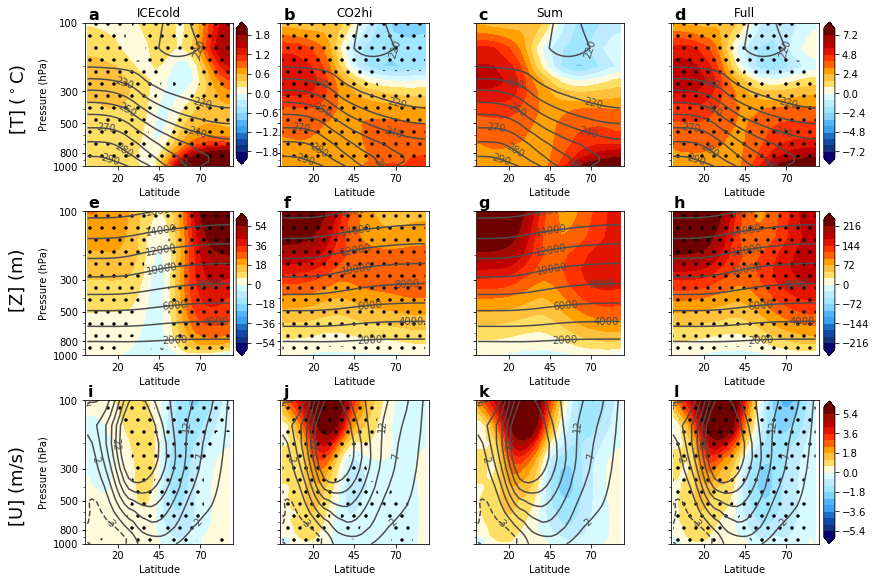

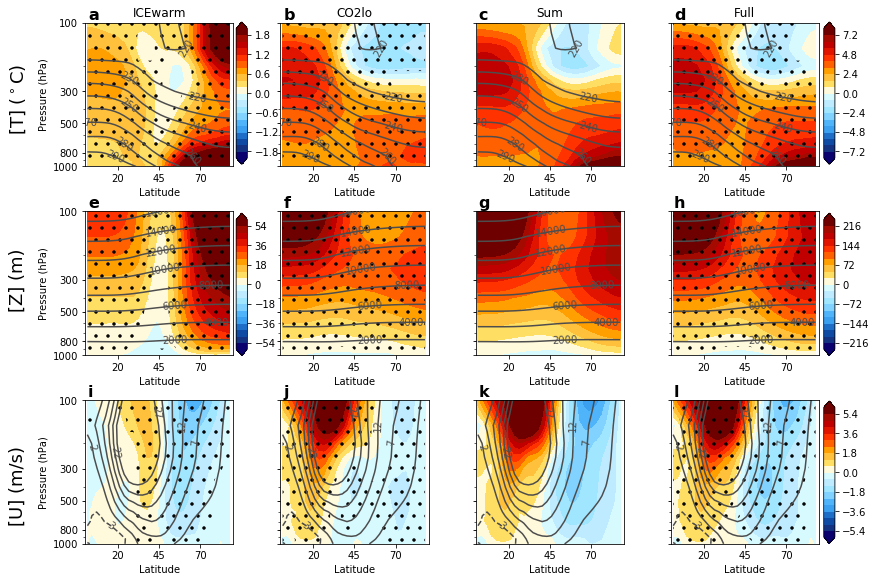

In [179]:
printtofile=False

cplt=reload(cplt)


pparamsT = {'cmin':cmin, 'cmax':cmax, 'cmap':cmap,'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':False,'nofull':False,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontst,'latcoord':lat}

pparamsZ = {'cmin':cminz, 'cmax':cmaxz, 'cmap':cmap,'cmin2':cmin2z,'cmax2':cmax2z,
            'cmind':cmindz,'cmaxd':cmaxdz,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':False,'nofull':False,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsz,'latcoord':lat}

pparamsU = {'cmin':cminw, 'cmax':cmaxw, 'cmap':cmap,'cmin2':cmin2w,'cmax2':cmax2w,
            'cmind':cmindw,'cmaxd':cmaxdw,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':False,'nofull':False,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsw,'latcoord':lat}


cby1=.695; cby2=0.4; cby3=0.11
cbx1=0.275; cbx2=0.775; cbx3=0.955
cbw=0.013; cbh=0.22
aparams={'xy':(0.02,1.025),'xycoords':'axes fraction',
         'fontsize':fsz-2,'fontweight':'bold'}
fig,axs=plt.subplots(3,4,figsize=(12,9))

ph,ph2 = plot_nc_linearity_maps(nctZMdt,axs[0,:],lin='one',nolin=True,**pparamsT)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].annotate('[T] ($^\circ$C)',xy=(0.01,0.865),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[0,0].annotate('a', **aparams)
axs[0,1].annotate('b', **aparams)
axs[0,2].annotate('c', **aparams)
axs[0,3].annotate('d', **aparams)

ph,ph2 = plot_nc_linearity_maps(nczZMdt,axs[1,:],lin='one',suppttl=True,nolin=True,**pparamsZ)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].annotate('[Z] (m)',xy=(0.01,0.55),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[1,0].annotate('e', **aparams)
axs[1,1].annotate('f', **aparams)
axs[1,2].annotate('g', **aparams)
axs[1,3].annotate('h', **aparams)
    
ph,ph2 = plot_nc_linearity_maps(ncuZMdt,axs[2,:],lin='one',suppttl=True,nolin=True,**pparamsU)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
if cminw==cmin2w: pass
else: cplt.add_colorbar(fig,ph,pos=[cbx1,cby3,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].annotate('[U] (m/s)',xy=(0.01,0.21),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[2,0].annotate('i', **aparams)
axs[2,1].annotate('j', **aparams)
axs[2,2].annotate('k', **aparams)
axs[2,3].annotate('l', **aparams)

fig.tight_layout(pad=4,w_pad=4,h_pad=1)

if printtofile:
    if addclimcont: prstr='cont'
    else: prstr=''
    basename='TZU_iceco2_vertsumfulllin1_'
    fig.savefig(basename + sea + '_'  +sigtype+ ptype + prstr + suff + '.pdf', 
                bbox_inches='tight')
#    fig.savefig(basename + sea + '_'+ sigtype+ptype + prstr + suff + '.png',dpi=300, 
#                bbox_inches='tight')
#    fig.savefig(basename + sea + '_'  + sigtype+ptype + prstr + suff + '.jpg',dpi=300, 
#                bbox_inches='tight')
    
    
fig,axs=plt.subplots(3,4,figsize=(12,9))

ph,ph2 = plot_nc_linearity_maps(nctZMdt,axs[0,:],lin='two',nolin=True,**pparamsT)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].annotate('[T] ($^\circ$C)',xy=(0.01,0.865),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[0,0].annotate('a', **aparams)
axs[0,1].annotate('b', **aparams)
axs[0,2].annotate('c', **aparams)
axs[0,3].annotate('d', **aparams)

ph,ph2 = plot_nc_linearity_maps(nczZMdt,axs[1,:],lin='two',suppttl=True,nolin=True,**pparamsZ)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].annotate('[Z] (m)',xy=(0.01,0.55),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[1,0].annotate('e', **aparams)
axs[1,1].annotate('f', **aparams)
axs[1,2].annotate('g', **aparams)
axs[1,3].annotate('h', **aparams)
   
ph,ph2 = plot_nc_linearity_maps(ncuZMdt,axs[2,:],lin='two',suppttl=True,nolin=True,**pparamsU)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
if cminw==cmin2w: pass
else: cplt.add_colorbar(fig,ph,pos=[cbx1,cby3,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].annotate('[U] (m/s)',xy=(0.01,0.21),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[2,0].annotate('i', **aparams)
axs[2,1].annotate('j', **aparams)
axs[2,2].annotate('k', **aparams)
axs[2,3].annotate('l', **aparams)

fig.tight_layout(pad=4,w_pad=4,h_pad=1)

if printtofile:
    if addclimcont: prstr='cont'
    else: prstr=''
    basename='TZU_iceco2_vertsumfulllin2_'
    fig.savefig(basename + sea + '_'  +sigtype+ ptype + prstr + suff + '.pdf', 
                bbox_inches='tight')
#    fig.savefig(basename + sea + '_'+ sigtype+ptype + prstr + suff + '.png',dpi=300, 
#                bbox_inches='tight')
#    fig.savefig(basename + sea + '_'  + sigtype+ptype + prstr + suff + '.jpg',dpi=300, 
#                bbox_inches='tight')
    

DJF


/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
printing pattern corrs for vertical zonal means
Sum, ICE, CO2 (rval,pval)
(0.999253922275 0.0), (0.462456039286 1.35109809977e-38), (0.986397629021 0.0)
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
printing pattern corrs for vertical zonal means
Sum, ICE, CO2 (rval,pval)
(0.992320363691 0.0), (0.03102538

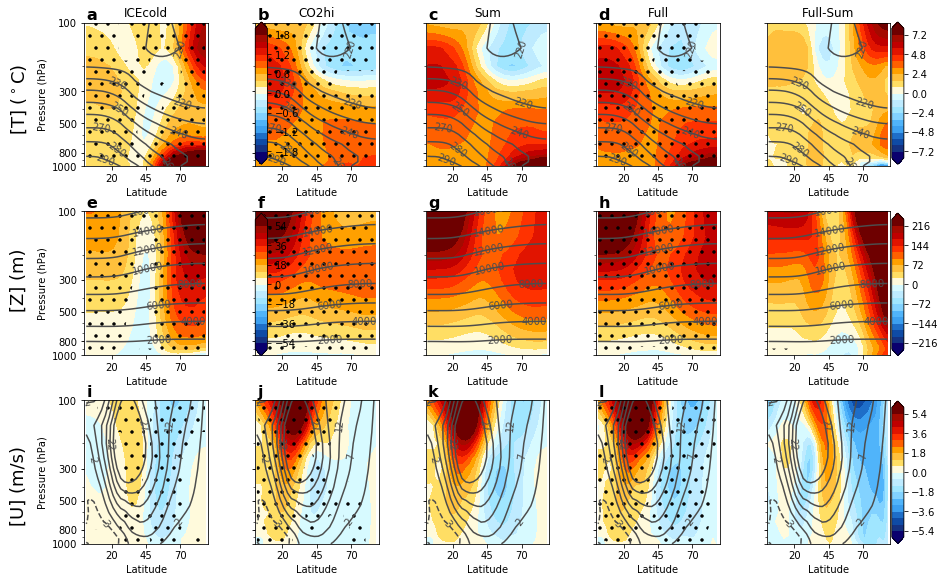

In [186]:
# Add nonlinearity bit for reference:

print sea

fig,axs=plt.subplots(3,5,figsize=(13,9))

ph,ph2,phd = plot_nc_linearity_maps(nctZMdt,axs[0,:],lin='one',nolin=False,**pparamsT)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].annotate('[T] ($^\circ$C)',xy=(0.01,0.865),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[0,0].annotate('a', **aparams)
axs[0,1].annotate('b', **aparams)
axs[0,2].annotate('c', **aparams)
axs[0,3].annotate('d', **aparams)

ph,ph2,phd = plot_nc_linearity_maps(nczZMdt,axs[1,:],lin='one',suppttl=True,nolin=False,**pparamsZ)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].annotate('[Z] (m)',xy=(0.01,0.55),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[1,0].annotate('e', **aparams)
axs[1,1].annotate('f', **aparams)
axs[1,2].annotate('g', **aparams)
axs[1,3].annotate('h', **aparams)
    
ph,ph2,phd = plot_nc_linearity_maps(ncuZMdt,axs[2,:],lin='one',suppttl=True,nolin=False,**pparamsU)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
if cminw==cmin2w: pass
else: cplt.add_colorbar(fig,ph,pos=[cbx1,cby3,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].annotate('[U] (m/s)',xy=(0.01,0.21),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[2,0].annotate('i', **aparams)
axs[2,1].annotate('j', **aparams)
axs[2,2].annotate('k', **aparams)
axs[2,3].annotate('l', **aparams)

fig.tight_layout(pad=4,w_pad=4,h_pad=1)




### Show Pacific and Atlantic sectors separately for vertical plots

(199, 22, 64)


/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert

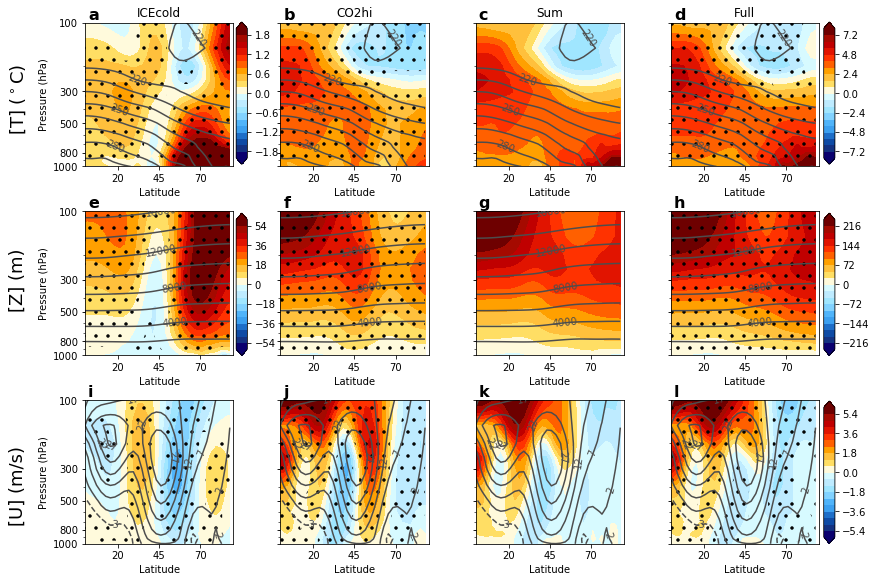

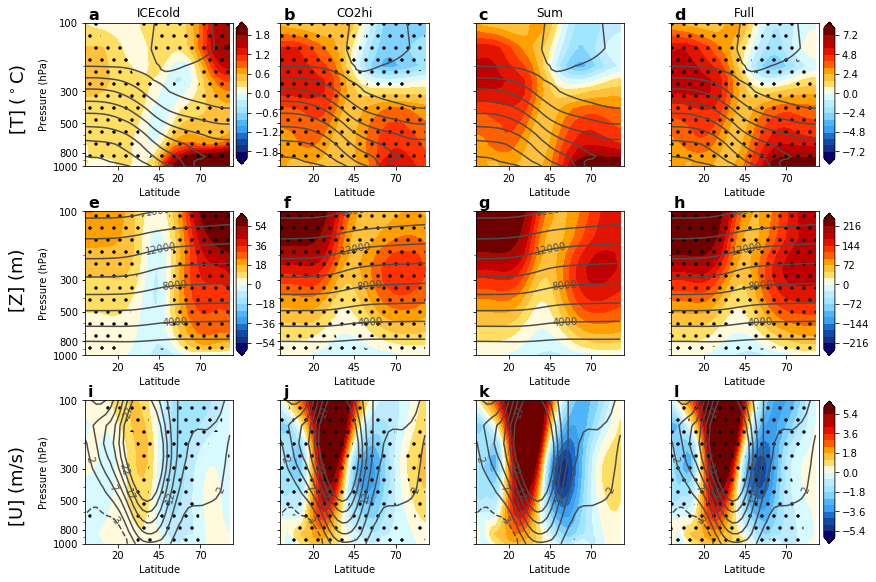

In [165]:

print nctregZMdt['nthatlthnnh']['preipreiice'].shape

# LIN 1 Atlantic and Pacific Sectors for paper supp.

printtofile=False


lin='one'

pparamsT = {'cmin':cmin, 'cmax':cmax, 'cmap':cmap,'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':False,'nofull':False,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontst,'latcoord':glat}

pparamsZ = {'cmin':cminz, 'cmax':cmaxz, 'cmap':cmap,'cmin2':cmin2z,'cmax2':cmax2z,
            'cmind':cmindz,'cmaxd':cmaxdz,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':False,'nofull':False,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsz,'latcoord':glat}

pparamsU = {'cmin':cminw, 'cmax':cmaxw, 'cmap':cmap,'cmin2':cmin2w,'cmax2':cmax2w,
            'cmind':cmindw,'cmaxd':cmaxdw,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':False,'nofull':False,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsw,'latcoord':glat}

cby1=.695; cby2=0.4; cby3=0.11
cbx1=0.275; cbx2=0.775; cbx3=0.955
cbw=0.013; cbh=0.22
aparams={'xy':(0.02,1.025),'xycoords':'axes fraction',
         'fontsize':fsz-2,'fontweight':'bold'}
fig,axs=plt.subplots(3,4,figsize=(12,9))

ph,ph2 = plot_nc_linearity_maps(nctregZMdt['nthatlthnnh'],axs[0,:],lin=lin,nolin=True,**pparamsT)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].annotate('[T] ($^\circ$C)',xy=(0.01,0.865),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[0,0].annotate('a', **aparams)
axs[0,1].annotate('b', **aparams)
axs[0,2].annotate('c', **aparams)
axs[0,3].annotate('d', **aparams)

ph,ph2 = plot_nc_linearity_maps(nczregZMdt['nthatlthnnh'],axs[1,:],lin=lin,suppttl=True,nolin=True,**pparamsZ)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].annotate('[Z] (m)',xy=(0.01,0.55),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[1,0].annotate('e', **aparams)
axs[1,1].annotate('f', **aparams)
axs[1,2].annotate('g', **aparams)
axs[1,3].annotate('h', **aparams)
    
ph,ph2 = plot_nc_linearity_maps(ncuregZMdt['nthatlthnnh'],axs[2,:],lin=lin,suppttl=True,nolin=True,**pparamsU)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
if cminw==cmin2w: pass
else: cplt.add_colorbar(fig,ph,pos=[cbx1,cby3,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].annotate('[U] (m/s)',xy=(0.01,0.21),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[2,0].annotate('i', **aparams)
axs[2,1].annotate('j', **aparams)
axs[2,2].annotate('k', **aparams)
axs[2,3].annotate('l', **aparams)

fig.tight_layout(pad=4,w_pad=4,h_pad=1)

if printtofile:
    if addclimcont: prstr='cont'
    else: prstr=''
    basename='TZUnthatlthnnh_iceco2_vertsumfulllin1_'
    fig.savefig(basename + sea + '_'  +sigtype+ ptype + prstr + suff + '.pdf', 
                bbox_inches='tight')    
    
fig,axs=plt.subplots(3,4,figsize=(12,9))

ph,ph2 = plot_nc_linearity_maps(nctregZMdt['nthpacnh'],axs[0,:],lin=lin,nolin=True,**pparamsT)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].annotate('[T] ($^\circ$C)',xy=(0.01,0.865),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[0,0].annotate('a', **aparams)
axs[0,1].annotate('b', **aparams)
axs[0,2].annotate('c', **aparams)
axs[0,3].annotate('d', **aparams)

ph,ph2 = plot_nc_linearity_maps(nczregZMdt['nthpacnh'],axs[1,:],lin=lin,suppttl=True,nolin=True,**pparamsZ)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].annotate('[Z] (m)',xy=(0.01,0.55),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[1,0].annotate('e', **aparams)
axs[1,1].annotate('f', **aparams)
axs[1,2].annotate('g', **aparams)
axs[1,3].annotate('h', **aparams)
   
ph,ph2 = plot_nc_linearity_maps(ncuregZMdt['nthpacnh'],axs[2,:],lin=lin,suppttl=True,nolin=True,**pparamsU)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
if cminw==cmin2w: pass
else: cplt.add_colorbar(fig,ph,pos=[cbx1,cby3,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].annotate('[U] (m/s)',xy=(0.01,0.21),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[2,0].annotate('i', **aparams)
axs[2,1].annotate('j', **aparams)
axs[2,2].annotate('k', **aparams)
axs[2,3].annotate('l', **aparams)

fig.tight_layout(pad=4,w_pad=4,h_pad=1)

if printtofile:
    if addclimcont: prstr='cont'
    else: prstr=''
    basename='TZUnthpacnh_iceco2_vertsumfulllin1_'
    fig.savefig(basename + sea + '_'  +sigtype+ ptype + prstr + suff + '.pdf', 
                bbox_inches='tight')


In [166]:
# Show Pacific and Atlantic sections separately: vertical plots

print nctregZMdt['nthatlthnnh']['preipreiice'].shape

# LIN 2 Atlantic and Pacific Sectors for paper supp.

printtofile=False


lin='two'

pparamsT = {'cmin':cmin, 'cmax':cmax, 'cmap':cmap,'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':False,'nofull':False,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontst,'latcoord':glat}

pparamsZ = {'cmin':cminz, 'cmax':cmaxz, 'cmap':cmap,'cmin2':cmin2z,'cmax2':cmax2z,
            'cmind':cmindz,'cmaxd':cmaxdz,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':False,'nofull':False,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsz,'latcoord':glat}

pparamsU = {'cmin':cminw, 'cmax':cmaxw, 'cmap':cmap,'cmin2':cmin2w,'cmax2':cmax2w,
            'cmind':cmindw,'cmaxd':cmaxdw,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'nosum':False,'nofull':False,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,
            'addclimcont':addclimcont,'ctlconts':ctlcontsw,'latcoord':glat}

cby1=.695; cby2=0.4; cby3=0.11
cbx1=0.275; cbx2=0.775; cbx3=0.955
cbw=0.013; cbh=0.22
aparams={'xy':(0.02,1.025),'xycoords':'axes fraction',
         'fontsize':fsz-2,'fontweight':'bold'}
fig,axs=plt.subplots(3,4,figsize=(12,9))

ph,ph2 = plot_nc_linearity_maps(nctregZMdt['nthatlthnnh'],axs[0,:],lin=lin,nolin=True,**pparamsT)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].annotate('[T] ($^\circ$C)',xy=(0.01,0.865),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[0,0].annotate('a', **aparams)
axs[0,1].annotate('b', **aparams)
axs[0,2].annotate('c', **aparams)
axs[0,3].annotate('d', **aparams)

ph,ph2 = plot_nc_linearity_maps(nczregZMdt['nthatlthnnh'],axs[1,:],lin=lin,suppttl=True,nolin=True,**pparamsZ)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].annotate('[Z] (m)',xy=(0.01,0.55),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[1,0].annotate('e', **aparams)
axs[1,1].annotate('f', **aparams)
axs[1,2].annotate('g', **aparams)
axs[1,3].annotate('h', **aparams)
    
ph,ph2 = plot_nc_linearity_maps(ncuregZMdt['nthatlthnnh'],axs[2,:],lin=lin,suppttl=True,nolin=True,**pparamsU)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
if cminw==cmin2w: pass
else: cplt.add_colorbar(fig,ph,pos=[cbx1,cby3,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].annotate('[U] (m/s)',xy=(0.01,0.21),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[2,0].annotate('i', **aparams)
axs[2,1].annotate('j', **aparams)
axs[2,2].annotate('k', **aparams)
axs[2,3].annotate('l', **aparams)

fig.tight_layout(pad=4,w_pad=4,h_pad=1)

if printtofile:
    if addclimcont: prstr='cont'
    else: prstr=''
    basename='TZUnthatlthnnh_iceco2_vertsumfulllin2_'
    fig.savefig(basename + sea + '_'  +sigtype+ ptype + prstr + suff + '.pdf', 
                bbox_inches='tight')    
    
fig,axs=plt.subplots(3,4,figsize=(12,9))

ph,ph2 = plot_nc_linearity_maps(nctregZMdt['nthpacnh'],axs[0,:],lin=lin,nolin=True,**pparamsT)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby1,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby1,cbw,cbh])
axs[0,0].annotate('[T] ($^\circ$C)',xy=(0.01,0.865),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[0,0].annotate('a', **aparams)
axs[0,1].annotate('b', **aparams)
axs[0,2].annotate('c', **aparams)
axs[0,3].annotate('d', **aparams)

ph,ph2 = plot_nc_linearity_maps(nczregZMdt['nthpacnh'],axs[1,:],lin=lin,suppttl=True,nolin=True,**pparamsZ)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph,pos=[cbx1,cby2,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby2,cbw,cbh])
axs[1,0].annotate('[Z] (m)',xy=(0.01,0.55),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[1,0].annotate('e', **aparams)
axs[1,1].annotate('f', **aparams)
axs[1,2].annotate('g', **aparams)
axs[1,3].annotate('h', **aparams)
   
ph,ph2 = plot_nc_linearity_maps(ncuregZMdt['nthpacnh'],axs[2,:],lin=lin,suppttl=True,nolin=True,**pparamsU)
#cplt.add_colorbar(fig,ph,pos=[cbx2,cby2,cbw,cbh])
if cminw==cmin2w: pass
else: cplt.add_colorbar(fig,ph,pos=[cbx1,cby3,cbw,cbh])
cplt.add_colorbar(fig,ph2,pos=[cbx3,cby3,cbw,cbh])
axs[2,0].annotate('[U] (m/s)',xy=(0.01,0.21),xycoords='figure fraction',rotation=90,fontsize=fsz)
axs[2,0].annotate('i', **aparams)
axs[2,1].annotate('j', **aparams)
axs[2,2].annotate('k', **aparams)
axs[2,3].annotate('l', **aparams)

fig.tight_layout(pad=4,w_pad=4,h_pad=1)

if printtofile:
    if addclimcont: prstr='cont'
    else: prstr=''
    basename='TZUnthpacnh_iceco2_vertsumfulllin2_'
    fig.savefig(basename + sea + '_'  +sigtype+ ptype + prstr + suff + '.pdf', 
                bbox_inches='tight')


(199, 22, 64)


/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
[220 230 240 250 260 270 280 290]
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert not implemented yet @@@
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
[ 2000  4000  6000  8000 10000 12000 14000 16000 18000]
(64, 128)
(4096,)
NOTE vert pattern corr is not pressure weighted
vert

### what percentage of FULL Arctic temp is from CO2 vs ICE?


(<matplotlib.axes._axes.Axes at 0x184a556d0>,
 <matplotlib.colorbar.Colorbar at 0x1687d3750>)

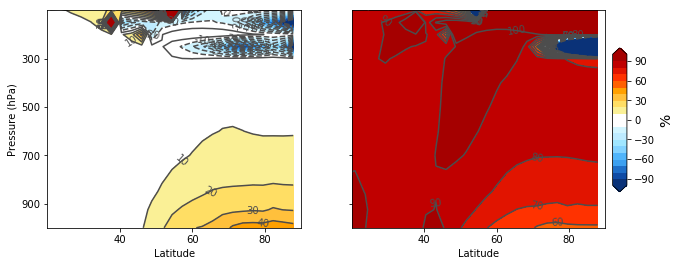

In [146]:
cplt=reload(cplt)

commonparams={'cmin':-100,'cmax':100,
              'levlim':100,'ptype':'nh',
              'latlim':0,'suppcb':True,'screen':True,
              'addcontlines':True,'addcontlabs':True,
              'fmt':'%2.0f'}

tZMdiffs={}
tZMdiffs = rlx_diffs(nctZMdt)

# what percentage of FULL Arctic temp is from CO2 vs ICE?
plotfld = tZMdiffs['ICEcold'].mean(axis=0) / tZMdiffs['Full'].mean(axis=0) * 100
fig,axs=plt.subplots(1,2,figsize=(10,4))
ax=axs[0]
cf = cplt.vert_plot(plotfld,lev,lat,axis=ax,**commonparams)

plotfld = tZMdiffs['CO2hi'].mean(axis=0) / tZMdiffs['Full'].mean(axis=0) * 100
ax=axs[1]
cf = cplt.vert_plot(plotfld,lev,lat,axis=ax,suppylab=True,**commonparams)
cplt.add_colorbar(fig,cf,label='%')


# what percentage of SUM Arctic temp is from CO2 vs ICE?
plotfld = tZMdiffs['ICEcold'].mean(axis=0) / (tZMdiffs['ICEcold'].mean(axis=0)+\
                                              tZMdiffs['CO2hi'].mean(axis=0)) * 100
fig,axs=plt.subplots(1,2,figsize=(10,4))
ax=axs[0]
cf = cplt.vert_plot(plotfld,lev,lat,axis=ax,**commonparams)

plotfld = tZMdiffs['CO2hi'].mean(axis=0) / (tZMdiffs['ICEcold'].mean(axis=0)+\
                                              tZMdiffs['CO2hi'].mean(axis=0)) * 100
ax=axs[1]
cf = cplt.vert_plot(plotfld,lev,lat,axis=ax,suppylab=True,**commonparams)
cplt.add_colorbar(fig,cf,label='%')


In [147]:
# seasonal cycle of Zonal mean SAT with latitude


nctmpzmclimo={}; nctmpzmstd={}; nctmpzmsea={}
for casename in casenames:
    print casename
    nctmpzmclimo[casename],nctmpzmstd = cutl.climatologize(nctmpmozmdt[casename])
    nctmpzmsea[casename] = nctmpzmdt[casename].mean(axis=0)
    

preipreiice
prei2xco2iceb
2xco22xco2ice
2xco2preiice


[0.23962018647513972 0.21181381237246555 0.20619742475490455
 0.20606045705549292 0.20724776469008788 0.1977981145939154
 0.20239967030353156 0.19065550770934436 0.17260451453251235
 0.17441589118830336 0.1922432503463618 0.19453028052743626
 0.16518136561835384 0.07638442588941352 -0.07548760484730366
 0.01751955490287571 0.23698227086691226 0.5061490836844431
 0.7223944856025541 1.0132518189075648 1.2540897547153267
 1.3818118228004217 1.4758967549793667 1.6212163396193908
 1.9051487426375964 2.344951146629862 2.7627394737238813 2.994919593583006
 3.1498905759825817 3.3048656252944077 3.2605274330271996 3.134346724409685]


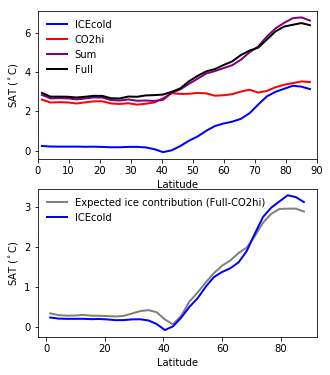

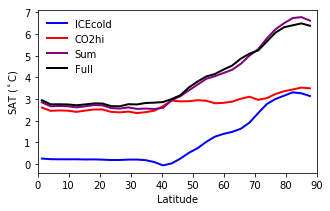

In [148]:
climodt = rlx_diffs(nctmpzmclimo)

fig,axs=plt.subplots(1,4,figsize=(10,4))
ax=axs[0]
ax.pcolor(climodt['ICEcold'].T,vmin=-10,vmax=10)
ax=axs[1]
ax.pcolor(climodt['CO2hi'].T,vmin=-10,vmax=10)

ax=axs[3]
ax.pcolor(climodt['Full'].T,vmin=-10,vmax=10)


printtofile=False
seadt = rlx_diffs(nctmpzmsea)

fig,axs = plt.subplots(2,1,figsize=(5,6))
ax=axs[0]
ax.plot(lat,seadt['ICEcold'],'b',linewidth=2)
ax.plot(lat,seadt['CO2hi'],'r',linewidth=2)
ax.plot(lat,seadt['ICEcold']+seadt['CO2hi'],'purple',linewidth=2)
#ax.plot(lat,seadt['ICEwarm'],'b--')
#ax.plot(lat,seadt['CO2lo'],'r--')
#ax.plot(lat,seadt['ICEwarm']+seadt['CO2lo'],'purple',linestyle='--')
ax.plot(lat,seadt['Full'],'k',linewidth=2)
ax.set_xlim((0,90))
ax.set_ylabel('SAT ($^\circ$C)')
ax.set_xlabel('Latitude')
ax.legend(('ICEcold','CO2hi','Sum','Full'),frameon=False,loc='best')
    
ax=axs[1]
ax.plot(lat,seadt['Full']-seadt['CO2hi'],'0.5',linewidth=2)
ax.plot(lat,seadt['ICEcold'],'b',linewidth=2)
#ax.set_ylim((0,3))
#ax.set_xlim((0,60))

ax.set_ylabel('SAT ($^\circ$C)')
ax.set_xlabel('Latitude')
ax.legend(('Expected ice contribution (Full-CO2hi)','ICEcold'),frameon=False,loc='best')
if printtofile:
    fig.savefig('SATzonalmean_cold_icecontrib_'+sea+'.pdf',bbox_inches='tight')

print seadt['ICEcold']

printtofile=True

fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(lat,seadt['ICEcold'],'b',linewidth=2)
ax.plot(lat,seadt['CO2hi'],'r',linewidth=2)
ax.plot(lat,seadt['ICEcold']+seadt['CO2hi'],'purple',linewidth=2)
#ax.plot(lat,seadt['ICEwarm'],'b--')
#ax.plot(lat,seadt['CO2lo'],'r--')
#ax.plot(lat,seadt['ICEwarm']+seadt['CO2lo'],'purple',linestyle='--')
ax.plot(lat,seadt['Full'],'k',linewidth=2)
ax.set_xlim((0,90))
ax.set_ylabel('SAT ($^\circ$C)')
ax.set_xlabel('Latitude')
ax.legend(('ICEcold','CO2hi','Sum','Full'),frameon=False,loc='best')
    
if printtofile:
    fig.savefig('SATzonalmean_cold_'+sea+'.pdf',bbox_inches='tight')


In [51]:
nctmpzmdt['preipreiice'].shape

(199, 32)

### Check variability in Arctic of SAT, SLP, SIC, Z500 vs unconstrained controls:
moved to rlx_variability notebook


### Check Snow water Equiv (SWE) in spring: explain non-additivity?

In [52]:
# 'snw' is a CMOR'd variable (from Michael S) so load differently for now.

snwsea='MAM'
ExpTag = ['preipreiice','2xco2preiice',  'prei2xco2iceb', '2xco22xco2ice']


DataRoot = '/Users/kelly/DATA/DataDisk/'
years = {'preipreiice':'2922-3121', 'prei2xco2iceb':'3022-3221',
         '2xco22xco2ice':'2452-2651','2xco2preiice':'2552-2751'}

snw={}; snwseacyc={}
for cs in ExpTag:
    
    filename = DataRoot + cs+'/'+cs+'_snw_'+years[cs]+'_'+snwsea+'.nc'
    print filename
    snw[cs] = cnc.getNCvar(filename,'snw') # units kg/m2
    print cs + ' shape ' + str(snw[cs].shape)
    
    # seacycle
    filename = DataRoot + cs+'/'+cs+'_snw_'+years[cs]+'_seacycle.nc'
    print filename
    snwseacyc[cs] = cnc.getNCvar(filename,'snw') # units kg/m2
    print cs + ' shape ' + str(snwseacyc[cs].shape)

latli=cnc.getNCvar(filename,'lat')
lonli=cnc.getNCvar(filename,'lon')

def fix_pico_missingdata(dat,length=200,axis=0,sea=None):
    
    add=0
    
    # Need to fix the pico timeseries which is missing 10 years (3152-3161, 
    # or indices 130-139 in 200 year timeseries. and 229-238 in 301 year timeseries)
    if sea!= None and sea=='DJF': 
        add=1 # will actually have 11 missing DJF's b/c the season crosses a yr boundary
        
    if length==200:
        sl=slice(130,140+add)
    elif length==301:
        sl=slice(229,239+add)
        
    dat = np.insert(dat, sl, np.nan, axis=axis)
    return dat

# fix missing in prei2xco2iceb first
snw['prei2xco2iceb'] = fix_pico_missingdata(snw['prei2xco2iceb'],sea=snwsea)



/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_snw_2922-3121_MAM.nc
preipreiice shape (200, 64, 128)
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_snw_2922-3121_seacycle.nc
preipreiice shape (12, 64, 128)
/Users/kelly/DATA/DataDisk/2xco2preiice/2xco2preiice_snw_2552-2751_MAM.nc
2xco2preiice shape (200, 64, 128)
/Users/kelly/DATA/DataDisk/2xco2preiice/2xco2preiice_snw_2552-2751_seacycle.nc
2xco2preiice shape (12, 64, 128)
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_snw_3022-3221_MAM.nc
prei2xco2iceb shape (190, 64, 128)
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_snw_3022-3221_seacycle.nc
prei2xco2iceb shape (12, 64, 128)
/Users/kelly/DATA/DataDisk/2xco22xco2ice/2xco22xco2ice_snw_2452-2651_MAM.nc
2xco22xco2ice shape (200, 64, 128)
/Users/kelly/DATA/DataDisk/2xco22xco2ice/2xco22xco2ice_snw_2452-2651_seacycle.nc
2xco22xco2ice shape (12, 64, 128)


totalarea from earthrad= 5.10099699071e+14
total area from sum(grid cell areas)= 5.101e+14
diff= -44239062.4375
(64, 128)
(1048,)
0.101015
1.0
(12,)
[-10.92004013 -12.77349281 -15.52475643 -18.75930405 -21.14853096
 -10.20785236  -1.91710043  -1.59525514  -1.90569615  -4.54012775
  -7.77908182  -9.42647457]


/Users/kelly/pyscripts/classes/cccmautils.py:108: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if weights != None:
/Users/kelly/pyscripts/classes/cccmautils.py:64: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if weights != None:


----


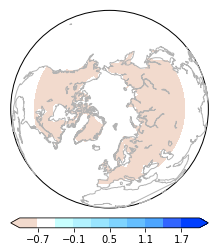

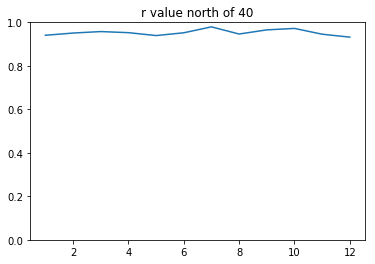

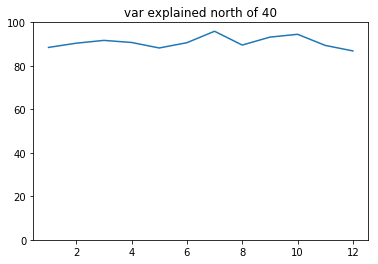

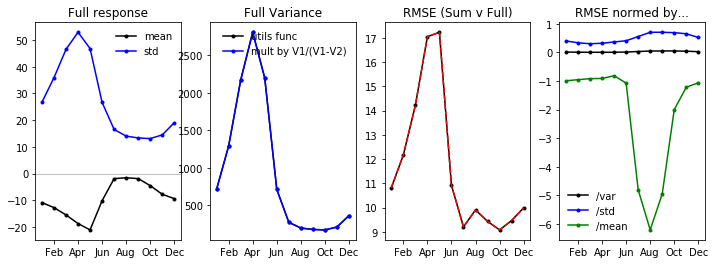

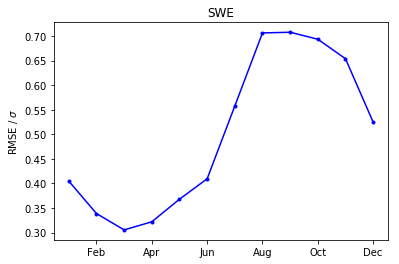

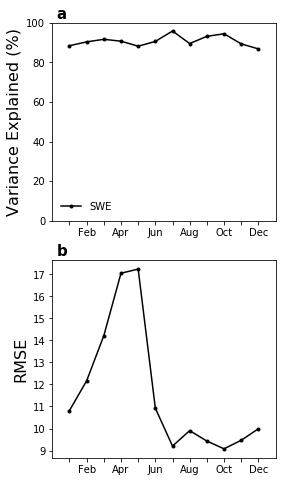

In [53]:
# compute pattern corrs for each month
cutl=reload(cutl)

def testrmse(act,pred,weights):
    
    se = (pred - act)**2 # squared error
    mse = ma.sum(se.flatten()*weights.flatten()) # mean squared error
    
    return ma.sqrt(mse) # root-mean squared error
    
def testvar(infld,weights):
    
    avg,wsum = ma.average(infld.flatten(),weights=weights.flatten(),returned=True)
    #print avg,wsum
    
    var = ma.sum(weights.flatten()* (infld.flatten()-avg)**2)
    multiplier = ma.sum(weights) / (ma.sum(weights) - ma.sum(weights**2))
    #print var, multiplier*var
    
    return var*multiplier

def teststd(infld,weights):
    
    return ma.sqrt(testvar(infld,weights))
    
    
# try higher lat than equator b/c SWE isn't important 
# in tropics (guessing on lat bound)
snwnorthof=40 

lmask = con.get_t63landmask()[:,:-1]
lmask[lmask!=-1]=np.nan
lmask[latli<=snwnorthof,:]=np.nan

lmaskm = ma.masked_invalid(lmask)

ret = cplt.kemmap(lmaskm,latli,lonli,ptype='nh',cmin=-1,cmax=2,cmap='blue2blue_bw10')


wgts = cutl.get_cellwgts(latli,lonli)
print wgts.shape
wgtssub = wgts[~lmaskm.mask]
print wgtssub.shape
print wgtssub.sum()

# now normalize so weights sum to 1
wgtssub = wgtssub / np.float(ma.sum(wgtssub))
print wgtssub.sum()


snwseacycdiffs = rlx_diffs(snwseacyc)
sumsnwseacyc = snwseacycdiffs['ICEcold']+snwseacycdiffs['CO2hi']


# Select only land grid cells for the pattern corr, in addition
#  to limited latitudes. 

rvals=np.zeros(12)
print rvals.shape
rmses = np.zeros(12); rmsesnorm=np.zeros(12); 
rmsesnorm2=np.zeros(12); rmsesnorm3=np.zeros(12)
snwvar=np.zeros(12); snwvar2=np.zeros(12);
snwstd=np.zeros(12); snwmean=np.zeros(12);
rmsescutl=np.zeros(12)

for moii in range(0,12):
    
    summo = sumsnwseacyc[moii,...]
    summo = ma.masked_where(lmaskm.mask,summo)
    
    fullmo = snwseacycdiffs['Full'][moii,...]
    fullmo = ma.masked_where(lmaskm.mask,fullmo)

    summo=summo[~lmaskm.mask]
    fullmo=fullmo[~lmaskm.mask]
    
    rvals[moii] = cutl.pattcorr(summo,fullmo,weights=wgtssub)
    snwvar[moii] = cutl.calc_areawgted_var(fullmo,weights=wgtssub)# just multiplies by weight
    snwvar2[moii] = testvar(fullmo,weights=wgtssub) # uses V1/(V1-V2) for unbiased estimate
    snwstd[moii] = teststd(fullmo,weights=wgtssub)
    snwmean[moii] = ma.average(fullmo,weights=wgtssub)
    
    rmses[moii] = testrmse(fullmo,summo,weights=wgtssub) 
    rmsescutl[moii] = cutl.calc_areawgted_rmse(fullmo,summo,weights=wgtssub)
    rmsesnorm[moii] = testrmse(fullmo,summo,weights=wgtssub) / snwvar[moii]
    rmsesnorm2[moii] = testrmse(fullmo,summo,weights=wgtssub) / snwstd[moii]
    rmsesnorm3[moii] = testrmse(fullmo,summo,weights=wgtssub) / snwmean[moii]
    
    #print rmses[moii],rmsesnorm[moii],rmsesnorm2[moii],rmsesnorm3[moii],snwvar,snwvar2
    
xx=np.arange(1,13)

#print rvals
plt.figure(); 
plt.plot(np.arange(1,13),rvals)
plt.ylim((0,1))
plt.title('r value north of ' + str(snwnorthof))

#print 100*rvals**2
plt.figure()
plt.plot(np.arange(1,13),100*rvals**2)
plt.ylim((0,100))
plt.title('var explained north of ' + str(snwnorthof))

print snwmean

fig,axs = plt.subplots(1,4,figsize=(12,4))
ax=axs[0]
ax.plot(xx,snwmean,'k',marker='.')
ax.plot(xx,snwstd,'b',marker='.')
ax.axhline(y=0,linewidth=0.5,color='0.5')
ax.set_title('Full response')
ax.legend(('mean','std'),frameon=False)
ax.set_xticks((2,4,6,8,10,12))
ax.set_xticklabels(('Feb','Apr','Jun','Aug','Oct','Dec'))
ax=axs[1]
ax.plot(xx,snwvar,'k',marker='.')
ax.plot(xx,snwvar2,'b',marker='.')
ax.set_title('Full Variance')
ax.legend(('utils func','mult by V1/(V1-V2)'),frameon=False)
ax.set_xticks((2,4,6,8,10,12))
ax.set_xticklabels(('Feb','Apr','Jun','Aug','Oct','Dec'))
ax=axs[2]
ax.plot(xx,rmses,'k',marker='.')
ax.plot(xx,rmsescutl,'r',linestyle='dashed')
ax.set_title('RMSE (Sum v Full)')
ax.set_xticks((2,4,6,8,10,12))
ax.set_xticklabels(('Feb','Apr','Jun','Aug','Oct','Dec'))
ax=axs[3]
ax.plot(xx,rmsesnorm,'k',marker='.')
ax.plot(xx,rmsesnorm2,'b',marker='.')
rmsesnorm3[snwmean>-1.2]=np.nan # mask small mean values
ax.plot(xx,rmsesnorm3,'g',marker='.')
ax.set_title('RMSE normed by...')
ax.legend(('/var','/std','/mean'),frameon=False)
ax.set_xticks((2,4,6,8,10,12))
ax.set_xticklabels(('Feb','Apr','Jun','Aug','Oct','Dec'))


fig,ax=plt.subplots(1,1)
ax.plot(xx,rmsesnorm2,'b',marker='.')
ax.set_xticks((2,4,6,8,10,12))
ax.set_xticklabels(('Feb','Apr','Jun','Aug','Oct','Dec'))
ax.set_ylabel('RMSE / $\sigma$')
ax.set_title('SWE')



printtofile=False
# BOTH VAR EXPLAINED AND RMSE
fig,axs = plt.subplots(2,1,figsize=(4,8))
lgstrs=()

ax=axs[0]
ax.plot(mos,100*rvals**2,color='k',marker='.',linewidth=1.5)
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
ax.set_ylim((0,100))
ax.set_ylabel('Variance Explained (%)',fontsize=fsz-2)
ax.annotate('a', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')
ax.legend(('SWE',),frameon=False,loc='best')

print '----'
ax=axs[1]
#ax.plot(mos,rmsesnorm2,color='k',marker='.',linewidth=1.5) # norm by sigma
ax.plot(mos,rmses,color='k',marker='.',linewidth=1.5)
#ax.plot(mos,rmses/snwstd.mean(),color='k',marker='.',linewidth=1.5) # norm by sigma mean
ax.set_xticks(mos)
ax.set_xticklabels(('','Feb','','Apr','','Jun','','Aug','','Oct','','Dec'))
ax.set_xlim((0,13))
#ax.set_ylim((0,1))
#ax.set_ylabel('RMSE / Variance', fontsize=fsz-2)
#ax.set_ylabel('RMSE / $\overline{\sigma}$', fontsize=fsz-2)
#ax.set_ylabel('RMSE / $\sigma$', fontsize=fsz-2)
ax.set_ylabel('RMSE', fontsize=fsz-2)
ax.annotate('b', xy=(0.02,1.02),xycoords='axes fraction',
            fontsize=fsz-3,fontweight='bold')

if printtofile:
    basename= 'snw_PattCorr_RMSE_nof'
    rmsesuff='nonorm'#'normsigmamean'#'nonorm' #'normsigma'
    fig.savefig(basename + str(snwnorthof) + '_monthly_' + rmsesuff+'.pdf',
                bbox_inches='tight')
    


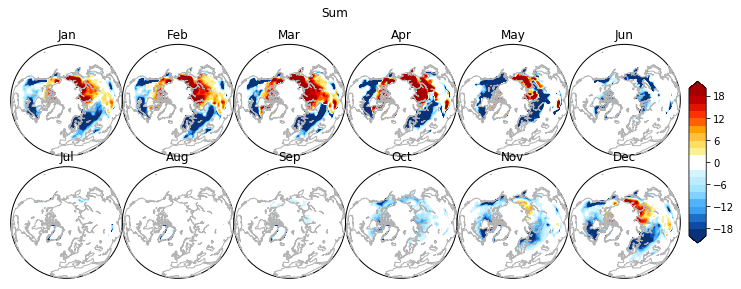

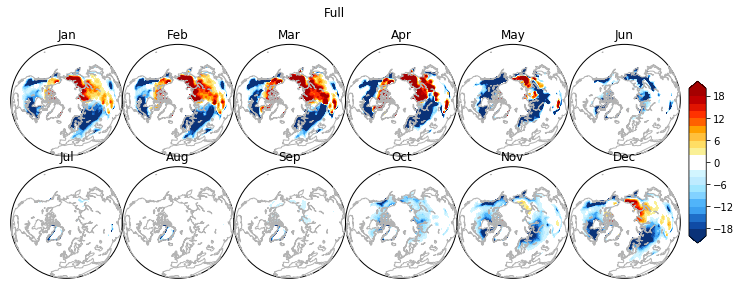

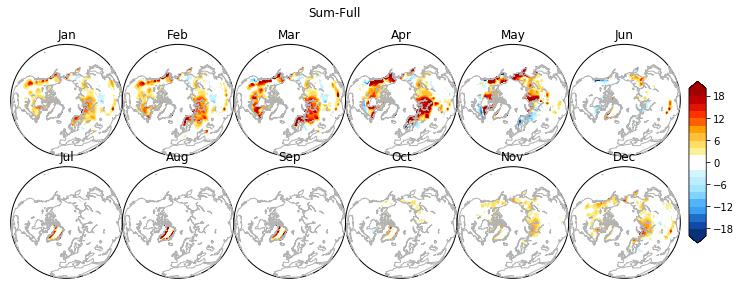

In [54]:

plt.figure()
ret = cplt.map_allmonths(sumsnwseacyc,latli,lonli,
                         ptype='nh',title='Sum',cmin=-20,cmax=20)
plt.figure()
ret = cplt.map_allmonths(snwseacycdiffs['Full'],latli,lonli,
                         ptype='nh',title='Full',cmin=-20,cmax=20)
plt.figure()
ret = cplt.map_allmonths(sumsnwseacyc-snwseacycdiffs['Full'],latli,lonli,
                         ptype='nh',title='Sum-Full',cmin=-20,cmax=20)


MAM


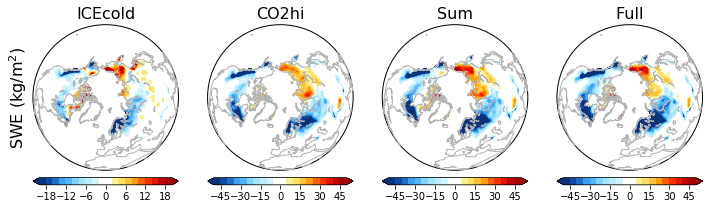

In [55]:
# compute diffs
print snwsea

snwdiffs = rlx_diffs(snw)

cmin=-50; cmax=50; 
cmap='blue2blue_w10'

pparams3={'cmin':cmin, 'cmax':cmax}

fig,axs=plt.subplots(1,4,figsize=(12,4))
ax=axs[0]
cplt.kemmap(np.nanmean(snwdiffs['ICEcold'],axis=0),latli,lonli,axis=ax,ptype='nh',cmin=-20,cmax=20)
ax.set_ylabel('SWE (kg/m$^2$)',fontsize=fsz-2)
ax.set_title('ICEcold',fontsize=fsz-2)
ax=axs[1]
cplt.kemmap(np.nanmean(snwdiffs['CO2hi'],axis=0),latli,lonli,axis=ax,ptype='nh',**pparams3)
ax.set_title('CO2hi',fontsize=fsz-2)
ax=axs[2]
cplt.kemmap(np.nanmean(snwdiffs['ICEcold'],axis=0)+np.nanmean(snwdiffs['CO2hi'],axis=0),
            latli,lonli,axis=ax,ptype='nh',**pparams3)
ax.set_title('Sum',fontsize=fsz-2)
ax=axs[3]
cplt.kemmap(np.nanmean(snwdiffs['Full'],axis=0),latli,lonli,axis=ax,ptype='nh',**pparams3)
ax.set_title('Full',fontsize=fsz-2)


## Vertical agreement plots

-2 2
-60 60


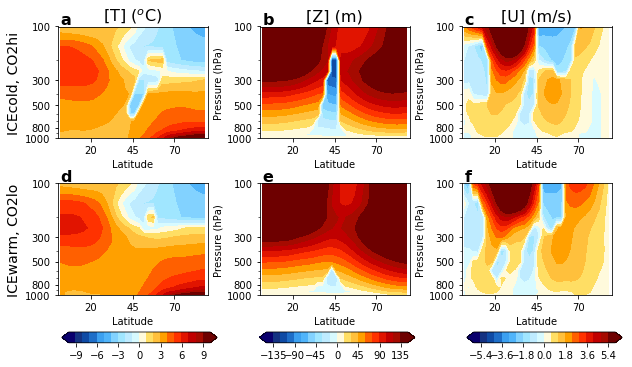

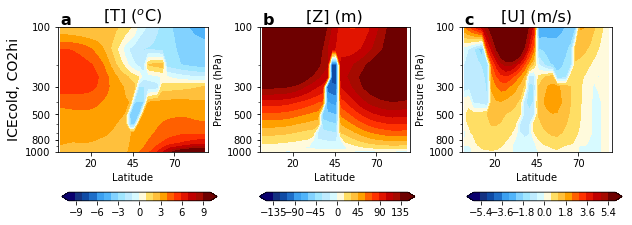

In [167]:
##### TESTING ###################################
#################################################

printtofile=False

magtype='abs'   #''  #'abs'
lin='one'
cmap='blue2red_20'
#pparamsT['suppcb']=True; pparamsT['suppttl']=True; pparamsT['cmin']=-10; pparamsT['cmax']=10;
#pparamsZ['suppcb']=True; pparamsZ['suppttl']=True; pparamsZ['cmin']=-150; pparamsZ['cmax']=150;
#pparamsU['suppcb']=True; pparamsU['suppttl']=True; pparamsU['cmin']=-3; pparamsU['cmax']=3;

print cmin, cmax
print cminz, cmaxz


pparamsT2 = {'cmin':-10, 'cmax':10, 'cmap':cmap,'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'suppttl':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,'fsz':fsz-1}

pparamsZ2 = {'cmin':-150, 'cmax':150, 'cmap':cmap,'cmin2':cmin2z,'cmax2':cmax2z,
            'cmind':cmindz,'cmaxd':cmaxdz,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'suppttl':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,'fsz':fsz-1}

pparamsU2 = {'cmin':cminw, 'cmax':cmaxw, 'cmap':cmap,'cmin2':cmin2w,'cmax2':cmax2w,
            'cmind':cmindw,'cmaxd':cmaxdw,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'suppttl':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,'fsz':fsz-1}


cbx1 = 0.115; cbx2=0.42; cbx3=0.74; #cbx4=0.77
cby = 0.01
cbw=0.24; cbh=0.03


fig,axs=plt.subplots(2,3,figsize=(9,5))

ph = plot_nc_agreement_map(nctZMdt,axs[0,0],lin=lin,magtype=magtype,plab='a',**pparamsT2)
axs[0,0].set_title('[T] ($^o$C)',fontsize=fsz-2)
axs[0,0].set_ylabel('ICEcold, CO2hi',fontsize=fsz-4)
ph = plot_nc_agreement_map(nczZMdt,axs[0,1],lin=lin,magtype=magtype,plab='b',**pparamsZ2)
axs[0,1].set_title('[Z] (m)',fontsize=fsz-2)
ph = plot_nc_agreement_map(ncuZMdt,axs[0,2],lin=lin,magtype=magtype,plab='c',**pparamsU2)
axs[0,2].set_title('[U] (m/s)',fontsize=fsz-2)

lin='two'
ph = plot_nc_agreement_map(nctZMdt,axs[1,0],lin=lin,magtype=magtype,plab='d',**pparamsT2)
#axs[0,0].set_title('SAT ($^o$C)',fontsize=fsz-2)
axs[1,0].set_ylabel('ICEwarm, CO2lo',fontsize=fsz-4)
cplt.add_colorbar(fig,ph,pos=[cbx1,cby,cbw,cbh],orientation='horizontal')

ph = plot_nc_agreement_map(nczZMdt,axs[1,1],lin=lin,magtype=magtype,plab='e',**pparamsZ2)
#axs[0,1].set_title('SLP (hPa)',fontsize=fsz-2)
cplt.add_colorbar(fig,ph,pos=[cbx2,cby,cbw,cbh],orientation='horizontal')

ph = plot_nc_agreement_map(ncuZMdt,axs[1,2],lin=lin,magtype=magtype,plab='f',**pparamsU2)
cplt.add_colorbar(fig,ph,pos=[cbx3,cby,cbw,cbh],orientation='horizontal')

fig.tight_layout(pad=2,w_pad=.2,h_pad=1)

if printtofile:
    fig.savefig('TZU_agreement_maps_' + sea + '_lin12' + magtype + '.pdf',
                bbox_inches='tight')

    
# JUST TOP ROW
cbh=0.04

lin='one'
fig,axs=plt.subplots(1,3,figsize=(9,3))

ph = plot_nc_agreement_map(nctZMdt,axs[0],lin=lin,magtype=magtype,plab='a',**pparamsT2)
axs[0].set_title('[T] ($^o$C)',fontsize=fsz-2)
axs[0].set_ylabel('ICEcold, CO2hi',fontsize=fsz-4)
cplt.add_colorbar(fig,ph,pos=[cbx1,cby,cbw,cbh],orientation='horizontal')
ph = plot_nc_agreement_map(nczZMdt,axs[1],lin=lin,magtype=magtype,plab='b',**pparamsZ2)
axs[1].set_title('[Z] (m)',fontsize=fsz-2)
cplt.add_colorbar(fig,ph,pos=[cbx2,cby,cbw,cbh],orientation='horizontal')
ph = plot_nc_agreement_map(ncuZMdt,axs[2],lin=lin,magtype=magtype,plab='c',**pparamsU2)
axs[2].set_title('[U] (m/s)',fontsize=fsz-2)
cplt.add_colorbar(fig,ph,pos=[cbx3,cby,cbw,cbh],orientation='horizontal')

fig.tight_layout(pad=2,w_pad=.2,h_pad=1)

if printtofile:
    fig.savefig('TZU_agreement_maps_' + sea + '_lin1' + magtype + '.pdf',
                bbox_inches='tight')


/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:638: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


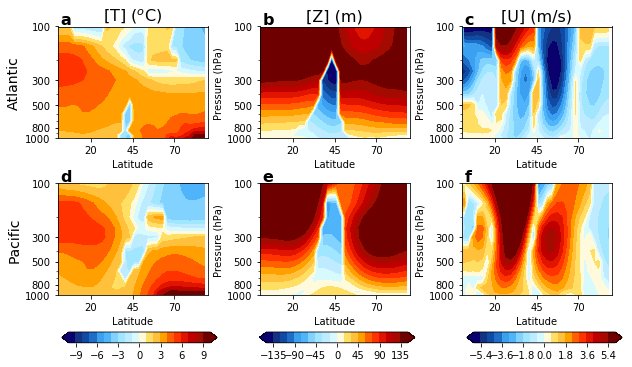

In [171]:
# Vertical agreement for Atlantic and Pacific sectors separately


printtofile=True

magtype='abs'   #''  #'abs'
lin='one'
cmap='blue2red_20'



pparamsT2 = {'cmin':-10, 'cmax':10, 'cmap':cmap,'cmin2':cmin2,'cmax2':cmax2,
            'cmind':cmind,'cmaxd':cmaxd,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'suppttl':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,'fsz':fsz-1,
            'latcoord':glat}

pparamsZ2 = {'cmin':-150, 'cmax':150, 'cmap':cmap,'cmin2':cmin2z,'cmax2':cmax2z,
            'cmind':cmindz,'cmaxd':cmaxdz,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'suppttl':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,'fsz':fsz-1,
            'latcoord':glat}

pparamsU2 = {'cmin':cminw, 'cmax':cmaxw, 'cmap':cmap,'cmin2':cmin2w,'cmax2':cmax2w,
            'cmind':cmindw,'cmaxd':cmaxdw,
            'suppcb':True,'vert':True,'levlim':levlim,
            'addsig':addsig,'suppttl':True,
            'sigtype':sigtype,'latlim':latlim,'vertptype':ptype,'fsz':fsz-1,
            'latcoord':glat}


cbx1 = 0.115; cbx2=0.42; cbx3=0.74; #cbx4=0.77
cby = 0.01
cbw=0.24; cbh=0.03


fig,axs=plt.subplots(2,3,figsize=(9,5))

ph = plot_nc_agreement_map(nctregZMdt['nthatlthnnh'],axs[0,0],lin=lin,magtype=magtype,plab='a',**pparamsT2)
axs[0,0].set_title('[T] ($^o$C)',fontsize=fsz-2)
axs[0,0].set_ylabel('Atlantic',fontsize=fsz-4)
ph = plot_nc_agreement_map(nczregZMdt['nthatlthnnh'],axs[0,1],lin=lin,magtype=magtype,plab='b',**pparamsZ2)
axs[0,1].set_title('[Z] (m)',fontsize=fsz-2)
ph = plot_nc_agreement_map(ncuregZMdt['nthatlthnnh'],axs[0,2],lin=lin,magtype=magtype,plab='c',**pparamsU2)
axs[0,2].set_title('[U] (m/s)',fontsize=fsz-2)

ph = plot_nc_agreement_map(nctregZMdt['nthpacnh'],axs[1,0],lin=lin,magtype=magtype,plab='d',**pparamsT2)
#axs[0,0].set_title('SAT ($^o$C)',fontsize=fsz-2)
axs[1,0].set_ylabel('Pacific',fontsize=fsz-4)
cplt.add_colorbar(fig,ph,pos=[cbx1,cby,cbw,cbh],orientation='horizontal')

ph = plot_nc_agreement_map(nczregZMdt['nthpacnh'],axs[1,1],lin=lin,magtype=magtype,plab='e',**pparamsZ2)
#axs[0,1].set_title('SLP (hPa)',fontsize=fsz-2)
cplt.add_colorbar(fig,ph,pos=[cbx2,cby,cbw,cbh],orientation='horizontal')

ph = plot_nc_agreement_map(ncuregZMdt['nthpacnh'],axs[1,2],lin=lin,magtype=magtype,plab='f',**pparamsU2)
cplt.add_colorbar(fig,ph,pos=[cbx3,cby,cbw,cbh],orientation='horizontal')

fig.tight_layout(pad=2,w_pad=.2,h_pad=1)

if printtofile:
    fig.savefig('TZU_agreement_maps_' + sea + '_lin1_AtlPac_' + magtype + '.pdf',
                bbox_inches='tight')


lin='two'
fig,axs=plt.subplots(2,3,figsize=(9,5))

ph = plot_nc_agreement_map(nctregZMdt['nthatlthnnh'],axs[0,0],lin=lin,magtype=magtype,plab='a',**pparamsT2)
axs[0,0].set_title('[T] ($^o$C)',fontsize=fsz-2)
axs[0,0].set_ylabel('Atlantic',fontsize=fsz-4)
ph = plot_nc_agreement_map(nczregZMdt['nthatlthnnh'],axs[0,1],lin=lin,magtype=magtype,plab='b',**pparamsZ2)
axs[0,1].set_title('[Z] (m)',fontsize=fsz-2)
ph = plot_nc_agreement_map(ncuregZMdt['nthatlthnnh'],axs[0,2],lin=lin,magtype=magtype,plab='c',**pparamsU2)
axs[0,2].set_title('[U] (m/s)',fontsize=fsz-2)

ph = plot_nc_agreement_map(nctregZMdt['nthpacnh'],axs[1,0],lin=lin,magtype=magtype,plab='d',**pparamsT2)
#axs[0,0].set_title('SAT ($^o$C)',fontsize=fsz-2)
axs[1,0].set_ylabel('Pacific',fontsize=fsz-4)
cplt.add_colorbar(fig,ph,pos=[cbx1,cby,cbw,cbh],orientation='horizontal')

ph = plot_nc_agreement_map(nczregZMdt['nthpacnh'],axs[1,1],lin=lin,magtype=magtype,plab='e',**pparamsZ2)
#axs[0,1].set_title('SLP (hPa)',fontsize=fsz-2)
cplt.add_colorbar(fig,ph,pos=[cbx2,cby,cbw,cbh],orientation='horizontal')

ph = plot_nc_agreement_map(ncuregZMdt['nthpacnh'],axs[1,2],lin=lin,magtype=magtype,plab='f',**pparamsU2)
cplt.add_colorbar(fig,ph,pos=[cbx3,cby,cbw,cbh],orientation='horizontal')

fig.tight_layout(pad=2,w_pad=.2,h_pad=1)

if printtofile:
    fig.savefig('TZU_agreement_maps_' + sea + '_lin2_AtlPac_' + magtype + '.pdf',
                bbox_inches='tight')

    
    

### graphical summary of PHT, possible last figure

In [ ]:
import energybalance_utils as ebu

lrlx = reload(lrlx)
ebu = reload(ebu)

sea='ANN'
local=True

fluxkeys = ('nettoa','netsfc')
timepers, timesels =lrlx.get_timeinfo(last=last) 
timepers['piControl'] = '2015-3010'
timepers['gregory_2xco2'] = '2451-2550'

# get global lat for PHT vars
glat,glon = lrlx.load_nclatlon('st',last='last100',
                               includeyr1=includeyr1,verb=True,
                              local=local)

matdir = '/HOME/rkm/pyscripts/pymatfiles/'
#npydir = '/HOME/rkm/pyscripts/pynpyfiles/'
npydir = '/Users/kelly/pyscripts/pynpyfiles/'
ttype='timeseries'


# First load the data from .mat files
allflux={}; allfluxtm={}
totpht={}; ocnpht={}; atmpht={}
#   adjust TOTAL PHT
totphtadjtm={}; totphtnhadjtm={}; totphtshadjtm={}; totphthemadjtm={}; tot60adjtm={}
#   adjust OCEAN PHT
ocnphtadjtm={}; ocnphtnhadjtm={}; ocnphtshadjtm={}; ocnphthemadjtm={}; ocn60adjtm={}


totphttm={}; ocnphttm={}; atmphttm={}
netimbal={}; nhnetimbal={}; shnetimbal={}; adjnetimbal={}
nhimbaltile={}; nhadjnetimbal={}; shimbaltile={}; shadjnetimbal={}
hemimbaltile={}; hemadjnetimbal={}
n60netimbal={}; s60netimbal={}; imbal60tile={}; adj60netimbal={}

netsfcimbal={}; nhnetsfcimbal={}; shnetsfcimbal={}; adjnetsfcimbal={}


gweights = np.cos(np.deg2rad(glat))

# For each simulation, load the npy file with nettoa, netsfc data
for casename in casenames+('piControl','gregory_2xco2'):
    timeper = timepers[casename]
    
    fluxdt={}; fluxtmdt={}
        
    for fkey in fluxkeys:
        matname = npydir + 'PHT/' + fkey + '_' + casename + '_' + \
               sea + '_' + ttype + timeper +'.npy'
        print 'load ' + matname
        #tmp = sio.loadmat(matname, squeeze_me=True)
        #print tmp
        print casename,fkey
        #tmp = sio.loadmat(matname, squeeze_me=True)[fkey]
        tmp = np.load(matname)
        print tmp.shape
        fluxdt[fkey] = tmp # keep time dim
        fluxtmdt[fkey]  = tmp.mean(axis=0) # time mean
            
            
        # If loading nettoa, test out some methods of adjusting for residual non-zero imbalance
        if fkey=='nettoa':
            print '@@@@ ' + str(fluxtmdt[fkey].shape)
            netimbal[casename] = np.average(fluxtmdt[fkey],weights=gweights)
            nhnetimbal[casename] = np.average(fluxtmdt[fkey][glat>0],weights=np.cos(np.deg2rad(glat[glat>0])))
            shnetimbal[casename] = np.average(fluxtmdt[fkey][glat<0],weights=np.cos(np.deg2rad(glat[glat<0])))
            
            adjnetimbal[casename] = np.average(fluxtmdt[fkey]-netimbal[casename],weights=np.cos(np.deg2rad(glat)))
            
            # adjust just the NH           
            ntmp = np.tile(nhnetimbal[casename],fluxtmdt[fkey].shape)
            ntmp[glat<0] = 0
            nhimbaltile[casename] = ntmp
            nhadjnetimbal[casename] = np.average(fluxtmdt[fkey]-nhimbaltile[casename],
                                                 weights=np.cos(np.deg2rad(glat)))
            
            # adjust just the SH           
            stmp = np.tile(shnetimbal[casename],fluxtmdt[fkey].shape)
            stmp[glat>0] = 0
            shimbaltile[casename] = stmp
            shadjnetimbal[casename] = np.average(fluxtmdt[fkey]-shimbaltile[casename],
                                                 weights=np.cos(np.deg2rad(glat)))
            
            # Hemisphere's adjusted separately
            htmp = np.tile(nhnetimbal[casename],fluxtmdt[fkey].shape) # start with NH imbalance everywhere
            htmp[glat<0] = stmp[glat<0] # fill in SH imbalance in SH only
            hemimbaltile[casename] = htmp
            hemadjnetimbal[casename] = np.average(fluxtmdt[fkey]-hemimbaltile[casename],
                                                  weights=np.cos(np.deg2rad(glat)))
            
            # North of 60 
            n60netimbal[casename] = np.average(fluxtmdt[fkey][glat>60],weights=np.cos(np.deg2rad(glat[glat>60])))
            s60netimbal[casename] = np.average(fluxtmdt[fkey][glat<=60],weights=np.cos(np.deg2rad(glat[glat<=60])))
            
            tmp60n = np.tile(n60netimbal[casename],fluxtmdt[fkey].shape) 
            tmp60 = np.tile(s60netimbal[casename],fluxtmdt[fkey].shape) # start with south of 60N imbal everywhere
            tmp60[glat>60] = tmp60n[glat>60] # add north of 60 avg in that region
            imbal60tile[casename] = tmp60
            adj60netimbal[casename] = np.average(fluxtmdt[fkey]-imbal60tile[casename],
                                                  weights=np.cos(np.deg2rad(glat)))

            
        elif fkey=='netsfc':
            
            netsfcimbal[casename] = np.average(fluxtmdt[fkey],weights=gweights)
            nhnetsfcimbal[casename] = np.average(fluxtmdt[fkey][glat>0],weights=np.cos(np.deg2rad(glat[glat>0])))
            shnetsfcimbal[casename] = np.average(fluxtmdt[fkey][glat<0],weights=np.cos(np.deg2rad(glat[glat<0])))
            
            if casename=='piControl' or casename=='gregory_2xco2':
                # need to multiply by -1
                fluxdt[fkey] = -1*tmp # keep time dim
                fluxtmdt[fkey]  = -1*tmp.mean(axis=0) # time mean
                netsfcimbal[casename] = -1*netsfcimbal[casename]
            
            adjnetsfcimbal[casename] = np.average(fluxtmdt[fkey]-netsfcimbal[casename],weights=np.cos(np.deg2rad(glat)))

        


    allflux[casename] = fluxdt
    allfluxtm[casename] = fluxtmdt

    totpht[casename],ocnpht[casename],atmpht[casename] =\
        ebu.calc_inferred_pht_components(fluxdt['nettoa'],fluxdt['netsfc'],glat)
    totphttm[casename],ocnphttm[casename],atmphttm[casename] =\
        ebu.calc_inferred_pht_components(fluxtmdt['nettoa'],fluxtmdt['netsfc'],glat)
        
    totphtadjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-netimbal[casename],glat)
    totphtnhadjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-nhimbaltile[casename],glat)
    totphtshadjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-shimbaltile[casename],glat)
    totphthemadjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-hemimbaltile[casename],glat)
    tot60adjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['nettoa']-imbal60tile[casename],glat)
    
    ocnphtadjtm[casename] = ebu.calc_inferred_pht(fluxtmdt['netsfc']-netsfcimbal[casename],glat)
    
    

In [ ]:
# Plot poleward heat transport
totdf = pd.DataFrame(totphttm,index=glat)
totdf.plot(title='PHT')

totadjdf = pd.DataFrame(totphtadjtm,index=glat)
totadjdf.plot(title='adjusted PHT')



# just the NH is adjusted
totnhadjdf = pd.DataFrame(totphtnhadjtm,index=glat)
totnhadjdf.plot(title='NH adjusted PHT')

# just the SH is adjusted
totshadjdf = pd.DataFrame(totphtshadjtm,index=glat)
totshadjdf.plot(title='SH adjusted PHT')

# both Hems separately adjusted
tothemadjdf = pd.DataFrame(totphthemadjtm,index=glat)
tothemadjdf.plot(title='Hem adjusted PHT')

# N and S of 60N separately adjusted
tot60adjdf = pd.DataFrame(tot60adjtm,index=glat)
tot60adjdf.plot(title='N and S of 60N adjusted PHT')



#print totdf['piControl'][totdf.index>=87.]
print '--non-zero at pole'
print totdf[totdf.index>=87.]
print '--adjusted: zero at pole'
print totadjdf[totadjdf.index>=87.]
print '--NH adjusted: zero at pole'
print totnhadjdf[totnhadjdf.index>=87.]
print '--SH adjusted: zero at pole'
print totshadjdf[totshadjdf.index>=87.]
print '--Hem adjusted: zero at pole'
print tothemadjdf[tothemadjdf.index>=87.]

print '-------------------------------'

ocndf = pd.DataFrame(ocnphttm,index=glat)
ocndf.plot(title='ocn PHT')
ocnadjdf = pd.DataFrame(ocnphtadjtm,index=glat)
ocnadjdf.plot(title='adjusted OCN PHT')

atmdf = pd.DataFrame(atmphttm,index=glat)
atmdf.plot(title='atm PHT')
atmadjdf = totadjdf - ocnadjdf
atmadjdf.plot(title='adjusted ATM PHT')

#print atmdf
# @@@  remove residual HT at pole? see how changes shape...

print pd.Series(netimbal)
print '--adjusted net imbal--'
print pd.Series(adjnetimbal)

print '--NH'
print pd.Series(nhnetimbal)
print '--NH adjusted net imbal--'
print pd.Series(nhadjnetimbal)

print '--SH'
print pd.Series(shnetimbal)
print '--SH adjusted net imbal--'
print pd.Series(shadjnetimbal)

print '----------------'
print '--Hem adjusted net imbal--'
print pd.Series(hemadjnetimbal)


In [ ]:

# Plot differences
phtdiff={}
phtdiff['ICEcold'] = totdf['prei2xco2iceb']-totdf['preipreiice']
phtdiff['ICEwarm'] = totdf['2xco22xco2ice']-totdf['2xco2preiice']
phtdiff['CO2hi'] = totdf['2xco2preiice']-totdf['preipreiice']
phtdiff['CO2lo'] = totdf['2xco22xco2ice']-totdf['prei2xco2iceb']
phtdiff['Full'] = totdf['2xco22xco2ice']-totdf['preipreiice']
phtdiff['FullCoupled'] = totdf['gregory_2xco2']-totdf['piControl']

phtdiffdf = pd.DataFrame(phtdiff)
phtdiffdf.plot(title='PHT diffs')

phtadjdiff={}
phtadjdiff['ICEcold'] = totadjdf['prei2xco2iceb']-totadjdf['preipreiice']
phtadjdiff['ICEwarm'] = totadjdf['2xco22xco2ice']-totadjdf['2xco2preiice']
phtadjdiff['CO2hi'] = totadjdf['2xco2preiice']-totadjdf['preipreiice']
phtadjdiff['CO2lo'] = totadjdf['2xco22xco2ice']-totadjdf['prei2xco2iceb']
phtadjdiff['Full'] = totadjdf['2xco22xco2ice']-totadjdf['preipreiice']
phtadjdiff['FullCoupled'] = totadjdf['gregory_2xco2']-totadjdf['piControl']

phtadjdiffdf = pd.DataFrame(phtadjdiff)
phtadjdiffdf.plot(title='adjusted PHT diffs')


phtnhadjdiff={}
phtnhadjdiff['ICEcold'] = totnhadjdf['prei2xco2iceb']-totnhadjdf['preipreiice']
phtnhadjdiff['ICEwarm'] = totnhadjdf['2xco22xco2ice']-totnhadjdf['2xco2preiice']
phtnhadjdiff['CO2hi'] = totnhadjdf['2xco2preiice']-totnhadjdf['preipreiice']
phtnhadjdiff['CO2lo'] = totnhadjdf['2xco22xco2ice']-totnhadjdf['prei2xco2iceb']
phtnhadjdiff['Full'] = totnhadjdf['2xco22xco2ice']-totnhadjdf['preipreiice']
phtnhadjdiff['FullCoupled'] = totnhadjdf['gregory_2xco2']-totnhadjdf['piControl']

pd.DataFrame(phtnhadjdiff).plot(title='NH adjusted PHT diffs')


phthemadjdiff={}
phthemadjdiff['ICEcold'] = tothemadjdf['prei2xco2iceb']-tothemadjdf['preipreiice']
phthemadjdiff['ICEwarm'] = tothemadjdf['2xco22xco2ice']-tothemadjdf['2xco2preiice']
phthemadjdiff['CO2hi'] = tothemadjdf['2xco2preiice']-tothemadjdf['preipreiice']
phthemadjdiff['CO2lo'] = tothemadjdf['2xco22xco2ice']-tothemadjdf['prei2xco2iceb']
phthemadjdiff['Full'] = tothemadjdf['2xco22xco2ice']-tothemadjdf['preipreiice']
phthemadjdiff['FullCoupled'] = tothemadjdf['gregory_2xco2']-tothemadjdf['piControl']

phthemadjdiffdf = pd.DataFrame(phthemadjdiff)
phthemadjdiffdf.plot(title='Hem adjusted PHT diffs')

# #### Now do ocn and atm
ocndiff={}
ocndiff['ICEcold'] = ocndf['prei2xco2iceb']-ocndf['preipreiice']
ocndiff['ICEwarm'] = ocndf['2xco22xco2ice']-ocndf['2xco2preiice']
ocndiff['CO2hi'] = ocndf['2xco2preiice']-ocndf['preipreiice']
ocndiff['CO2lo'] = ocndf['2xco22xco2ice']-ocndf['prei2xco2iceb']
ocndiff['Full'] = ocndf['2xco22xco2ice']-ocndf['preipreiice']
ocndiff['FullCoupled'] = ocndf['gregory_2xco2']-ocndf['piControl']

ocndiffdf = pd.DataFrame(ocndiff)
ocndiffdf.plot(title='Ocean PHT diffs')

atmdiffdf = phtdiffdf - ocndiffdf

atmhemadjdiffdf = phthemadjdiffdf - ocndiffdf
atmhemadjdiffdf.plot(title='ATM hem adjusted diffs')

totsumdf = atmhemadjdiffdf+ocndiffdf
totsumdf.plot(title='ATM+OCN')





In [ ]:
ocnadjdiff={}
ocnadjdiff['ICEcold'] = ocnadjdf['prei2xco2iceb']-ocnadjdf['preipreiice']
ocnadjdiff['ICEwarm'] = ocnadjdf['2xco22xco2ice']-ocnadjdf['2xco2preiice']
ocnadjdiff['CO2hi'] = ocnadjdf['2xco2preiice']-ocnadjdf['preipreiice']
ocnadjdiff['CO2lo'] = ocnadjdf['2xco22xco2ice']-ocnadjdf['prei2xco2iceb']
ocnadjdiff['Full'] = ocnadjdf['2xco22xco2ice']-ocnadjdf['preipreiice']
ocnadjdiff['FullCoupled'] = ocnadjdf['gregory_2xco2']-ocnadjdf['piControl']

ocnadjdiffdf = pd.DataFrame(ocnadjdiff)
ax = ocnadjdiffdf.plot(title='adjusted Ocean PHT diffs',legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='lower left')

atmadjdiffdf = phtadjdiffdf - ocnadjdiffdf
atmadjdiffdf.plot(title='adjusted Atmos PHT diffs')







# Compare to Tomas et al. 2016 Fig 3
ylims=(-.20,.20)

fig,axs = plt.subplots(1,2,figsize=(10,3))

ax=axs[0]
ax.plot(ocndiffdf['ICEcold']/1e15,color='orange',linestyle='dashed',linewidth=2)
ax.plot(atmdiffdf['ICEcold']/1e15,color='orange',linewidth=2)
ax.plot(phtdiffdf['ICEcold']/1e15,color='black',linewidth=1)
ax.set_xlim((-90,90))
ax.set_title('ICEcold PHT $\Delta$ (PW)')
ax.legend(('ocn','atm','tot'),loc='best',frameon=False)
ax.axhline(y=0,color='black',linewidth=.5)
ax.annotate('Cmp Tomas et al 2016 Fig 3',xy=(0.1,0.1),xycoords='axes fraction')

ax=axs[1]
ax.plot(ocndiffdf['ICEcold']/1e15,color='orange',linestyle='dashed',linewidth=2)
ax.plot((phtadjdiffdf['ICEcold']-ocndiffdf['ICEcold'])/1e15,color='orange',linewidth=2)
ax.plot(phtadjdiffdf['ICEcold']/1e15,color='black',linewidth=1)
ax.set_xlim((-90,90))
ax.set_title('tot & ocn Adjusted ICEcold PHT $\Delta$ (PW)')
ax.legend(('ocn','atm resid','adj tot'),loc='best',frameon=False)
ax.axhline(y=0,color='black',linewidth=.5)
#ax.annotate('Cmp Tomas et al 2016 Fig 3',xy=(0.1,0.1),xycoords='axes fraction')



fig,axs = plt.subplots(1,2,figsize=(10,3))
ax=axs[0]
ax.plot(ocndiffdf['ICEcold']/1e15,color='orange',linestyle='dashed',linewidth=2)
ax.plot(atmdiffdf['ICEcold']/1e15,color='orange',linewidth=2)
ax.plot(phtdiffdf['ICEcold']/1e15,color='black',linewidth=1)
#ax.plot(-1*ocnadjdiffdf['ICEcold'],color='red',linestyle='dashed',linewidth=2)
ax.set_xlim((-90,90))
ax.set_ylim(ylims)
ax.set_title('Raw ICEcold PHT $\Delta$ (PW)')
ax.legend(('ocn','atm','tot'),loc='best',frameon=False)
ax.axhline(y=0,color='black',linewidth=.5)
ax.annotate('Cmp Tomas et al 2016 Fig 3',xy=(0.1,0.1),xycoords='axes fraction')

ax=axs[1]
ax.plot(ocnadjdiffdf['ICEcold']/1e15,color='orange',linestyle='dashed',linewidth=2)
ax.plot(atmadjdiffdf['ICEcold']/1e15,color='orange',linewidth=2)
ax.plot(phtadjdiffdf['ICEcold']/1e15,color='black',linewidth=1)
#ax.plot(-1*ocnadjdiffdf['ICEcold'],color='red',linestyle='dashed',linewidth=2)
ax.set_xlim((-90,90))
ax.set_ylim(ylims)
ax.set_title('tot Adjusted ICEcold PHT $\Delta$ (PW)')
ax.legend(('adj ocn','atm resid','adj tot'),loc='best',frameon=False)
ax.axhline(y=0,color='black',linewidth=.5)
#ax.annotate('Cmp Tomas et al 2016 Fig 3',xy=(0.1,0.1),xycoords='axes fraction')

In [ ]:
addadj=True

fig,axs = plt.subplots(2,2,figsize=(10,5))
ax=axs[0,0]
ax.plot(totadjdf['piControl']/1e15,color='black',linewidth=2)
ax.plot(totadjdf['gregory_2xco2']/1e15,color='red',linewidth=2)
if addadj:
    ax.plot(totdf['piControl']/1e15,color='gray',linewidth=2)
    ax.plot(totdf['gregory_2xco2']/1e15,color='pink',linewidth=2)
    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Adjusted FullCoupled (2xCO2)')
ax.legend(('piControl','gregory_2xco2'),loc='best',frameon=False)

ax=axs[1,0]
ax.plot(totadjdf['piControl']/1e15,color='black',linewidth=2)
ax.plot(totadjdf['gregory_2xco2']/1e15,color='red',linewidth=2)
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((50,90))

ax=axs[0,1]
ax.plot(ocnadjdiffdf['FullCoupled']/1e15,color='orange',linestyle='dashed',linewidth=2)
ax.plot(atmadjdiffdf['FullCoupled']/1e15,color='orange',linewidth=2)
ax.plot(phtadjdiffdf['FullCoupled']/1e15,color='black',linewidth=1)
if addadj:
    ax.plot(ocndiffdf['FullCoupled']/1e15,color='yellow',linestyle='dashed',linewidth=2)
    ax.plot(atmdiffdf['FullCoupled']/1e15,color='yellow',linewidth=2)
    ax.plot(phtdiffdf['FullCoupled']/1e15,color='gray',linewidth=1)
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Adjusted FullCoupled (2xCO2) $\Delta$')
ax.legend(('ocn','atm, tot'),loc='best',frameon=False)

ax=axs[1,1]
ax.plot(ocnadjdiffdf['FullCoupled']/1e15,color='orange',linestyle='dashed',linewidth=2)
ax.plot(atmadjdiffdf['FullCoupled']/1e15,color='orange',linewidth=2)
ax.plot(phtadjdiffdf['FullCoupled']/1e15,color='black',linewidth=1)
#ax.plot(-1*ocnadjdiffdf['FullCoupled'],color='red',linestyle='dashed',linewidth=2)

ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((50,90))
ax.annotate('Cmp Hwang et al 2011 Fig1',xy=(0.1,0.1),xycoords='axes fraction')

In [ ]:
printtofile=False

# Summary figure to explain problem =============
# FullCoupled ===================================
fig,axs = plt.subplots(2,2,figsize=(10,6))
ax=axs[0,0]
ax.plot(totdf['piControl']/1e15,color='black',linewidth=3)
ax.plot(totdf['gregory_2xco2']/1e15,color='red',linewidth=3)
ax.plot(ocndf['piControl']/1e15,color='black',linewidth=1)
ax.plot(ocndf['gregory_2xco2']/1e15,color='red',linewidth=1)
ax.plot(atmdf['piControl']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmdf['gregory_2xco2']/1e15,color='red',linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Raw')
ax.set_ylabel('PHT (PW)')
ax.legend(('piControl','gregory_2xco2'),loc='best',frameon=False)

ax=axs[0,1]
ax.plot(totadjdf['piControl']/1e15,color='black',linewidth=3)
ax.plot(totadjdf['gregory_2xco2']/1e15,color='red',linewidth=3)
ax.plot(ocnadjdf['piControl']/1e15,color='black',linewidth=1)
ax.plot(ocnadjdf['gregory_2xco2']/1e15,color='red',linewidth=1)
ax.plot(atmadjdf['piControl']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmadjdf['gregory_2xco2']/1e15,color='red',linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Adjusted')

ax=axs[1,0]
ax.plot(phtdiffdf['FullCoupled']/1e15,color='red',linewidth=3)
ax.plot(ocndiffdf['FullCoupled']/1e15,color='red',linewidth=1)
ax.plot(atmdiffdf['FullCoupled']/1e15,color='red',linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.2,.3))
#ax.set_title('Raw FullCoupled (2xCO2) $\Delta$')
ax.legend(('Total','Ocean','Atmos'),loc='best',frameon=False)
ax.set_ylabel('2xCO2 $\Delta$ PHT (PW)')

ax=axs[1,1]
ax.plot(phtadjdiffdf['FullCoupled']/1e15,color='red',linewidth=3)
ax.plot(ocnadjdiffdf['FullCoupled']/1e15,color='red',linewidth=1)
ax.plot(atmadjdiffdf['FullCoupled']/1e15,color='red',linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.2,.3))
#ax.set_title('Adjusted FullCoupled (2xCO2) $\Delta$')
#ax.legend(('Total','Ocean','Atmos'),loc='best',frameon=False)
ax.annotate('FullCoupled',xy=(0.75,0.1),xycoords='axes fraction')

if printtofile:
    fig.savefig('FullCoupled_raw_adjusted_PHTcomponents_ANN.pdf')



# Full (Relaxed) ===================================
fig,axs = plt.subplots(2,2,figsize=(10,6))
ax=axs[0,0]
ax.plot(totdf['preipreiice']/1e15,color='black',linewidth=3)
ax.plot(totdf['2xco22xco2ice']/1e15,color='red',linewidth=3)
ax.plot(ocndf['preipreiice']/1e15,color='black',linewidth=1)
ax.plot(ocndf['2xco22xco2ice']/1e15,color='red',linewidth=1)
ax.plot(atmdf['preipreiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmdf['2xco22xco2ice']/1e15,color='red',linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Raw')
ax.set_ylabel('PHT (PW)')
ax.legend(('preipreiice','2xco22xco2ice'),loc='best',frameon=False)

ax=axs[0,1]
ax.plot(totadjdf['preipreiice']/1e15,color='black',linewidth=3)
ax.plot(totadjdf['2xco22xco2ice']/1e15,color='red',linewidth=3)
ax.plot(ocnadjdf['preipreiice']/1e15,color='black',linewidth=1)
ax.plot(ocnadjdf['2xco22xco2ice']/1e15,color='red',linewidth=1)
ax.plot(atmadjdf['preipreiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmadjdf['2xco22xco2ice']/1e15,color='red',linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Adjusted')

ax=axs[1,0]
ax.plot(phtdiffdf['Full']/1e15,color='red',linewidth=3)
ax.plot(ocndiffdf['Full']/1e15,color='red',linewidth=1)
ax.plot(atmdiffdf['Full']/1e15,color='red',linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.2,.3))
ax.legend(('Total','Ocean','Atmos'),loc='best',frameon=False)
ax.set_ylabel('Relaxed 2xCO2 $\Delta$ PHT (PW)')

ax=axs[1,1]
ax.plot(phtadjdiffdf['Full']/1e15,color='red',linewidth=3)
ax.plot(ocnadjdiffdf['Full']/1e15,color='red',linewidth=1)
ax.plot(atmadjdiffdf['Full']/1e15,color='red',linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.2,.3))
ax.annotate('Full (relaxed)',xy=(0.73,0.1),xycoords='axes fraction')
if printtofile:
    fig.savefig('FullRelaxed_raw_adjusted_PHTcomponents_ANN.pdf')


# CO2hi  ===================================
pertcol='red'

fig,axs = plt.subplots(2,2,figsize=(10,6))
ax=axs[0,0]
ax.plot(totdf['preipreiice']/1e15,color='black',linewidth=3)
ax.plot(totdf['2xco2preiice']/1e15,color=pertcol,linewidth=3)
ax.plot(ocndf['preipreiice']/1e15,color='black',linewidth=1)
ax.plot(ocndf['2xco2preiice']/1e15,color=pertcol,linewidth=1)
ax.plot(atmdf['preipreiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmdf['2xco2preiice']/1e15,color=pertcol,linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Raw')
ax.set_ylabel('PHT (PW)')
ax.legend(('preipreiice','2xco2preiice'),loc='best',frameon=False)

ax=axs[0,1]
ax.plot(totadjdf['preipreiice']/1e15,color='black',linewidth=3)
ax.plot(totadjdf['2xco2preiice']/1e15,color=pertcol,linewidth=3)
ax.plot(ocnadjdf['preipreiice']/1e15,color='black',linewidth=1)
ax.plot(ocnadjdf['2xco2preiice']/1e15,color=pertcol,linewidth=1)
ax.plot(atmadjdf['preipreiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmadjdf['2xco2preiice']/1e15,color=pertcol,linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Adjusted')

ax=axs[1,0]
ax.plot(phtdiffdf['CO2hi']/1e15,color=pertcol,linewidth=3)
ax.plot(ocndiffdf['CO2hi']/1e15,color=pertcol,linewidth=1)
ax.plot(atmdiffdf['CO2hi']/1e15,color=pertcol,linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.2,.4))
ax.legend(('Total','Ocean','Atmos'),loc='best',frameon=False)
ax.set_ylabel('CO2hi $\Delta$ PHT (PW)')

ax=axs[1,1]
ax.plot(phtadjdiffdf['CO2hi']/1e15,color=pertcol,linewidth=3)
ax.plot(ocnadjdiffdf['CO2hi']/1e15,color=pertcol,linewidth=1)
ax.plot(atmadjdiffdf['CO2hi']/1e15,color=pertcol,linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.2,.4))
ax.annotate('CO2hi',xy=(0.73,0.1),xycoords='axes fraction')
if printtofile:
    fig.savefig('CO2hi_raw_adjusted_PHTcomponents_ANN.pdf')


    
pertcol='blue'
    
# ICEcold  ===================================
fig,axs = plt.subplots(2,2,figsize=(10,6))
ax=axs[0,0]
ax.plot(totdf['preipreiice']/1e15,color='black',linewidth=3)
ax.plot(totdf['prei2xco2iceb']/1e15,color=pertcol,linewidth=3)
ax.plot(ocndf['preipreiice']/1e15,color='black',linewidth=1)
ax.plot(ocndf['prei2xco2iceb']/1e15,color=pertcol,linewidth=1)
ax.plot(atmdf['preipreiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmdf['prei2xco2iceb']/1e15,color=pertcol,linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Raw')
ax.set_ylabel('PHT (PW)')
ax.legend(('preipreiice','prei2xco2iceb'),loc='best',frameon=False)

ax=axs[0,1]
ax.plot(totadjdf['preipreiice']/1e15,color='black',linewidth=3)
ax.plot(totadjdf['prei2xco2iceb']/1e15,color=pertcol,linewidth=3)
ax.plot(ocnadjdf['preipreiice']/1e15,color='black',linewidth=1)
ax.plot(ocnadjdf['prei2xco2iceb']/1e15,color=pertcol,linewidth=1)
ax.plot(atmadjdf['preipreiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmadjdf['prei2xco2iceb']/1e15,color=pertcol,linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Adjusted')

ax=axs[1,0]
ax.plot(phtdiffdf['ICEcold']/1e15,color=pertcol,linewidth=3)
ax.plot(ocndiffdf['ICEcold']/1e15,color=pertcol,linewidth=1)
ax.plot(atmdiffdf['ICEcold']/1e15,color=pertcol,linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.25,.15))
ax.legend(('Total','Ocean','Atmos'),loc='best',frameon=False)
ax.set_ylabel('ICEcold $\Delta$ PHT (PW)')

ax=axs[1,1]
ax.plot(phtadjdiffdf['ICEcold']/1e15,color=pertcol,linewidth=3)
ax.plot(ocnadjdiffdf['ICEcold']/1e15,color=pertcol,linewidth=1)
ax.plot(atmadjdiffdf['ICEcold']/1e15,color=pertcol,linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.25,.15))
ax.annotate('ICEcold',xy=(0.73,0.1),xycoords='axes fraction')
if printtofile:
    fig.savefig('ICEcold_raw_adjusted_PHTcomponents_ANN.pdf')


    
# ICEwarm  ===================================
fig,axs = plt.subplots(2,2,figsize=(10,6))
ax=axs[0,0]
ax.plot(totdf['2xco2preiice']/1e15,color='black',linewidth=3)
ax.plot(totdf['2xco22xco2ice']/1e15,color=pertcol,linewidth=3)
ax.plot(ocndf['2xco2preiice']/1e15,color='black',linewidth=1)
ax.plot(ocndf['2xco22xco2ice']/1e15,color=pertcol,linewidth=1)
ax.plot(atmdf['2xco2preiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmdf['2xco22xco2ice']/1e15,color=pertcol,linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Raw')
ax.set_ylabel('PHT (PW)')
ax.legend(('preipreiice','prei2xco2iceb'),loc='best',frameon=False)

ax=axs[0,1]
ax.plot(totadjdf['2xco2preiice']/1e15,color='black',linewidth=3)
ax.plot(totadjdf['2xco22xco2ice']/1e15,color=pertcol,linewidth=3)
ax.plot(ocnadjdf['2xco2preiice']/1e15,color='black',linewidth=1)
ax.plot(ocnadjdf['2xco22xco2ice']/1e15,color=pertcol,linewidth=1)
ax.plot(atmadjdf['2xco2preiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmadjdf['2xco22xco2ice']/1e15,color=pertcol,linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Adjusted')

ax=axs[1,0]
ax.plot(phtdiffdf['ICEwarm']/1e15,color=pertcol,linewidth=3)
ax.plot(ocndiffdf['ICEwarm']/1e15,color=pertcol,linewidth=1)
ax.plot(atmdiffdf['ICEwarm']/1e15,color=pertcol,linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.25,.15))
ax.legend(('Total','Ocean','Atmos'),loc='best',frameon=False)
ax.set_ylabel('ICEcold $\Delta$ PHT (PW)')

ax=axs[1,1]
ax.plot(phtadjdiffdf['ICEwarm']/1e15,color=pertcol,linewidth=3)
ax.plot(ocnadjdiffdf['ICEwarm']/1e15,color=pertcol,linewidth=1)
ax.plot(atmadjdiffdf['ICEwarm']/1e15,color=pertcol,linewidth=2,linestyle='dashed')
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.25,.15))
ax.annotate('ICEwarm',xy=(0.73,0.1),xycoords='axes fraction')
if printtofile:
    fig.savefig('ICEwarm_raw_adjusted_PHTcomponents_ANN.pdf')



    

In [ ]:


# Plot the SUM vs FULL

pertcol='red'
pertcol2='blue'
pertcol3='purple'



# SUM  ===================================
fig,axs = plt.subplots(2,2,figsize=(10,6))
ax=axs[0,0]
ax.plot(totdf['preipreiice']/1e15,color='black',linewidth=3)
ax.plot(totdf['2xco2preiice']/1e15,color=pertcol,linewidth=3)
ax.plot(totdf['prei2xco2iceb']/1e15,color=pertcol2,linewidth=3)
ax.plot(ocndf['preipreiice']/1e15,color='black',linewidth=1)
ax.plot(ocndf['2xco2preiice']/1e15,color=pertcol,linewidth=1)
ax.plot(ocndf['prei2xco2iceb']/1e15,color=pertcol2,linewidth=1)
ax.plot(atmdf['preipreiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmdf['2xco2preiice']/1e15,color=pertcol,linewidth=2,linestyle='dashed')
ax.plot(atmdf['prei2xco2iceb']/1e15,color=pertcol2,linewidth=2,linestyle='dashed')    
ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Raw')
ax.set_ylabel('PHT (PW)')
ax.legend(('preipreiice','2xco2preiice','prei2xco2iceb'),loc='best',frameon=False)

ax=axs[0,1]
ax.plot(totadjdf['preipreiice']/1e15,color='black',linewidth=3)
ax.plot(totadjdf['2xco2preiice']/1e15,color=pertcol,linewidth=3)
ax.plot(totadjdf['prei2xco2iceb']/1e15,color=pertcol2,linewidth=3)
ax.plot(ocnadjdf['preipreiice']/1e15,color='black',linewidth=1)
ax.plot(ocnadjdf['2xco2preiice']/1e15,color=pertcol,linewidth=1)
ax.plot(ocnadjdf['prei2xco2iceb']/1e15,color=pertcol2,linewidth=1)
ax.plot(atmadjdf['preipreiice']/1e15,color='black',linewidth=2,linestyle='dashed')
ax.plot(atmadjdf['2xco2preiice']/1e15,color=pertcol,linewidth=2,linestyle='dashed')
ax.plot(atmadjdf['prei2xco2iceb']/1e15,color=pertcol2,linewidth=2,linestyle='dashed')    

ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_title('Adjusted')

ax=axs[1,0]
ax.plot((phtdiffdf['ICEcold']+phtdiffdf['CO2hi'])/1e15,color=pertcol3,linewidth=3)
ax.plot((ocndiffdf['ICEcold']+ocndiffdf['CO2hi'])/1e15,color=pertcol3,linewidth=1)
ax.plot((atmdiffdf['ICEcold']+atmdiffdf['CO2hi'])/1e15,color=pertcol3,linewidth=2,linestyle='dashed')

ax.plot(phtdiffdf['Full']/1e15,color='red',linewidth=3)
ax.plot(ocndiffdf['Full']/1e15,color='red',linewidth=1)
ax.plot(atmdiffdf['Full']/1e15,color='red',linewidth=2,linestyle='dashed')

ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.2,.3))
ax.legend(('Total','Ocean','Atmos'),loc='best',frameon=False)
ax.set_ylabel('ICEcold $\Delta$ PHT (PW)')

ax=axs[1,1]
ax.plot((phtadjdiffdf['ICEcold']+phtadjdiffdf['CO2hi'])/1e15,color=pertcol3,linewidth=3)
ax.plot((ocnadjdiffdf['ICEcold']+ocnadjdiffdf['CO2hi'])/1e15,color=pertcol3,linewidth=1)
ax.plot((atmadjdiffdf['ICEcold']+atmadjdiffdf['CO2hi'])/1e15,color=pertcol3,linewidth=2,linestyle='dashed')

ax.plot(phtadjdiffdf['Full']/1e15,color='red',linewidth=3)
ax.plot(ocnadjdiffdf['Full']/1e15,color='red',linewidth=1)
ax.plot(atmadjdiffdf['Full']/1e15,color='red',linewidth=2,linestyle='dashed')

ax.axhline(y=0,color='black',linewidth=.5)
ax.set_xlim((-90,90))
ax.set_ylim((-.2,.3))
ax.annotate('Sum (ICEcold+CO2hi)',xy=(0.5,0.03),xycoords='axes fraction')
if printtofile:
    fig.savefig('SUMICEcoldCO2hi_raw_adjusted_PHTcomponents_ANN.pdf')



In [ ]:
# Plot the raw net fluxes

#print allfluxtm


allfluxtmdf = pd.DataFrame(allfluxtm)
print allfluxtmdf.columns
print allfluxtmdf.index
allfluxtmdf.info()

multidx = [casenames*2, fluxkeys*5]
tuplesmult = list(zip(*multidx))
print tuplesmult

mindex = pd.MultiIndex.from_tuples(tuplesmult, names=['case', 'flux'])

In [ ]:
# this way is easier ("from_product")
multidx = [casenames, fluxkeys]
tuples = list(zip(*multidx))
mindex = pd.MultiIndex.from_product(tuples, names=['case', 'flux'])

print mindex

# @@@ Now, how to connect my actual data with the MultiIndex?
# http://pandas.pydata.org/pandas-docs/stable/advanced.html

allfluxtmdf2 = pd.DataFrame(allfluxtm,index=glat,columns=mindex)

allfluxtmdf2.info()

allfluxtmdf2.describe()

In [ ]:
import xarray as xr



#foo = xr.DataArray(data, coords=[glat], dims=['lat'])

In [ ]:
print allfluxtmdf.keys()
sfcdf = pd.DataFrame(allfluxtmdf.loc['netsfc'])
toadf = pd.DataFrame(allfluxtmdf.loc['nettoa'])

# np.array(np.squeeze(sfcdf.values).tolist()).T gives 64 x 5 matrix
sfcdata = np.array(np.squeeze(sfcdf.values).tolist()).T
sfcdf2 = pd.DataFrame(np.array(np.squeeze(sfcdf.values).tolist()).T,
                      columns=allfluxtmdf.keys(),index=glat)
toadata = np.array(np.squeeze(toadf.values).tolist()).T
toadf2 = pd.DataFrame(np.array(np.squeeze(toadf.values).tolist()).T,
                      columns=allfluxtmdf.keys(),index=glat)

print 'SFC'
print sfcdf2.info()
print 'TOA'
print toadf2.info()

sfcdf2.plot()
toadf2.plot()
#sfcdf2['2xco22xco2ice'].plot()

In [ ]:
sfcxr = xr.DataArray(sfcdf2, coords=[glat,sfcdf2.columns], dims=['lat','casename'])
toaxr = xr.DataArray(toadf2, coords=[glat,toadf2.columns], dims=['lat','casename'])

flxds = xr.Dataset({'netsfc':sfcxr, 'nettoa':toaxr})

In [ ]:
print flxds

#flxds.netsfc.isel(casename='preipreiice').plot()
print flxds.netsfc.loc['preipreiice']

In [ ]:
pd.pivot_table?